In [ ]:
import itertools

import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import seaborn as sns
import astropy.io.fits as pyfits
import re
import ctypes
import glob
import pandas as pd
import scipy.optimize as opt
import subprocess as sbp
import seaborn as sns
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy as sp
import scipy.ndimage



%matplotlib inline

In [4]:
def get_figsize(columnwidth, wf=0.5, hf=(5.**0.5-1.0)/2.0, ):
    """Parameters:
      - wf [float]:  width fraction in columnwidth units
      - hf [float]:  height fraction in columnwidth units.
                     Set by default to golden ratio.
      - columnwidth [float]: width of the column in latex. Get this from LaTeX 
                             using \showthe\columnwidth
    Returns:  [fig_width,fig_height]: that should be given to matplotlib
    """
    fig_width_pt = columnwidth*wf 
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*hf      # height in inches
    return [fig_width, fig_height]

def make_antiFerro(size):
    anti_ferro = np.zeros((size, size));

    for x in range(anti_ferro.shape[0]):
        for y in range(anti_ferro.shape[1]):
            anti_ferro[x][y] = (-1)**(x + y)

    return anti_ferro

In [3]:
hdulist.close(all)

NameError: name 'hdulist' is not defined

In [229]:
cd /Users/Sazbo/Desktop/V_shape_story/flat_DOS/

/Users/Sazbo/Desktop/V_shape_story/flat_DOS


In [5]:
index = 0;
direct = '.'
DOS_avg = np.zeros(5001);
#DOS_avg_2 = np.zeros(10001);
for files in glob.iglob(direct + '/*.fits'):
    hdulist = pyfits.open(files)
    #disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION']
    #repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U']
    DOS_avg += hdulist['DOS_0'].data['DOS'];
    #DOS_avg_2 += hdulist['DOS_2'].data['DOS'];
    omega = hdulist['DOS_0'].data['omega']
    index += 1;
    hdulist.close()
DOS_avg = DOS_avg / index;

/Users/Sazbo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


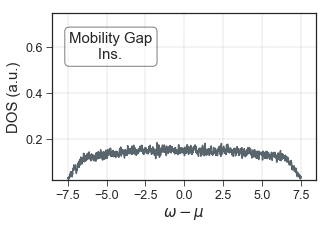

In [232]:
plt.rcParams.update({'font.size': 12})
sns.set_style('ticks')

SMALL_SIZE = 12.5
MEDIUM_SIZE = 12
BIGGER_SIZE = 12.5

title_font = {'fontname':'sans-serif', 'size':'12', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'sans-serif', 'size':'15'}
axis_font_y = {'fontname':'sans-serif', 'size':'15'}

plt.rcParams.update({'font.size': 15})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

columnwidth = 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.0, hf=0.65))

plt.plot(omega, DOS_avg, color = 'xkcd:slate grey');

plt.xlim(-8.5, 8.5)
plt.ylim(0.02, 0.75)
plt.xlabel(r"$\omega - \mu$", **axis_font_y)
plt.ylabel('DOS (a.u.)', **axis_font_y)
plt.grid(color='grey', linestyle='--', linewidth=0.25);
#plt.axvline(+0.3, color = 'red')
#plt.title('DOS w/ varying Disorder Fraction', **title_font)
#plt.text(-2, 0.9, 'U = 0t, V = 3.5t', **axis_font_y)
#plt.text(-5.5, 0.95, 'a)', **axis_font_x)
#ax1.set_facecolor("lightslategray")
#ax1.grid(True)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(-7.4, 0.55, 'Mobility Gap' + '\n       Ins.', bbox=props, **axis_font_y)
plt.savefig('/Users/Sazbo/Desktop/mm19/DOS_disorder.pdf', bbox_inches = "tight")

In [6]:
cd /Volumes/Balrog/40x/DisInt/

/Volumes/Balrog/40x/DisInt


In [7]:
VF_FRACTION = list([]);

direct = '.';

for files in glob.iglob(direct + '/*.fits'):
    
    hdulist = pyfits.open(files)
    disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION']
    
    VF_FRACTION.append(disorder_fraction);
    hdulist.close();
VF_FRACTION = list(set(VF_FRACTION));
print VF_FRACTION

[0.5, 0.25, 0.2, 0.4, 0.15, 0.3, 0.1, 0.45, 0.35]


In [8]:
direct = '.'

columns_name = ['OMEGA', 'DOS_0'];

full_dict = {};

for fraction in VF_FRACTION:
    index = 0;
    DOS_avg = np.zeros(5001);
    #DOS_avg_2 = np.zeros(10001);
    dF = pd.DataFrame(columns=columns_name)
    for files in glob.iglob(direct + '/*.fits'):
        hdulist = pyfits.open(files)
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION']
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U']
        if (disorder_fraction == fraction) & (repulsive == 4.0):
            DOS_avg += hdulist['DOS_0'].data['DOS'];
            #DOS_avg_2 += hdulist['DOS_2'].data['DOS'];
            omega = hdulist['DOS_0'].data['omega']
            index += 1;
        hdulist.close()
    if index == 0:
        print fraction;
    DOS_avg = DOS_avg / index;
    dF.loc[len(dF)] = [omega, DOS_avg];
    
    full_dict.update({fraction: dF})

In [9]:
data_Frame_DOS_uniform = pd.concat(full_dict);

In [10]:
data_Frame_DOS = pd.concat(full_dict);

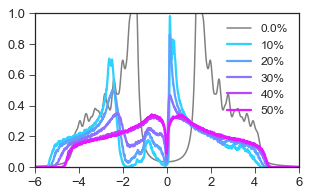

In [19]:
sns.set_style(style='ticks')
columns_name = ['OMEGA', 'DOS_0'];

#plt.rcParams.update({'font.size': 12})
#sns.set_style('ticks')

scale = 0.5

SMALL_SIZE = scale * 35
MEDIUM_SIZE = scale * 48
BIGGER_SIZE = scale * 50

title_font = {'fontname':'serif', 'size':scale * 34, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'serif', 'size': scale * 32}
axis_font_y = {'fontname':'serif', 'size': scale * 34}

plt.rcParams.update({'font.size': scale * 30})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=scale * 26)     # fontsize of the axes title
plt.rc('xtick', labelsize=scale * 26)    # fontsize of the tick labels
plt.rc('ytick', labelsize=scale * 26)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

columnwidth = 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.0, hf=0.6))

index = data_Frame_DOS.index.get_level_values(0);
index = index.tolist();
index = sorted(list(set(index)));

index = [0.10, 0.20, 0.30, 0.4, 0.5]

#index = [0.5]

cmap = plt.cm.cool 
cNorm  = colors.Normalize(0.0, 0.55)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(index)

plt.plot(omega, dos_smooth * 576 *2.0 / tot, label = '0.0%', color='grey', linewidth = 1.5);

for indice in index:
    
    colorVal = scalarMap.to_rgba(indice)
    
    omega = np.array(data_Frame_DOS.loc[indice]['OMEGA'])[0];
    #DOS_1 = np.array(data_Frame_DOS.loc[indice]['DOS_1'])[0];
    DOS_2 = np.array(data_Frame_DOS.loc[indice]['DOS_0'])[0];
    
    #ax1.plot(omega, DOS_1, label = indice);  
    plt.plot(omega, DOS_2, label = '%1.0d%%' %(indice*100), color=colorVal, linewidth = 2.25);
    #plt.plot(omega, DOS_2, color='k');
    
    #ax2.legend()
    #plt.ylim(-0.1, 4)

plt.legend(loc = 1, prop={'size': scale * 24})
plt.xlim(-6.0, 6.0)
plt.ylim(0.0, 1.0)
#plt.xlabel(r"$(\omega - \mu)/t$", **axis_font_x)
#plt.ylabel(r'$N(\omega)$', **axis_font_x)
#plt.title('DOS vs. Disorder % \n $U = 4.0t, V = 3.5t$', **axis_font_x)
#plt.grid(color='grey', linestyle='--', linewidth=0.25);
#plt.text(-5.8, 0.80, 'a)', **axis_font_x)
#plt.axvline(-0.35, linestyle='--', color = 'xkcd:red', linewidth = 3.0)
#plt.title('DOS w/ varying Disorder Fraction', **title_font)
#plt.text(-2, 0.9, 'U = 0t, V = 3.5t', **axis_font_y)
#plt.text(-5.6, 0.85, '(d)', **axis_font_x)
#ax1.set_facecolor("lightslategray")
#ax1.grid(True)

#props = dict(boxstyle='round', facecolor='white', alpha=0.5)
#plt.text(-5.3, 0.60, 'Pseudo Gap' + '\n       Metal', bbox=props, **axis_font_y)
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/DOS_results_full.pdf', bbox_inches = "tight")

In [8]:
cd /Volumes/Balrog/DOS_Vari/

/Volumes/Balrog/DOS_Vari


In [9]:
VF_ENERGY = list([]);

direct = '.';

for files in glob.iglob(direct + '/DisHB_*.fits'):
    
    hdulist = pyfits.open(files)
    disorder_energy = hdulist[0].header['HIERARCH HUBBARD MODEL V MAX']
    
    VF_ENERGY.append(disorder_energy);
    hdulist.close();
VF_ENERGY = list(set(VF_ENERGY));
print VF_ENERGY

[0.0, 1.777778, 6.222222, 2.666667, 0.8888889, 4.444444, 3.555556, 7.111111, 8.0, 5.333333]


0.0 5


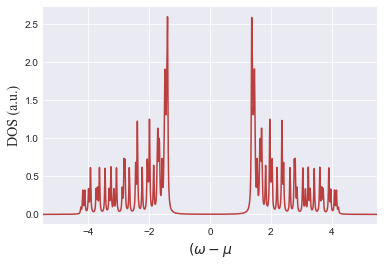

In [10]:
sns.set_style(style='darkgrid')
columns_name = ['OMEGA', 'DOS_0'];
SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

title_font = {'fontname':'Times New Roman', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'Times New Roman', 'size':'18'}
axis_font_y = {'fontname':'Times New Roman', 'size':'14'}

#plt.rcParams.update({'font.size': 12})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

direct = '.'
index = 0;
VF_ENERGY = [0.0]
for energy in VF_ENERGY:
    DOS_avg = np.zeros(5001);
    index = 0;
    for files in glob.iglob(direct + '/DisHB_disint_phaseSpace_24_0_U=4.0_*.fits'):
        hdulist = pyfits.open(files)
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U'];
        #print repulsive
        disorder_energy = hdulist[0].header['HIERARCH HUBBARD MODEL V MAX']
        if (disorder_fraction == 0.50) & (np.abs(disorder_energy - energy) < 0.5) & (repulsive == 4.0):
            DOS_avg += hdulist['DOS_0'].data['DOS'];
        #DOS_avg_2 += hdulist['DOS_2'].data['DOS'];
            omega = hdulist['DOS_0'].data['omega']
            index += 1;
        hdulist.close(all)
        #if index == 0:
        #    break
    plt.plot(omega, DOS_avg / index, color='xkcd:dull red');
    print energy, index;
#if index == 0:
#    print fraction;
#DOS_avg = DOS_avg / index;

plt.xlim(-5.5, 5.5)
plt.xlabel(r"$(\omega - \mu})/t$", **axis_font_y)
plt.ylabel('DOS (a.u.)', **axis_font_y)
#plt.title('DOS w/ varying Disorder Fraction', **title_font)
#plt.text(-2, 0.9, 'U = 0t, V = 3.5t', **axis_font_y)
#plt.text(-5.5, 0.95, 'a)', **axis_font_x)

In [11]:
lorentzian_x = np.linspace(-7.5, 7.5, 5001);

def lorentz(x, eta):
    return 1 / (np.pi) * (0.5 * eta) / (x**2.0 + (0.5 * eta)**2.0);

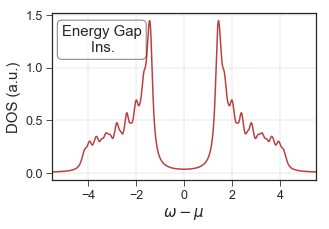

In [12]:
plt.rcParams.update({'font.size': 12})
sns.set_style('ticks')

SMALL_SIZE = 12.5
MEDIUM_SIZE = 12
BIGGER_SIZE = 12.5

title_font = {'fontname':'sans-serif', 'size':'12', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'sans-serif', 'size':'15'}
axis_font_y = {'fontname':'sans-serif', 'size':'15'}

plt.rcParams.update({'font.size': 15})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

columnwidth = 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.0, hf=0.65))

sns.set_style('ticks')
lorentzian_y = lorentz(lorentzian_x, 0.2);

dos_smooth = np.convolve(DOS_avg/index, lorentzian_y, 'same')

tot = np.sum(dos_smooth)

plt.plot(omega, dos_smooth * 576 *2.0 / tot, color='xkcd:dull red');

plt.grid(color='grey', linestyle='--', linewidth=0.25);
plt.xlim(-5.5, 5.5)
plt.xlabel(r"$\omega - \mu}$", **axis_font_y)
plt.ylabel('DOS (a.u.)', **axis_font_y)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(-5.1, 1.15, 'Energy Gap' + '\n       Ins.', bbox=props, **axis_font_y)
#plt.savefig('/Users/Sazbo/Desktop/mm19/DOS_mott.pdf', bbox_inches = "tight")

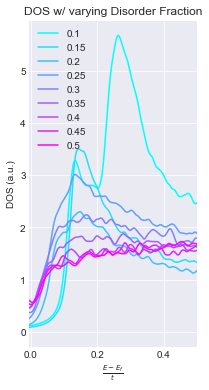

In [259]:
columns_name = ['OMEGA', 'DOS_1', 'DOS_2'];

index = data_Frame_DOS.index.get_level_values(0);
index = index.tolist();
index = sorted(list(set(index)));

index = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]

f, ax1 = plt.subplots(1, 1, figsize=(3,6))

cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=np.min(index), vmax=np.max(index))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(index)


for indice in index:
    
    colorVal = scalarMap.to_rgba(indice)
    
    omega = np.array(data_Frame_DOS.loc[indice]['OMEGA'])[0];
    #DOS_1 = np.array(data_Frame_DOS.loc[indice]['DOS_1'])[0];
    DOS_2 = np.array(data_Frame_DOS.loc[indice]['DOS_2'])[0];
    
    #ax1.plot(omega, DOS_1, label = indice);  
    ax1.plot(omega, DOS_2, label = indice, color=colorVal);
    ax1.legend()
    #ax2.legend()
    #plt.ylim(-0.1, 4)

plt.xlim(-0.005, 0.5)
plt.xlabel(r"$\frac{E - E_{f}}{t}$")
plt.ylabel('DOS (a.u.)')
plt.title('DOS w/ varying Disorder Fraction')
#ax1.set_facecolor("lightslategray")
#ax1.grid(True)

KeyError: 'DOS_2'

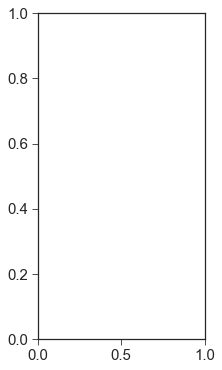

In [58]:
columns_name = ['OMEGA', 'DOS_0'];

index = data_Frame_DOS.index.get_level_values(0);
index = index.tolist();
index = sorted(list(set(index)));

#index = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]

f, ax1 = plt.subplots(1, 1, figsize=(3,6))

cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=np.min(index), vmax=np.max(index))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(index)


for indice in index:
    
    colorVal = scalarMap.to_rgba(indice)
    
    omega = np.array(data_Frame_DOS.loc[indice]['OMEGA'])[0];
    #DOS_1 = np.array(data_Frame_DOS.loc[indice]['DOS_1'])[0];
    DOS_2 = np.array(data_Frame_DOS.loc[indice]['DOS_2'])[0];
    
    #ax1.plot(omega, DOS_1, label = indice);  
    ax1.plot(omega, DOS_2, label = indice, color=colorVal);
    ax1.legend()
    #ax2.legend()
    #plt.ylim(-0.1, 4)

plt.xlim(-0.5, 0.005)
plt.ylim(-0.15, 3.0)
plt.xlabel(r"$\frac{E - E_{f}}{t}$")
plt.ylabel('DOS (a.u.)')
plt.title('DOS w/ varying Disorder Fraction')
#plt.grid(color='grey', linestyle='--', linewidth=0.25);
#ax1.set_facecolor("lightslategray")
#ax1.grid(True)

In [11]:
anti_ferro = np.zeros((28,28));

for x in range(anti_ferro.shape[0]):
    for y in range(anti_ferro.shape[1]):
        anti_ferro[x][y] = (-1)**(x + y)

[2471]
[2491]
[2496]
[2499]
[2500]


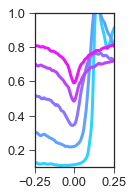

In [11]:
sns.set_style(style='ticks')
columns_name = ['OMEGA', 'DOS_0'];

plt.rcParams.update({'font.size': 12})
sns.set_style('ticks')

SMALL_SIZE = 13
MEDIUM_SIZE = 12
BIGGER_SIZE = 13

title_font = {'fontname':'sans-serif', 'size':'12', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'serif', 'size':'13'}
axis_font_y = {'fontname':'serif', 'size':'15'}

plt.rcParams.update({'font.size': 15})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

columnwidth = 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=0.3, hf=2.0))

index = data_Frame_DOS.index.get_level_values(0);
index = index.tolist();
index = sorted(list(set(index)));

index = [0.10, 0.20, 0.30, 0.4, 0.5]


cmap = plt.cm.cool 
cNorm  = colors.Normalize(0, 0.55)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(index)


for indice in index:
    
    colorVal = scalarMap.to_rgba(indice)
    
    omega = np.array(data_Frame_DOS.loc[indice]['OMEGA'])[0];
    #DOS_1 = np.array(data_Frame_DOS.loc[indice]['DOS_1'])[0];
    DOS_2 = np.array(data_Frame_DOS.loc[indice]['DOS_0'])[0];
    
    #ax1.plot(omega, DOS_1, label = indice);  
    plt.plot(omega, DOS_2 + indice * 1.0, label = '%1.0d%%' %(indice*100), color=colorVal, linewidth=3.0);
    #plt.legend()
    #ax2.legend()
    #plt.ylim(-0.1, 4)
    print np.where(DOS_2 == np.min(DOS_2[2000:3000]))[0]
plt.xlim(-0.25, 0.25)
plt.ylim(0.1, 1.00)
#plt.xlabel(r"$(\omega - \mu)/t$", **axis_font_y)
#plt.ylabel('DOS (a.u.)', **axis_font_y)
#plt.text(-0.22, 0.90, '(e)', **axis_font_y)
#plt.grid(color='grey', linestyle='--', linewidth=0.25);
#plt.title('DOS w/ varying Disorder Fraction', **title_font)
#plt.text(-2, 0.9, 'U = 4t, V = 3.5t', **axis_font_y)
#ax1.set_facecolor("lightslategray")
#ax1.grid(True)
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/DOS_results_mid.pdf', bbox_inches = "tight")

In [4]:
def line(x, m, b):
    return m*x + b;

(3.0980903284269825, 0.34927586423166473)
(2.7258603237608483, -0.37882550809653937)
(20.131835478049464, 0.77686919001987564)
(26.870125214921625, -3.2342369645314117)
(22.551761665624408, -3.9969720731415124)
(14.500845716803415, -8.173259799698581)
(12.826290303891557, -11.298736625374564)
(12.966147574443822, -8.4225633882518061)
(11.161423972873738, -8.8449313744960385)


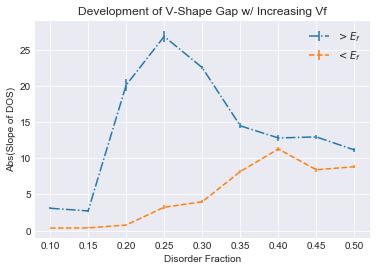

In [473]:
#####FIND SLOPE OF DOS ABOUT E_f propto |E-Ef|

columns_name = ['OMEGA', 'DOS_1', 'DOS_2'];
sns.set_style(style='darkgrid')
index = data_Frame_DOS.index.get_level_values(0);
index = index.tolist();
index = sorted(list(set(index)));

#index = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]

slopes = np.zeros([2, len(index)])
error = np.zeros([2, len(index)])

size = 10001;
mid = size/2
i = 0;
for indice in index:
    
    omega = np.array(data_Frame_DOS.loc[indice]['OMEGA'])[0];
    DOS_2 = np.array(data_Frame_DOS.loc[indice]['DOS_0'])[0];
    
    popt_r, pconv_r = opt.curve_fit(line, omega[5000:5050], DOS_2[5000:5050])
    perr_r = np.sqrt(np.diag(pconv_r))
    
    popt_l, pconv_l = opt.curve_fit(line, omega[4950:5000], DOS_2[4950:5000])
    perr_l = np.sqrt(np.diag(pconv_l))
    
    #plt.plot(omega[4900:5050], DOS_2[4900:5050])
    
    print(popt_r[0], popt_l[0])
    slopes[0][i] = np.abs(popt_r[0]);
    slopes[1][i] = np.abs(popt_l[0]);
    error[0][i] = np.abs(perr_r[0]);
    error[1][i] = np.abs(perr_l[0]);
    
    i += 1;
plt.close()    
plt.errorbar(index, slopes[0], yerr=error[0], linestyle='-.', mfc='red', label="$> E_f$")
plt.errorbar(index, slopes[1], yerr=error[1], linestyle='--', mfc='b', label="$< E_f$")
plt.xlabel('Disorder Fraction')
plt.ylabel('Abs(Slope of DOS)')
plt.legend()
plt.title('Development of V-Shape Gap w/ Increasing Vf')

In [68]:
cd /Volumes/Balrog/40x/DisInt/

/Volumes/Balrog/40x/DisInt


In [74]:
cd ~

/Users/Sazbo


32
46
50
50


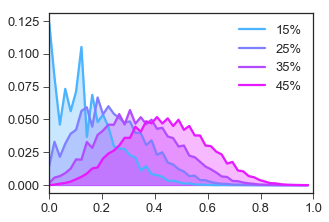

In [75]:
#cd /Volumes/Balrog/Run_39/

direct = '.';

sns.set_style('ticks')

VF_FRACTION = np.array([0.15, 0.25, 0.35, 0.45]);

bin_edges = np.linspace(start=0.0, stop=1.0, num = 50)
#bin_edges = np.linspace(start=0.251, stop=0.75, num = 45)
columns_name = ['OMEGA', 'DOS_0'];

plt.rcParams.update({'font.size': 12})
sns.set_style('ticks')

SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

title_font = {'fontname':'sans-serif', 'size':'12', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'serif', 'size':'20'}
axis_font_y = {'fontname':'sans-serif', 'size':'22'}

plt.rcParams.update({'font.size': 15})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

columnwidth = 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.0, hf=0.7))


cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=0.0, vmax=0.50)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(VF_FRACTION)

anti_ferro = make_antiFerro(40);

#sum_AFM = np.zeros(VF_FRACTION.size)

i = 0;
for fraction in VF_FRACTION:
    count = 0;
    colorVal = scalarMap.to_rgba(fraction)
    hist_full = np.zeros([49]);
    
    for files in glob.iglob(direct + '/*.fits'):
        hdulist = pyfits.open(files);
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U'];
        
        if disorder_fraction == fraction:
            
            count = count + 1;
            spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
            spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
            magn = spin_up_map - spin_dn_map;
            occupation = spin_up_map + spin_dn_map;
            
            magn_m = np.multiply(magn, anti_ferro);
            #print np.max(magn_m)
            
            sigma_y = 0.9;
            sigma_x = 0.9;
            sigma = [sigma_y, sigma_x]
            dm = np.array( hdulist["OnSiteImpurityPotential"].data )
            dm_smooth = sp.ndimage.filters.gaussian_filter(dm, sigma, mode='wrap') / 3.5;
            
            hist, bin_edges = np.histogram(dm_smooth, bins=bin_edges);
            #hist, bin_edges = np.histogram(occupation, bins=bin_edges);
            hist_full += hist;
            #sum_AFM[i] += np.sum(magn_m)

        hdulist.close()
    if count==0:
        count = 1;
    #sum_AFM[i] = sum_AFM[i] / count;
    #print sum_AFM[i], count
    #i += 1;
    print count
    plt.plot(bin_edges[:-1], hist_full / (count * 40.*40.), label = '%1.0d%%' %(fraction*100), color=colorVal, linewidth=2.25)
    plt.fill_between(bin_edges[:-1], hist_full / (count * 40.*40.), color=colorVal, alpha=0.3)
    #plt.figure(figsize=(6,6))
    #plt.imshow(magn_m, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], cmap='RdBu')
    #plt.title('Local Magnetization')
    #plt.colorbar()
    #plt.show()
    #plt.close()
    
plt.legend(loc=1)
#plt.xlabel(r"$\langle m_i^\dagger \rangle$", **axis_font_y)
#plt.ylabel('Probability', **axis_font_x)
#plt.title('Local AFM Order', **axis_font_x)
plt.xlim(0.0, 1.0)
#plt.grid(color='grey', linestyle='--', linewidth=0.25);


#props = dict(boxstyle='round', facecolor='white', alpha=0.5)
#plt.text(-5.3, 0.60, 'Pseudo Gap' + '\n       Metal', bbox=props, **axis_font_y)
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/dm_dist_2.pdf', bbox_inches = "tight")

#plt.plot(VF_FRACTION, sum_AFM)

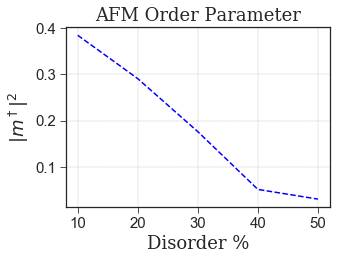

In [30]:
columnwidth = 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.0, hf=0.7))

plt.plot(VF_FRACTION * 100, (sum_AFM/1600)**2, 'b--')

plt.legend()
plt.xlabel("Disorder %", **axis_font_x)
plt.ylabel(r'$|m^\dagger|^2$', **axis_font_x)
plt.title('AFM Order Parameter', **axis_font_x)
plt.grid(color='grey', linestyle='--', linewidth=0.25);
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/global_mag_dist.pdf', bbox_inches = "tight")

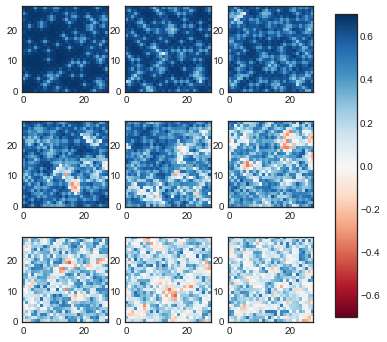

In [279]:
VF_FRACTION = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]

bin_edges = np.linspace(start=-0.3, stop=0.70, num = 20)

hist, bin_edges = np.histogram(magn_m, bins=bin_edges)
#print(hist)
#print(bin_edges)
#plt.plot(bin_edges[:-1], hist)


f, ax = plt.subplots(3, 3, figsize=(6,6))

i = 0;
for fraction in VF_FRACTION:
    count = 0;
    colorVal = scalarMap.to_rgba(fraction)
    
    for files in glob.iglob(direct + '/*.fits'):
        
        hdulist = pyfits.open(files);
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U'];
        
        if disorder_fraction == fraction:
            
            count = count + 1;
            spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
            spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
            magn = spin_up_map - spin_dn_map;
            
            magn_m = np.multiply(magn, anti_ferro);
            
            hist, bin_edges = np.histogram(magn_m, bins=bin_edges);
    
    #ax1.plot(bin_edges[:-1], hist / (count * 28.*28.), label=fraction, color=colorVal)
    
    im = ax[np.divide(i, 3)][np.mod(i, 3)].imshow(magn_m, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], 
               norm=colors.Normalize(vmin=-0.7, vmax=0.7), cmap='RdBu')
    i += 1;
    
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax)
plt.show()
    

    
#plt.legend()
#plt.xlabel('Local Magnetization')
#plt.ylabel('Probability')
#plt.title('Magnetization w/ increasing Disorder')

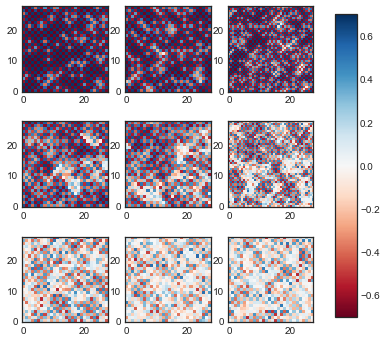

In [382]:
VF_FRACTION = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]

bin_edges = np.linspace(start=-0.3, stop=0.70, num = 20)

hist, bin_edges = np.histogram(magn_m, bins=bin_edges)
#print(hist)
#print(bin_edges)
#plt.plot(bin_edges[:-1], hist)


f, ax = plt.subplots(3, 3, figsize=(6,6))

i = 0;
for fraction in VF_FRACTION:
    count = 0;
    colorVal = scalarMap.to_rgba(fraction)
    
    for files in glob.iglob(direct + '/*.fits'):
        
        hdulist = pyfits.open(files);
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U'];
        
        if disorder_fraction == fraction:
            
            count = count + 1;
            spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
            spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
            magn = spin_up_map - spin_dn_map;
            
            #magn_m = np.multiply(magn, anti_ferro);
            
            #hist, bin_edges = np.histogram(magn_m, bins=bin_edges);
    
    #ax1.plot(bin_edges[:-1], hist / (count * 28.*28.), label=fraction, color=colorVal)
    
    im = ax[np.divide(i, 3)][np.mod(i, 3)].imshow(magn, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], 
               norm=colors.Normalize(vmin=-0.7, vmax=0.7), cmap='RdBu')
    i += 1;
    
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax)
plt.show()
    

    
#plt.legend()
#plt.xlabel('Local Magnetization')
#plt.ylabel('Probability')
#plt.title('Magnetization w/ increasing Disorder')

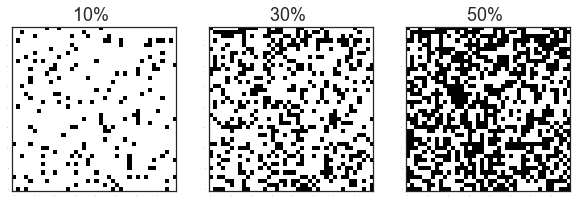

In [37]:
sns.set_style('white')
VF_FRACTION = [0.10, 0.30, 0.5]

bin_edges = np.linspace(start=-0.3, stop=0.70, num = 20)

#hist, bin_edges = np.histogram(magn_m, bins=bin_edges)
#print(hist)
#print(bin_edges)
#plt.plot(bin_edges[:-1], hist)



f, ax = plt.subplots(1, 3, figsize=(10,10))

i = 0;
for fraction in VF_FRACTION:
    count = 0;
    colorVal = scalarMap.to_rgba(fraction)
    
    for files in glob.iglob(direct + '/*.fits'):
        
        hdulist = pyfits.open(files);
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U'];
        
        if disorder_fraction == fraction:
            
            count = count + 1;
            spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
            spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
            magn = spin_up_map - spin_dn_map;
            
            #magn_m = np.multiply(magn, anti_ferro);
            
            #hist, bin_edges = np.histogram(magn_m, bins=bin_edges);
            disorder_map = np.array( hdulist["OnSiteImpurityPotential"].data )
            break
    #ax1.plot(bin_edges[:-1], hist / (count * 28.*28.), label=fraction, color=colorVal)
    
    im = ax[i].imshow(disorder_map, origin='lower', extent=[-0.5, 39.5, -0.5, 39.5], cmap='Greys')
    ax[i].set_title('%0.1d%% ' % (100.0  * disorder_fraction), size = 18)
    i += 1;
    
#f.subplots_adjust(right=0.8)
#cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
#f.colorbar(im, cax=cbar_ax)
plt.savefig('/Users/Sazbo/Desktop/mm19/disorder_3.pdf', bbox_inches = "tight")
plt.show()

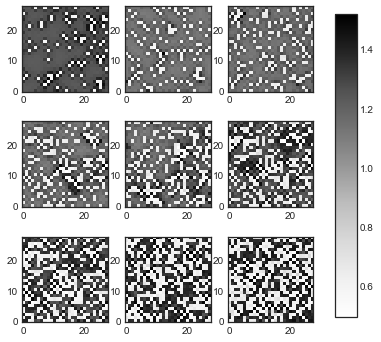

In [240]:
VF_FRACTION = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]

bin_edges = np.linspace(start=-0.3, stop=0.70, num = 20)

hist, bin_edges = np.histogram(magn_m, bins=bin_edges)
#print(hist)
#print(bin_edges)
#plt.plot(bin_edges[:-1], hist)


f, ax = plt.subplots(3, 3, figsize=(6,6))

i = 0;
for fraction in VF_FRACTION:
    count = 0;
    colorVal = scalarMap.to_rgba(fraction)
    
    for files in glob.iglob(direct + '/*.fits'):
        
        hdulist = pyfits.open(files);
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U'];
        
        if disorder_fraction == fraction:
            
            count = count + 1;
            spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
            spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
            occupation = spin_up_map + spin_dn_map;
            
            magn_m = np.multiply(magn, anti_ferro);
            
            hist, bin_edges = np.histogram(magn_m, bins=bin_edges);
            disorder_map = np.array( hdulist["OnSiteImpurityPotential"].data )
    
    #ax1.plot(bin_edges[:-1], hist / (count * 28.*28.), label=fraction, color=colorVal)
    
    im = ax[np.divide(i, 3)][np.mod(i, 3)].imshow(occupation, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], cmap='Greys')
    i += 1;
    
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax)
plt.show()

In [64]:
def classifyDOS(hdulist, bin_edges, anti_ferro):
    ### Returns energy eigenstates, average Density of States in each bin #######
    
    
    assert type(bin_edges) == np.ndarray;
    
    num_bins = bin_edges.size + 1;
    dos_size = hdulist['DOS_0'].data['DOS'].size;
    LDOS = hdulist['LDOS_0'].data
    LDOS_tran = LDOS.T
    
    spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
    spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
    magn = spin_up_map - spin_dn_map;
    
    #anti_ferro = make_antiFerro(magn);
    sigma_y2 = 0.5;
    sigma_x2 = 0.5;
    sigma2 = [sigma_y2, sigma_x2]
    
    magn_m = np.square(np.multiply(magn, anti_ferro));
    magn_m = sp.ndimage.filters.gaussian_filter(magn_m, sigma2, mode='wrap')
    nrows, ncols = magn_m.shape
    
    omega = np.array(hdulist['DOS_0'].data['omega']);
    
    bin_dos = np.zeros((num_bins, dos_size));
    bin_num = np.zeros((num_bins));
    
    magn_digitized = np.digitize(magn_m, bin_edges)
    
    for i in range(nrows):
        for j in range(ncols):
            bin_val = magn_digitized[i][j];
            bin_num[bin_val] += 1;
            bin_dos[bin_val] += LDOS_tran[j][i]
    
    #for x in range(num_bins):
    #    if bin_num[x] != 0:
    #        bin_dos[x] = bin_dos[x] / bin_num[x];
        
    return omega, bin_dos, bin_num;
    
    
def make_antiFerro(size):
    anti_ferro = np.zeros((size, size));

    for x in range(anti_ferro.shape[0]):
        for y in range(anti_ferro.shape[1]):
            anti_ferro[x][y] = (-1)**(x + y)

    return anti_ferro

In [22]:
bin_edges = np.array([0.3, 0.4, 0.5, 0.6])
hdulist = pyfits.open('VIDYA_FINAL_RUN39_0328_35VF_r.fits')

anti_ferro = make_antiFerro(40)

#omega, DOS_classes = classifyDOS(hdulist, bin_edges, anti_ferro)
#bin_edges.size

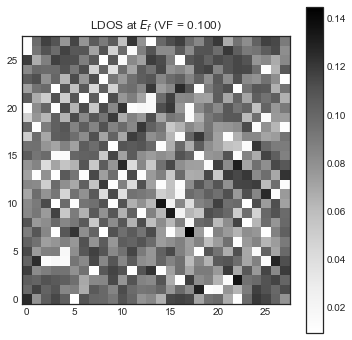

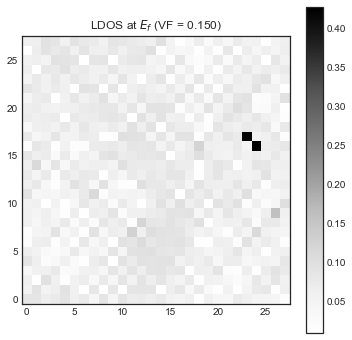

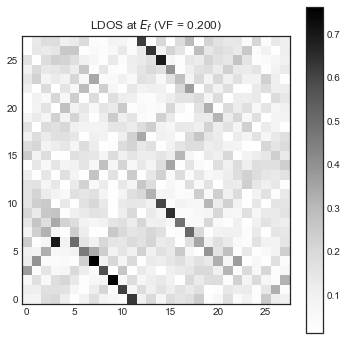

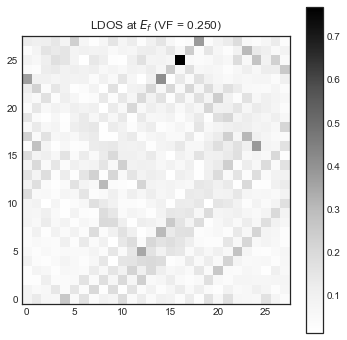

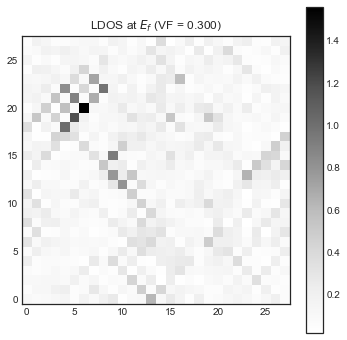

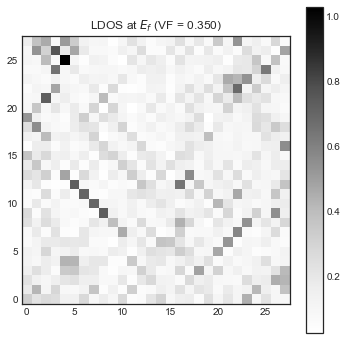

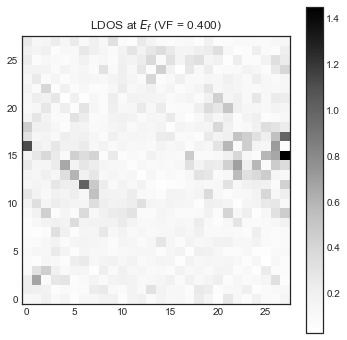

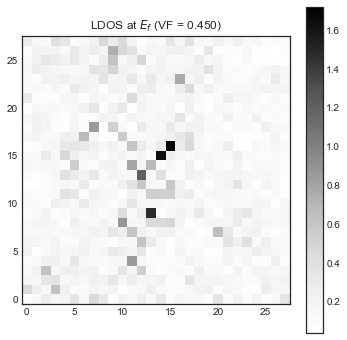

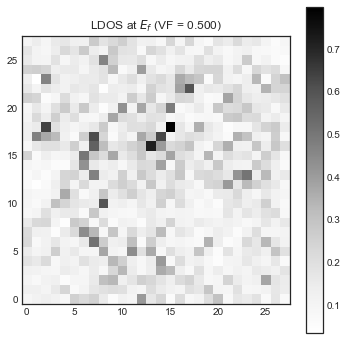

In [509]:
VF_FRACTION = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]

#f, ax1 = plt.subplots(1, 1, figsize=(6,6))

sns.set_style(style='white')

scalarMap.set_array(VF_FRACTION)

for fraction in VF_FRACTION:
    
    count = 0;
    colorVal = scalarMap.to_rgba(fraction)
    
    for files in glob.iglob(direct + '/DisHB_disint_*.fits'):
        
        hdulist = pyfits.open(files);
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U'];
        density_of_states = np.array(hdulist['DOS_1'].data)
        idx = np.argmin( np.abs( density_of_states['omega']) )
        
        if disorder_fraction == fraction:
            zg = hdulist['LDOS_1'].data[idx,:,::-1] + hdulist['LDOS_1'].data[idx + 1,:,::-1] + hdulist['LDOS_1'].data[idx - 1,:,::-1]
            break;
   
    plt.figure(figsize=(6,6))
    plt.imshow(zg, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], cmap='Greys')
    plt.title('LDOS at $E_f$ (VF = %1.3f)' %fraction)
    plt.colorbar()
    plt.show()
    plt.close()

0.032980618028
0.001712259569
0.00092512512445


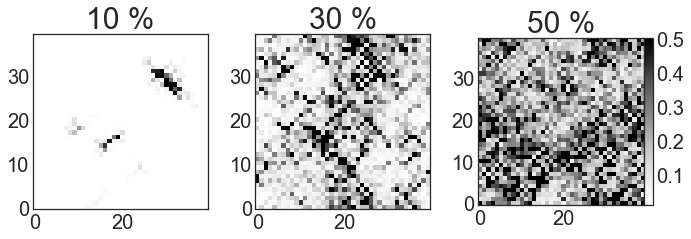

In [37]:
sns.set_style('white')
#direct = '/Users/Sazbo/Desktop/toAnalyze/';
#direct = '/Users/Sazbo/Desktop/toAnalyze/DisHB_toAnalyze/'
direct = '/Volumes/Balrog/40x/DisInt/'
VF_FRACTION = [0.10, 0.30, 0.5];

MEDIUM_SIZE = 20

plt.rcParams.update({'font.size': 20})
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

f, ax = plt.subplots(1, 3, figsize=(10,10))
count = 0;

for fraction in VF_FRACTION:
    for files in glob.iglob(direct + '/*.fits'):
        files = os.path.basename(files);
        DisHB_ulist = pyfits.open(direct + files);
        #DisHB_ulist.info()
        #susc = np.array( DisHB_ulist['DiamagneticSusceptibility'].data )
        #bonds = np.array( DisHB_ulist['HoppingBonds'].data )
        #sites = np.array( DisHB_ulist['LatticeSiteOrdering'].data )
        temperature = float(DisHB_ulist['PRIMARY'].header['HUBBARD MODEL K_BT'])
        disorder_fraction = float(DisHB_ulist['PRIMARY'].header['HIERARCH HUBBARD MODEL V FRACTION'])
        
        if disorder_fraction == fraction:
            density_of_states = np.array(DisHB_ulist['DOS_0'].data)
            idx = np.argmin( np.abs( density_of_states['omega'])) - 100
            zg = DisHB_ulist['LDOS_0'].data[idx,:,::-1];
            zg_norm = zg / np.sum(zg);
            zg2 = np.square(zg_norm);
            im = ax[count].imshow(zg, origin='lower', extent=[-0.5, 39.5, -0.5, 39.5], norm=colors.Normalize(vmin=0.01, vmax=0.5), cmap='Greys')
            ax[count].set_title(r'$\textcLDOS %1.d %%' %(disorder_fraction*100), size=30.0)
            print np.sum(zg2);
            
            if count == 2:
                divider = make_axes_locatable(ax[count])
                cax = divider.append_axes("right", size="5%")
            
                f.colorbar(im, cax=cax, orientation="vertical")
            count += 1;
            DisHB_ulist.close();
            break;
        DisHB_ulist.close();
f.tight_layout()
plt.savefig('/Users/Sazbo/Desktop/mm19/LDOS_minusBand.pdf', bbox_inches = "tight")

In [62]:
cd /Volumes/Balrog/40x/DisInt/

/Volumes/Balrog/40x/DisInt


0
5001
20
0.000817911543101


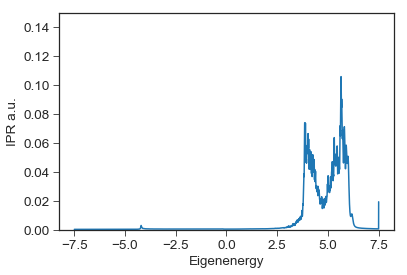

1
5001
20
0.00102873703814


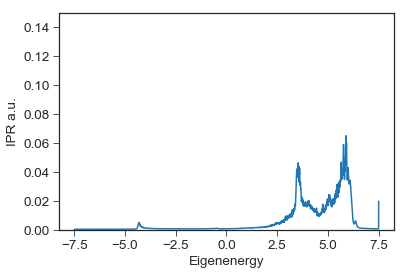

2
5001
20
0.00152839014371


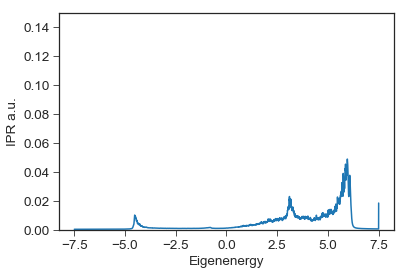

3
5001
20
0.00310444405782


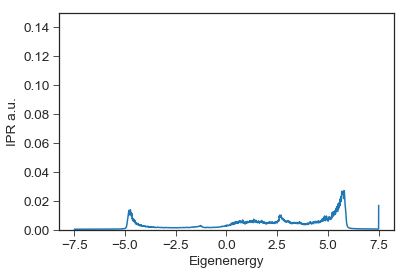

4
5001
20
0.00653798272346


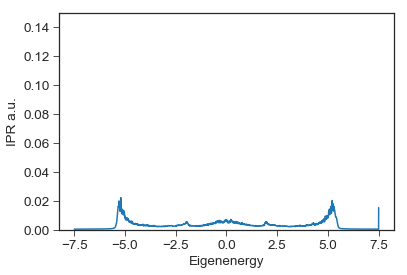

In [29]:
VF_FRACTION = [0.10, 0.20, 0.30, 0.40, 0.50]
direct = '.';
size = len(VF_FRACTION)
state = 0;
IPR = np.zeros([size, 5001]);
for fraction in VF_FRACTION:
    print state;
    count = 0;
    for files in glob.iglob(direct + '/*.fits'):
        norm = np.zeros([5001,]);
        files = os.path.basename(files);
        hdulist = pyfits.open(files);
    
        ldos = np.array(hdulist['LDOS_0'].data);
        omega = np.array(hdulist['DOS_0'].data['omega']);
        disorder_fraction = hdulist[0].header["HIERARCH HUBBARD MODEL V FRACTION"];
        
        if disorder_fraction == fraction:
            for x in range(ldos.shape[0]):
                #norm[x] = 1.0;
                norm[x] = np.sum(ldos[x]);
                IPR[state][x] += np.sum(np.square(ldos[x] / norm[x]));
            count += 1;
        hdulist.close();

    print IPR[1].size;
    print count;
    if count != 0:
        for x in range(IPR[state].size - 1):
            IPR[state][x] = IPR[state][x] / count;
    
    print IPR[state][2500];
    plt.plot(omega, IPR[state], label = '%0.2f' %fraction)
    plt.legend
    plt.xlabel('Eigenenergy')
    plt.ylabel('IPR a.u.')
    #plt.xlim(-0.2, 0.1)
    plt.ylim(-0.0, 0.15)
    plt.show()
    plt.close()
    state += 1;

29
9
4
1
0


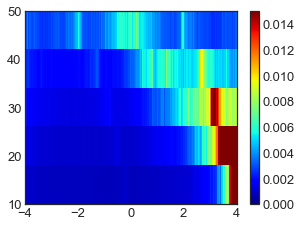

In [47]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['BitstreamVeraSans Roman']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

scale = 0.5;

sns.set_style('white')
frac = np.array([0.10, 0.20, 0.30, 0.35, 0.40, 0.45, 0.50])

IPR_shift = np.zeros([5, 5001]);

columns_name = ['OMEGA', 'DOS_0'];
SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

title_font = {'fontname':'serif', 'size':'20', 'color':'black', 'weight':'normal',
             'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'serif', 'size':'23'}
axis_font_y = {'fontname':'sans-serif', 'size':'14'}

plt.rcParams.update({'font.size': 18})
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


index = data_Frame_DOS.index.get_level_values(0);
index = index.tolist();
index = sorted(list(set(index)));

#print index

index = [0.10, 0.20, 0.30, 0.40, 0.5]

columnwidth = scale * 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=2.0, hf=0.75))


cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=np.min(index), vmax=np.max(index))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(index)

count = 0;
for indice in index:
    
    colorVal = scalarMap.to_rgba(indice)
    
    omega = np.array(data_Frame_DOS.loc[indice]['OMEGA'])[0];
    #DOS_1 = np.array(data_Frame_DOS.loc[indice]['DOS_1'])[0];
    DOS_2 = np.array(data_Frame_DOS.loc[indice]['DOS_0'])[0];
    
    #ax1.plot(omega, DOS_1, label = indice);  
    #ax1.plot(omega, DOS_2 + indice * 1.0, label = indice, color=colorVal);
    #ax1.legend()
    #ax2.legend()
    #plt.ylim(-0.1, 4)
    to_shift = 0;
    to_shift = 2500 - np.where(DOS_2 == np.min(DOS_2[2000:3000]))[0][0];
    print to_shift;
    IPR_shift[count] = np.roll(IPR[count], to_shift * 0)
    count +=1;
    
plt.imshow(IPR_shift[::-1], extent = [-7.5, 7.5, 10, 50],  aspect='auto', norm=colors.Normalize(vmin=0.00, vmax=0.015), cmap='jet')
plt.colorbar()
#plt.xlabel(r"$\omega - \mu$", **axis_font_x)
#plt.ylabel('Disorder %', **axis_font_x)
#plt.title(r'IPR ($U = 4.0t$)', **title_font)
plt.xlim(-4.0, 4.0);
#plt.tick_params(labelsize=18)
#plt.text(-6.8, 0.13, 'e)', color='white', **axis_font_x)
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/PR_40x40_nonint_lim.pdf', bbox_inches = "tight")
plt.show()

0
10001
5
0.00134815239324


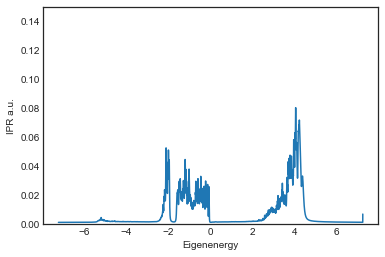

1
10001
3
0.00138001620996


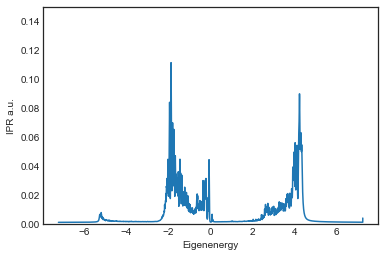

2
10001
3
0.00141126799412


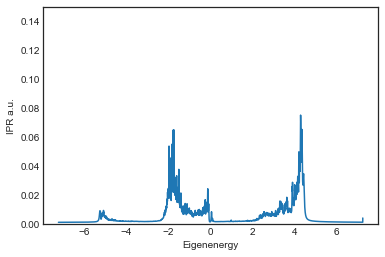

3
10001
5
0.00143135057143


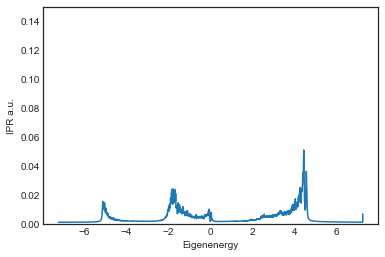

4
10001
5
0.00143881799574


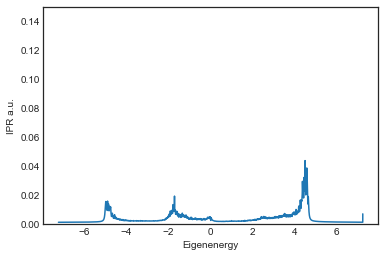

5
10001
5
0.00143436075743


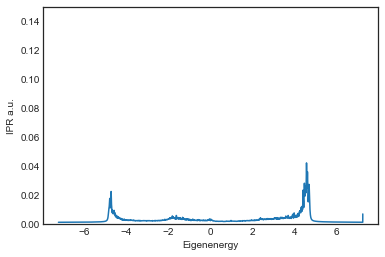

6
10001
5
0.00141930657657


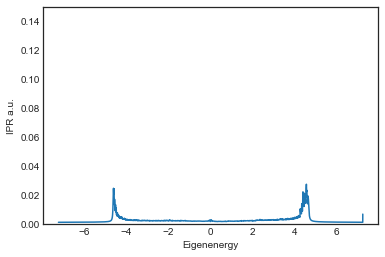

7
10001
5
0.00141930657657


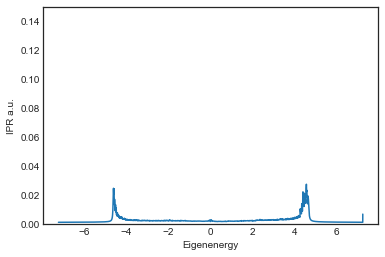

8
10001
5
0.00142123731645


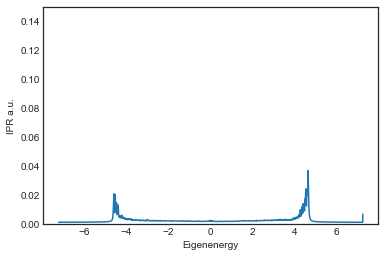

9
10001
5
0.00143117330046


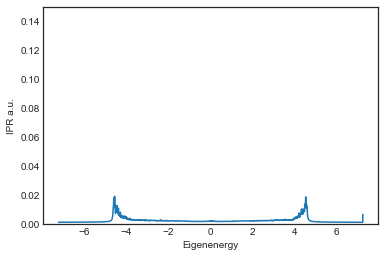

In [83]:
VF_FRACTION = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.40, 0.45, 0.5]
direct = '.';
size = len(VF_FRACTION)
state = 0;
IPR = np.zeros([size, 10001]);
for fraction in VF_FRACTION:
    print state;
    count = 0;
    for files in glob.iglob(direct + '/DisHB_disint_*.fits'):
        norm = np.zeros([10001,]);
        files = os.path.basename(files);
        hdulist = pyfits.open(files);
    
        ldos = np.array(hdulist['LDOS_1'].data);
        omega = np.array(hdulist['DOS_1'].data['omega']);
        disorder_fraction = hdulist[0].header["HIERARCH HUBBARD MODEL V FRACTION"];
        
        if disorder_fraction == fraction:
            for x in range(ldos.shape[0]):
                #norm[x] = 1.0;
                norm[x] = np.sum(ldos[x]);
                IPR[state][x] += np.sum(np.square(ldos[x] / norm[x]));
            count += 1;
        hdulist.close();

    print IPR[1].size;
    print count;
    if count != 0:
        for x in range(IPR[state].size - 1):
            IPR[state][x] = IPR[state][x] / count;
    
    print IPR[state][5000];
    plt.plot(omega, IPR[state], label = '%0.2f' %fraction)
    plt.legend
    plt.xlabel('Eigenenergy')
    plt.ylabel('IPR a.u.')
    #plt.xlim(-0.2, 0.1)
    plt.ylim(-0.0, 0.15)
    plt.show()
    plt.close()
    state += 1;

[ 0.00139434  0.00155919  0.00193059  0.00233197  0.00318144  0.00268877
  0.00221904  0.00221904  0.00234167  0.00199875]


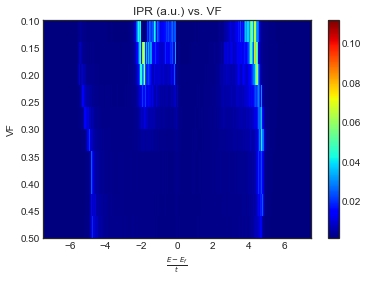

In [87]:
sns.set_style('white')
frac = np.array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.40, 0.45, 0.5])

print(IPR.T[5000][:])

plt.imshow(IPR, extent = [-7.5, 7.5, 0.5, 0.10], aspect='auto', cmap='jet')
plt.colorbar()
plt.xlabel(r"$\frac{E - E_{f}}{t}$")
plt.ylabel('VF')
plt.title('IPR (a.u.) vs. VF')
plt.show()
#plt.plot(omega, IPR[6])

1001
31
9519.35562249


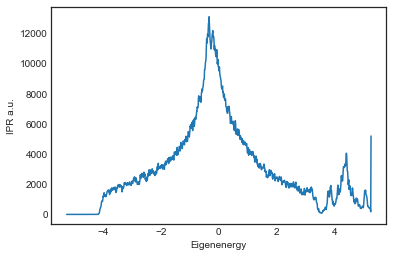

1001
31
7820.98014543


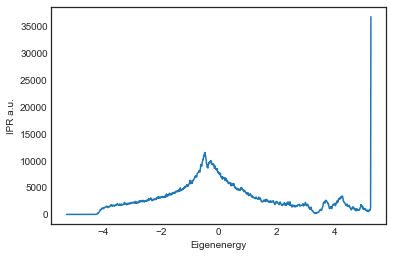

1001
31
6608.67306459


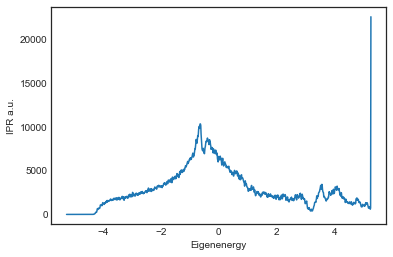

1001
31
5499.64542208


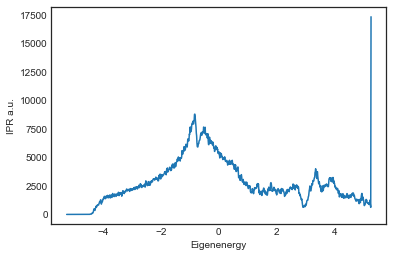

1001
31
4417.70966268


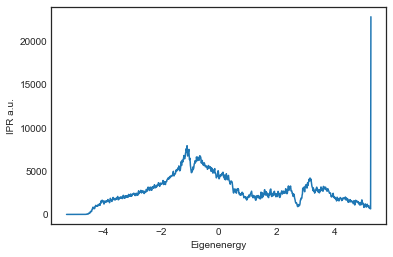

1001
31
4289.50152857


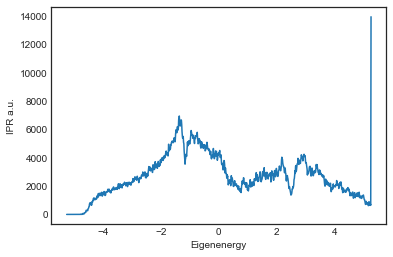

In [573]:
VF_FRACTION = [0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
direct = '.';
for fraction in VF_FRACTION:
    IPR = np.zeros([1001,]);
    count = 0;
    for files in glob.iglob(direct + '/DisHB_RUN1_*.fits'):
        norm = np.zeros([1001,]);
        files = os.path.basename(files);
        hdulist = pyfits.open(files);
    
        ldos = np.array(hdulist['LDOS_1'].data);
        omega = np.array(hdulist['DOS_1'].data['omega']);
        disorder_fraction = hdulist[0].header["HIERARCH HUBBARD MODEL V FRACTION"];
        
        if disorder_fraction == fraction:
            for x in range(ldos.shape[0]):
                norm[x] = 1.0;
                norm[x] = np.sum(ldos[x]);
                IPR[x] += np.sum(np.square(ldos[x] / norm[x]));
            count += 1;
        hdulist.close();

    print IPR.size;
    print count;
    if count != 0:
        for x in range(IPR.size - 1):
            IPR[x] = IPR[x] / count;
    
    print IPR[500];
    plt.plot(omega, IPR, label = '%0.2f' %fraction)
    plt.legend
    plt.xlabel('Eigenenergy')
    plt.ylabel('IPR a.u.')
    #plt.xlim(-0.2, 0.1)
    plt.ylim(-0.0, 0.15)
    plt.show()
    plt.close()

In [46]:
bin_edges = np.arange(0.05, 0.5, 0.05); #np.array([0.1, 0.2, 0.3, 0.4, 0.5])



ValueError: setting an array element with a sequence.

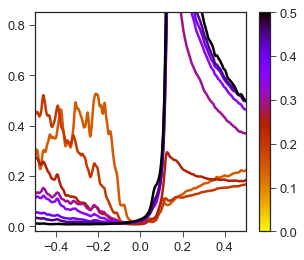

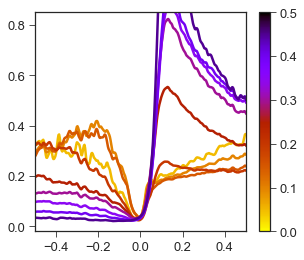

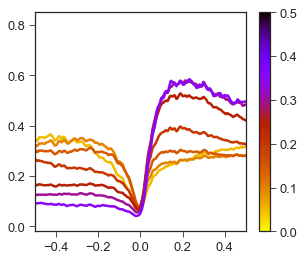

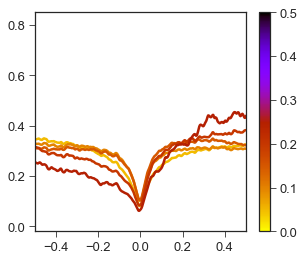

In [67]:
plt.rcParams.update({'font.size': 13})
sns.set_style('ticks')

scale = 0.5

SMALL_SIZE = scale * 26
MEDIUM_SIZE = scale * 26
BIGGER_SIZE = scale * 26

title_font = {'fontname':'serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'serif', 'size': scale * 26}
axis_font_y = {'fontname':'serif', 'size': scale * 26}

plt.rcParams.update({'font.size': scale * 26})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=scale * 26)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#sns.set_palette('colorblind', 8)

columnwidth = 342.2953 # value given by Latex



VF_FRACTION = [0.15, 0.25, 0.35, 0.45]
bin_edges = np.arange(0.05, 0.5, 0.05); #np.array([0.1, 0.2, 0.3, 0.4, 0.5])

bins = bin_edges

#bins = np.array([0, bin_edges, 0.55]);

anti_ferro = make_antiFerro(40)

cmap = plt.cm.gnuplot_r
cNorm  = colors.Normalize(0.0, 0.5)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(bins)

direct = '.';

for fraction in VF_FRACTION:
    fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.0, hf=0.85))
    count = 0;
    DOS = np.zeros((bin_edges.size+1,5001));
    num = np.zeros((bin_edges.size+1));
    for files in glob.iglob(direct + '/*.fits'):
        
        hdulist = pyfits.open(files);
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        
        if disorder_fraction == fraction:
            count += 1;
            omega, bin_DOS, bin_num = classifyDOS(hdulist, bin_edges, anti_ferro);
            DOS += bin_DOS;
            num += bin_num;
        
        hdulist.close();
    for i in range(bin_edges.size + 1):
        #print num[i];
        
        if i == 0:
            bin_left = "";
            bin_right = "%0.2f" % bin_edges[i];
        elif i == bin_edges.size:
            bin_left = "%0.2f" % bin_edges[i-1];
            bin_right = "";
        else:
            bin_left = "%0.2f" % bin_edges[i-1];
            bin_right = "%0.2f" % bin_edges[i];
        
        colorVal = scalarMap.to_rgba(bin_edges[i%bin_edges.size] + (i // bin_edges.size) * 0.5)
        
        if num[i] > 150:
            plt.plot(omega, DOS[i] / num[i], label = bin_left + " < " + bin_right, color=colorVal, linewidth=2.5)
            #plt.legend()
            plt.xlim(-0.5, 0.5)
            plt.ylim(-0.02, 0.85)
            #plt.title("%0.1d%% Disorder" % (fraction *100), **axis_font_x)
    
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylabel('DOS (a.u.)', **axis_font_x);
    #plt.xlabel(r'$\omega - \mu$', **axis_font_x);
    #plt.grid(color='grey', linestyle='--', linewidth=0.5);
    cb = plt.colorbar(scalarMap)
    #cb.set_label(label= r'$\langle m_i^\dagger \rangle ^2$', **axis_font_x)
    plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/ldos_%0.1d.pdf' % (fraction *100), bbox_inches = "tight")
    plt.show()
    plt.close();

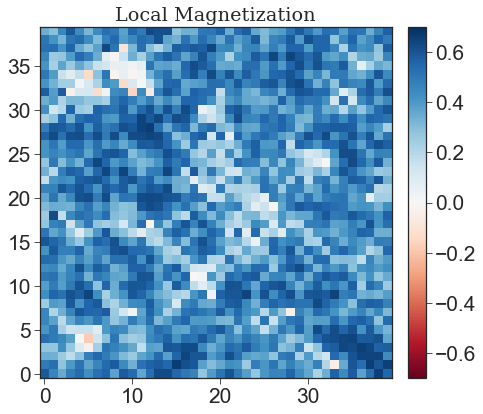

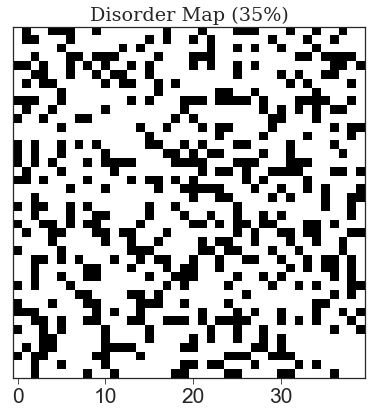

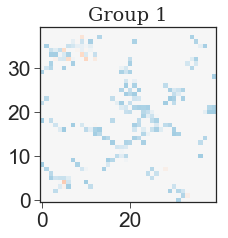

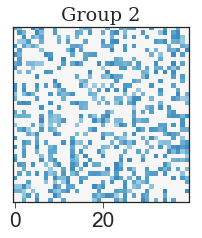

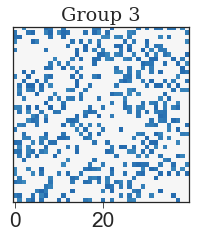

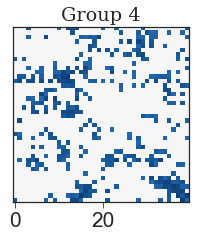

In [112]:
plt.rcParams.update({'font.size': 13})
sns.set_style('ticks')

scale = 0.6

SMALL_SIZE = scale * 35
MEDIUM_SIZE = scale * 48
BIGGER_SIZE = scale * 50

title_font = {'fontname':'serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'serif', 'size': scale * 32}
axis_font_y = {'fontname':'serif', 'size': scale * 40}

plt.rcParams.update({'font.size': scale * 30})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=scale * 30)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

cmap = plt.cm.cool
cNorm  = colors.Normalize(0, .50)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(index)

#sns.set_palette('colorblind', 8)

columnwidth = scale * 342.2953 # value given by Latex
#fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.2, hf=1.6))

VF_FRACTION = [0.30];
bin_edges = np.array([0.25, 0.45, 0.55]);
bins = np.array([0.1, 0.3, 0.7, 0.9]);
size = 40
anti_ferro = make_antiFerro(size);


#fig, ax = plt.subplots(1, 2, figsize=(12,12))
#fig2, ax2 = plt.subplots(1, 4, figsize=(12,12))
        
hdulist = pyfits.open('./DisHB_disint_40_V=3.5_U=4.0_0_0142.fits');
disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        
if disorder_fraction == fraction:
    spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
    spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
    magn = spin_up_map - spin_dn_map;
            
    magn_m = np.multiply(magn, anti_ferro);
            
    disorder_map = np.array( hdulist["OnSiteImpurityPotential"].data);
    
    fig = plt.figure(figsize=get_figsize(columnwidth, wf=3.5, hf=0.65))
    im = plt.imshow(magn_m, origin='lower', extent=[-0.5, 39.5, -0.5, 39.5], 
        norm=colors.Normalize(vmin=-0.7, vmax=0.7), cmap='RdBu');
    plt.title('Local Magnetization', **axis_font_x)
    fig.colorbar(im, orientation='vertical', pad=0.03)
    fig.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/mag_sample.pdf', bbox_inches = "tight")
    plt.show()

    fig2 = plt.figure(figsize=get_figsize(columnwidth, wf=3.5, hf=0.65)) 
    hi = plt.imshow(disorder_map, origin='lower', extent=[-0.5, 39.5, -0.5, 39.5], cmap='Greys');
    hi.axes.get_yaxis().set_visible(False)
    plt.title('Disorder Map (35%)', **axis_font_x)
    fig2.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/dis_sample.pdf', bbox_inches = "tight")
    plt.show()
            
    for i in range(bin_edges.size + 1):
        magn_spec = np.zeros_like(magn_m);
        
        if i == 0:
            bin_left = -1.0;
            bin_right = bin_edges[i];
        elif i == bin_edges.size:
            bin_left = bin_edges[i-1];
            bin_right = 1.0;
        else:
            bin_left = bin_edges[i-1];
            bin_right = bin_edges[i];
                    
        for m in range(size):
            for n in range(size):
                if (bin_left < magn_m[m][n]) & (magn_m[m][n] < bin_right):
                    magn_spec[m][n] = magn_m[m][n];
                else:
                    magn_spec[m][n] = 0;
        
        fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.75, hf=0.65))

        im = plt.imshow(magn_spec, origin='lower', extent=[-0.5, 39.5, -0.5, 39.5], 
                        norm=colors.Normalize(vmin=-0.7, vmax=0.7), cmap='RdBu');
        if i > 0:
            im.axes.get_yaxis().set_visible(False)
        plt.title("Group %1.0f" % (i+1), **axis_font_x)
        fig.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/mag_sample_%1.0f.pdf' % (i+1), bbox_inches = "tight")
        plt.show()

#fig.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/dis_sample', bbox_inches = "tight")

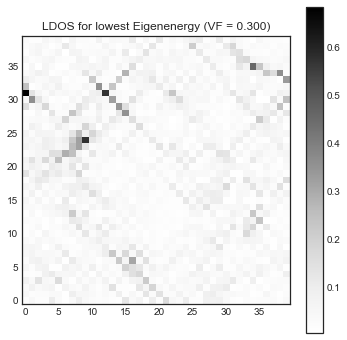

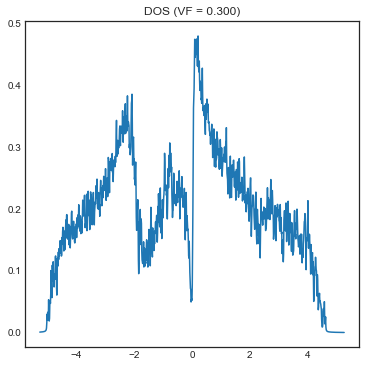

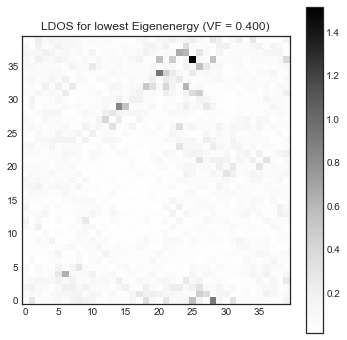

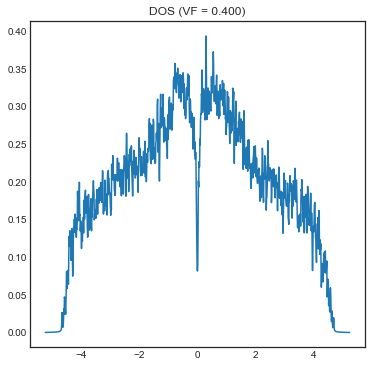

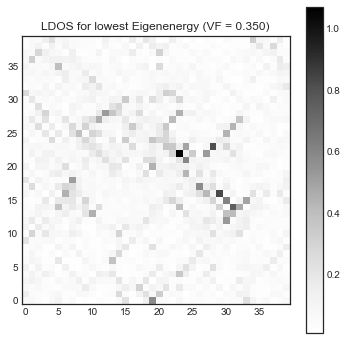

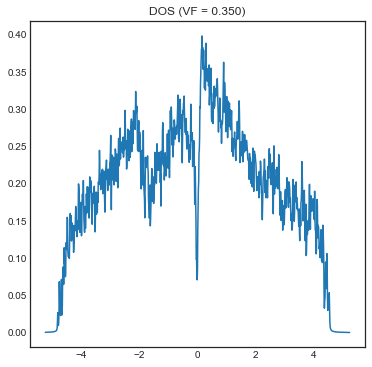

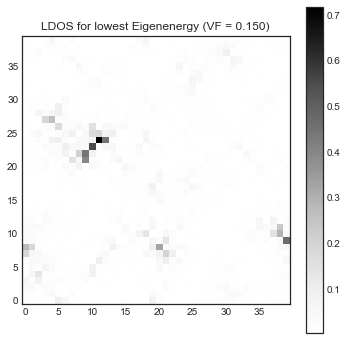

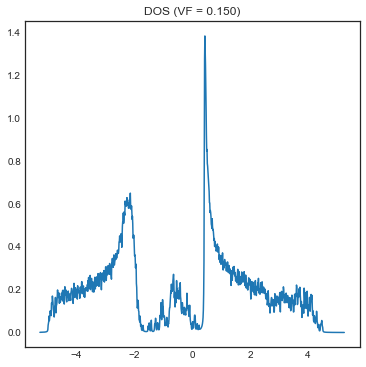

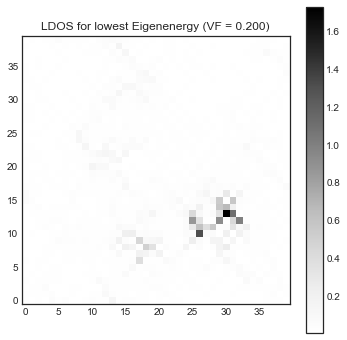

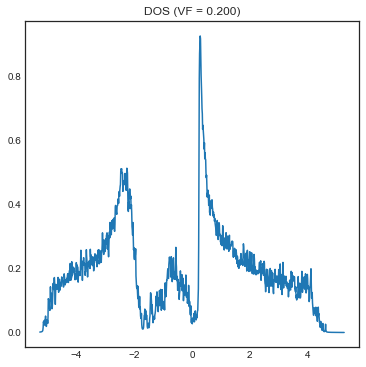

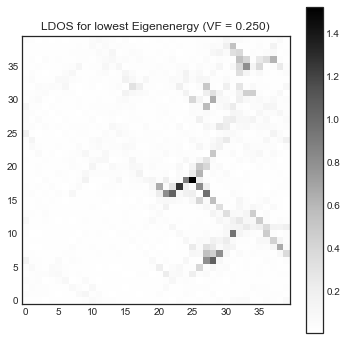

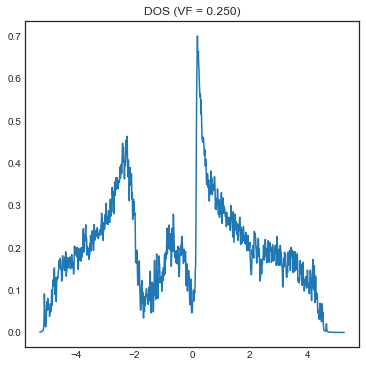

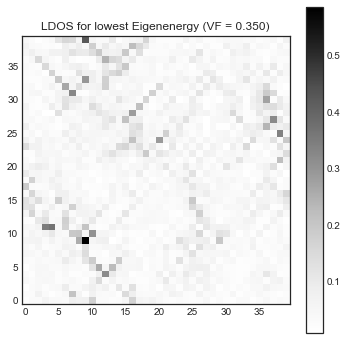

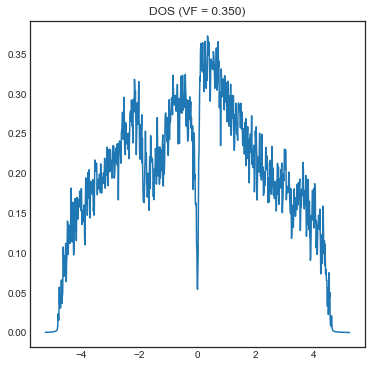

In [84]:
direct = '/Users/Sazbo/Desktop/toAnalyze/'
for files in glob.iglob(direct + '/*.fits'):
    files = os.path.basename(files);
    DisHB_ulist = pyfits.open(direct + files);
    #DisHB_ulist.info()
    susc = np.array( DisHB_ulist['DiamagneticSusceptibility'].data )
    bonds = np.array( DisHB_ulist['HoppingBonds'].data )
    sites = np.array( DisHB_ulist['LatticeSiteOrdering'].data )
    temperature = float(DisHB_ulist['PRIMARY'].header['HUBBARD MODEL K_BT'])
    disorder_fraction = float(DisHB_ulist['PRIMARY'].header['HIERARCH HUBBARD MODEL V FRACTION'])
    density_of_states = np.array(DisHB_ulist['DOS_1'].data)
    idx = np.argmin( np.abs( density_of_states['omega']) )
    sns.set_style('white')
    
    zg = DisHB_ulist['LDOS_1'].data[idx,:,::-1]
    
    plt.figure(figsize=(6,6))
    plt.imshow(zg, origin='lower', extent=[-0.5, 39.5, -0.5, 39.5], cmap='Greys')
    plt.title('LDOS for lowest Eigenenergy (VF = %1.3f)' %disorder_fraction)
    plt.colorbar()
    
    plt.figure(figsize=(6,6))
    plt.plot(density_of_states['omega'], density_of_states['DOS'])
    plt.title('DOS (VF = %1.3f)' %disorder_fraction)

In [103]:
columns_name = ['U', 'VF Fraction', 'MU', 'SEED', 'OMEGA', 'DOS', 'Global_Occupation', 'Local_Occupation'];

#full_dict = {};

direct = '.'

run = 5;
mu_values = 50;
num_trials = 10;
srt_idx = 0 + run * mu_values * num_trials;

BASENAME = 'DisHB_disint_compress_20_mu_0_4.0_0.45_%03d_MU.fits'


dF = pd.DataFrame(columns=columns_name)
print('###### STARTING #######')
for mu in range(mu_values):
    index = srt_idx + mu;
    
    #print(BASENAME % (index))
    
    hdulist = pyfits.open(BASENAME % (index));
    
    U = hdulist[0].header['HIERARCH HUBBARD MODEL U']
    VF = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION']
    MU = hdulist[0].header['HIERARCH SIM HF MU']
    SEED = hdulist[0].header['HIERARCH HUBBARD MODEL V RANDOM SEED']
    
    DOS_avg = hdulist['DOS_1'].data['DOS'];
    omega = hdulist['DOS_1'].data['omega'];
    
    global_occ = hdulist['HfConvergence_Loop1'].header['HIERARCH HUBBARD RESULT MEAN N'];
    local = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data) + np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data)
    
########AVERAGE DOS OVER @PARAM(num_trials) RANDOM ITERATION##############
    for trial in range(num_trials - 1):
        trial += 1;
        hdulist = pyfits.open(BASENAME % (index + mu_values*trial))
        
        DOS_avg += hdulist['DOS_1'].data['DOS'];
    
    DOS_avg = DOS_avg / num_trials;
    
    dF.loc[len(dF)] = [U, VF, MU, SEED, omega, DOS_avg, global_occ, local]
    hdulist.close();
            
full_dict.update({run: dF})
print('###### FINISHED #######')

###### STARTING #######
###### FINISHED #######


In [104]:
data_Frame_Dis_vs_mu = pd.concat(full_dict);

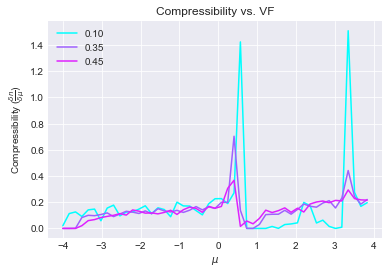

In [183]:
sns.set_style('darkgrid')


index = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]

cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=np.min(index), vmax=np.max(index))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(index)

plt.plot(data_Frame_Dis_vs_mu.loc[4]['MU'][:49], slope(data_Frame_Dis_vs_mu.loc[3]['Global_Occupation']), color=scalarMap.to_rgba(0.1), label='0.10')
plt.plot(data_Frame_Dis_vs_mu.loc[4]['MU'][:49], slope(data_Frame_Dis_vs_mu.loc[4]['Global_Occupation']), color=scalarMap.to_rgba(0.35), label='0.35')
plt.plot(data_Frame_Dis_vs_mu.loc[4]['MU'][:49], slope(data_Frame_Dis_vs_mu.loc[5]['Global_Occupation']), color=scalarMap.to_rgba(0.45), label='0.45')
plt.xlabel('$\mu$')
plt.ylabel(r'Compressibility ($\frac{\delta n}{\delta \mu}$)')
plt.title('Compressibility vs. VF')
plt.legend()



In [145]:
def slope(occupation):
    xdiff = data_Frame_Dis_vs_mu.loc[4]['MU'][1] - data_Frame_Dis_vs_mu.loc[4]['MU'][0];
    size = occupation.size;
    right_val = np.array(occupation[1::]);
    val = np.array(occupation[:size-1]);
    
    return (right_val-val) / xdiff

x = slope(data_Frame_Dis_vs_mu.loc[3]['Global_Occupation'])

In [ ]:
def make_compressMap(dataFrame, index):
    xdiff = data_Frame_Dis_vs_mu.loc[4]['MU'][1] - data_Frame_Dis_vs_mu.loc[4]['MU'][0];
    vals = np.where(np.abs(data_Frame_Dis_vs_mu.loc[4]['Global_Occupation'] - 1.00) < 0.05 );

(array([39, 40, 41, 42, 43, 44, 45]),)
(array([44, 45]),)
(array([46, 47]),)


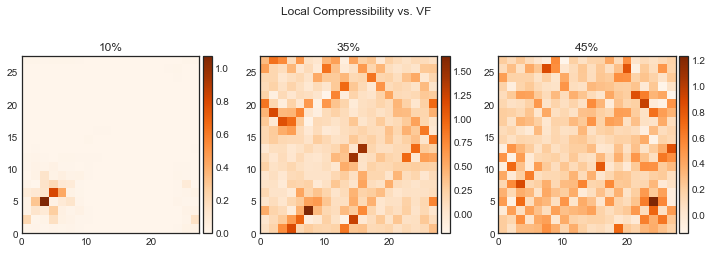

In [186]:
print np.where(np.abs(data_Frame_Dis_vs_mu.loc[3]['Global_Occupation'] - 1.00) < 0.05 );
print np.where(np.abs(data_Frame_Dis_vs_mu.loc[4]['Global_Occupation'] - 1.00) < 0.05 );
print np.where(np.abs(data_Frame_Dis_vs_mu.loc[5]['Global_Occupation'] - 1.00) < 0.05 );

sns.set_style("white")

xdiff = data_Frame_Dis_vs_mu.loc[4]['MU'][1] - data_Frame_Dis_vs_mu.loc[4]['MU'][0];
comp1 = (data_Frame_Dis_vs_mu.loc[5]['Local_Occupation'][47] - data_Frame_Dis_vs_mu.loc[5]['Local_Occupation'][46])/ xdiff
comp2 = (data_Frame_Dis_vs_mu.loc[4]['Local_Occupation'][45] - data_Frame_Dis_vs_mu.loc[4]['Local_Occupation'][44])/ xdiff
comp3 = (data_Frame_Dis_vs_mu.loc[3]['Local_Occupation'][43] - data_Frame_Dis_vs_mu.loc[3]['Local_Occupation'][42])/ xdiff

fig, ax = plt.subplots(1, 3, figsize=(10,4))
im = ax[0].imshow(comp3, extent=[0, 27.5, 0, 27.5], cmap='Oranges')
ax[0].set_title('10%')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)

im = ax[1].imshow(comp2, extent=[0, 27.5, 0, 27.5], cmap='Oranges')
ax[1].set_title('35%')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
f.colorbar(im, cax=cax)

im = ax[2].imshow(comp1, extent=[0, 27.5, 0, 27.5], cmap='Oranges')
ax[2].set_title('45%')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
f.colorbar(im, cax=cax)

fig.suptitle('Local Compressibility vs. VF')
fig.tight_layout()

In [15]:
cd /Volumes/Glaurung/Trivedi_Group/DisHB_disint_Cond/

/Volumes/Glaurung/Trivedi_Group/DisHB_disint_Cond


In [16]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];
VF_FRACTION = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
omega = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.5, 2.0]);

#omega = [0.030 0.10 0.20 0.30 0.40 0.50 0.75 1.0 1.3 1.6 2.0 2.5 3.0 3.5 4.0 4.5]

full_dict = {};

direct = '.';

for fraction in VF_FRACTION:
    
    dF = pd.DataFrame(columns=columns_name)
    para_xx = np.zeros([omega.size], dtype=complex);
    para_yy = np.zeros([omega.size], dtype=complex);
    para_xy = np.zeros([omega.size], dtype=complex);
    count = np.zeros([omega.size]);
    
    for files in glob.iglob(direct + '/DisHB_disint_*.fits'):
        #print files
        hdulist = pyfits.open(files);
        dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        bonds = np.array( hdulist['HoppingBonds'].data )
    
        str_idx = len(hdulist)-16;
    
        if fraction == dis_fraction:
        
            for w in range(omega.size):
        
                para_susc = np.array(hdulist[str_idx+w].data)
        
                if hdulist[str_idx+w].header['HIERARCH PIPELINE CGS OMEGA'] == omega[w]:
                    para_xx[w] += np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                    para_yy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))
                    para_xy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                    count[w] += 1;
                    
        hdulist.close();
    
    print count   
    for i in range(omega.size):
        dF.loc[len(dF)] = [omega[i], np.real(para_xx[i]) / count[i], np.imag(para_xx[i] / count[i]), 
                        np.real(para_yy[i]) / count[i], np.imag(para_yy[i]) / count[i], np.real(para_xy[i])/ count[i], np.imag(para_xy[i]) / count[i]]
        full_dict.update({fraction: dF})

[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]


In [19]:
data_Frame_Cond = pd.concat(full_dict);

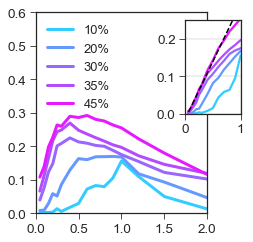

In [25]:
plt.rcParams.update({'font.size': 13})
sns.set_style('ticks')

scale = 0.5

SMALL_SIZE = scale * 27
MEDIUM_SIZE = scale * 27
BIGGER_SIZE = scale * 50

title_font = {'fontname':'sans-serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'sans-serif', 'size': scale * 38}
axis_font_y = {'fontname':'sans-serif', 'size': scale * 40}

plt.rcParams.update({'font.size': 40})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=scale * 27)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];

index = data_Frame_Cond.index.get_level_values(0)
index = index.tolist()
index = sorted(list(set(index)))

index = [0.10, 0.20, 0.30, 0.35, 0.45]

cmap = plt.cm.cool
cNorm  = colors.Normalize(0.0, 0.50)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(index)

#sns.set_palette('colorblind', 8)

columnwidth = scale * 342.2953 # value given by Latex
#fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.75, hf=1.2))
fig, ax1 = plt.subplots(figsize=get_figsize(columnwidth, wf=1.3, hf=1.2))
left, bottom, width, height = [0.8, 0.5, 0.25, 0.35];
ax2 = fig.add_axes([left, bottom, width, height]);

for indice in index:
    
    colorVal = scalarMap.to_rgba(indice)
    
    omega = data_Frame_Cond.loc[indice][columns_name[0]]
    
    para_xx_real = data_Frame_Cond.loc[indice][columns_name[1]]
    para_xx_imag = data_Frame_Cond.loc[indice][columns_name[2]]
    
    para_yy_real = data_Frame_Cond.loc[indice][columns_name[3]]
    para_yy_imag = data_Frame_Cond.loc[indice][columns_name[4]]
    
    para_xy_real = data_Frame_Cond.loc[indice][columns_name[5]]
    para_xy_imag = data_Frame_Cond.loc[indice][columns_name[6]]
    
    ax1.plot(omega, (para_xx_imag) / omega, '-', label = '%1.0d%%' %(indice*100), color=colorVal, linewidth=3.0)
    ax2.plot(omega, (para_xx_imag), '-', color=colorVal, linewidth=2.25)
    
    #ax2.plot(omega, (para_xx_imag), '-.', label = indice, color=colorVal)
    #ax2.set_ylabel('$\omega\sigma_{xx}(\omega)$')
    #ax2.set_xlabel('$\omega/t$')
    #ax2.legend(loc = 2)

    
#ax1.set_ylabel('$\sigma^{\mu\mu}(\omega)$', **axis_font_x)
#ax1.set_xlabel('$\omega/t$', **axis_font_x)
ax1.set_xlim(0.00, 2.0)
ax1.set_ylim(-0.00, 0.6)


ax2.set_xlim(0.00, 1.0)
ax2.set_ylim(-0.00, 0.25)
#ax2.set_ylabel('$\omega\sigma^{\mu\mu}(\omega)$', **axis_font_x)

ax1.legend( loc = 2, prop={'size': scale * 26})
plt.grid(color='grey', linestyle='-', linewidth=0.25);
props = dict(boxstyle='round', facecolor='white', alpha=0.5);
#ax1.text(0.1, 0.610, '$U = 4.0t, V = 3.5t$', **axis_font_x)

x_dat = np.arange(0, 2, 0.01);

ax2.plot(x_dat, 0.31 * x_dat - 0.015, 'k--')

#style="Simple,tail_width=2.0,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color="r")
#a1 = patches.FancyArrowPatch((0.95,0.14), (0.55, 0.34), **kw)

#plt.gca().add_patch(a1)

#currentAxis = plt.gca()
#currentAxis.add_patch(Rectangle((.00, .00), 0.2, 0.2, fill=None, alpha=1, color = 'r', linewidth = 5.0))

#f.suptitle('Optical Conductivity vs. Disorder F')
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/sigma.pdf', bbox_inches = "tight")

In [440]:
def powerlaw(data, intercept, power, coeff):
    return coeff * (data)**power + intercept;

3.29255849479 0.239494101774
2.25233187727 0.135735699966
1.41389507274 0.204110154224
1.11712926897 0.148979721423
0.948527792493 0.11047146017
1.12493987199 0.0506180665286
1.05439717913 0.0719043471992
1.13831910064 0.0560266456492


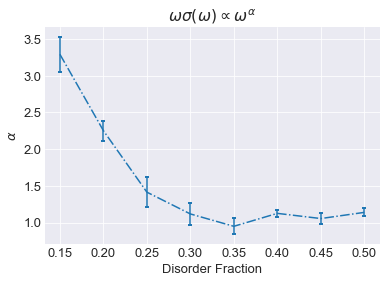

In [456]:
import matplotlib
matplotlib.rcParams.update({'errorbar.capsize': 2})

columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];

VF_FRACTION = np.array([0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5])

index = data_Frame_Cond.index.get_level_values(0)
index = index.tolist()
index = sorted(list(set(index)))

power = np.zeros(VF_FRACTION.size);
power_err = np.zeros(len(VF_FRACTION-1));
count = 0;
for indice in index:
    
    omega = data_Frame_Cond.loc[indice][columns_name[0]]
    
    para_xx_imag = data_Frame_Cond.loc[indice][columns_name[2]]
    para_yy_imag = data_Frame_Cond.loc[indice][columns_name[4]]
    para_imag = (para_xx_imag + para_yy_imag)/2.

    popt, pconv = opt.curve_fit(powerlaw, omega[:8], para_imag[:8])
    perr = np.sqrt(np.diag(pconv))
    
    print popt[1], perr[1]
    power[count] = popt[1];
    power_err[count] = perr[1]
    count += 1;
    
plt.errorbar(VF_FRACTION, power, yerr=power_err, capthick=2, linestyle='-.')
plt.xlabel('Disorder Fraction')
plt.ylabel(r'$\alpha$')
plt.title(r'$\omega\sigma(\omega) \propto \omega^{\alpha}$')

In [5]:
cd /Volumes/Glaurung/Trivedi_Group/DisHB_disint_Cond/

/Volumes/Glaurung/Trivedi_Group/DisHB_disint_Cond


./DisHB_disint_COND_28_0_0017.fits
0.1
5069 4931
0.944034143385


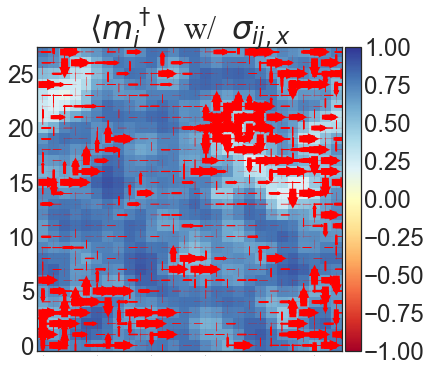

In [217]:
VF_FRACTION = np.array([0.25])
SEEDS = np.array([1984, 8135, 3659, 2894, 8787])
omega = 0.10;
sns.set_style('white');
cutoff = 0.0;

axis_font_x = {'fontname':'Times New Roman', 'size':'18'}
axis_font_y = {'fontname':'Times New Roman', 'size':'32'}


SMALL_SIZE = scale * 0
MEDIUM_SIZE = scale * 48
BIGGER_SIZE = scale * 50

title_font = {'fontname':'sans-serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

plt.rcParams.update({'font.size': 40})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

for fraction in VF_FRACTION:
    for files in glob.iglob(direct + '/DisHB_disint_*.fits'):
        hdulist = pyfits.open(files);
        dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        
        seed = hdulist[0].header["HIERARCH HUBBARD MODEL V RANDOM SEED"];
        
        str_idx = len(hdulist)-15;
    
        if (fraction == dis_fraction) & (seed == SEEDS[2]):
            print files
            para_susc = np.array(hdulist[str_idx].data);
            density_of_states = np.array(hdulist['DOS_1'].data)
            idx_positive = np.argmin( np.abs( density_of_states['omega'] - omega ) );
            idx_negative = np.argmin( np.abs( density_of_states['omega'] + omega ) );
            bonds = np.array( hdulist['HoppingBonds'].data );
            print hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'];
            print idx_positive, idx_negative
            
            if hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'] == omega:
                f, ax1 = plt.subplots(1, 1, figsize=(7,7));
                sites = np.array( hdulist['LatticeSiteOrdering'].data )
                para_xx = ((para_susc['ParamagneticSusceptibilityXUp']) + (para_susc['ParamagneticSusceptibilityXDn'])) / 2.
                para_yy = ((para_susc['ParamagneticSusceptibilityYUp']) + (para_susc['ParamagneticSusceptibilityYDn'])) / 2.
                
                zg = hdulist['LDOS_1'].data[idx_positive,:,::-1] + hdulist['LDOS_1'].data[idx_negative,:,::-1] + hdulist['LDOS_1'].data[idx_positive + 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative + 1,:,::-1] + hdulist['LDOS_1'].data[idx_positive - 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative - 1,:,::-1];
                dm = np.array( hdulist["OnSiteImpurityPotential"].data )
                spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
                spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
                occupation = spin_up_map + spin_dn_map;
                
                magn = spin_up_map - spin_dn_map;
                anti_ferro = make_antiFerro(28);
                magn_m = np.multiply(magn, anti_ferro) / 0.7;
                
                sigma_y = 0.7;
                sigma_x = 0.7;
                sigma = [sigma_y, sigma_x]
                magn_smooth = sp.ndimage.filters.gaussian_filter(magn_m, sigma, mode='wrap')
                #mag = np.sqrt(mag_grad[0]**2 + mag_grad[1]**2)
                
                #mag_grad = np.gradient(magn_smooth)
                #xgrad = mag_grad[0]
                #x, y = range(0, 28), range(0,28)
                #xi, yi = np.meshgrid(x, y)
                
                #cmap_reversed = matplotlib.cm.get_cmap('autumn_r')
                print np.max(magn_m)
                
                im1 = ax1.imshow(magn_smooth, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], norm=colors.Normalize(vmin=-1.0, vmax=1.0),  cmap='RdYlBu')
                #im1 = ax1.imshow(dm, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5],  cmap='Greys')
                divider = make_axes_locatable(ax1)
                cax = divider.append_axes('right', size='5%', pad=0.05)
                f.colorbar(im1, cax=cax, orientation='vertical')

                
                #im2 = ax2.imshow(occupation, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], norm=colors.Normalize(vmin=0.4, vmax=1.6), cmap='terrain')
                #divider = make_axes_locatable(ax2)
                #cax = divider.append_axes('right', size='5%', pad=0.05)
                #f.colorbar(im2, cax=cax, orientation='vertical')
                
                maxchi_x = np.max(np.abs(np.imag(para_xx)));
                maxchi_y = np.max(np.abs(np.imag(para_yy)));
                
                maxchi_x = 0.0001708106323;
                maxchi_y = 0.0001708106323;
                
                #print maxchi_x, maxchi_y;
                
                for b, chix, chiy in zip(bonds, para_xx, para_yy):
                    rowsite = b[0]-1
                    colsite = b[1]-1
                    vec = np.array([b[3], b[4]])
                    
                    #################################
                    rowsite_coord = np.array([sites[rowsite]['b1'], sites[rowsite]['b2']])
                    colsite_coord = rowsite_coord + vec

                    imag_chix = np.imag(chix)
                    magnitudex = np.abs(np.imag(chix)) / maxchi_x

                    if imag_chix < 0:
                        rowsite_coord, colsite_coord = colsite_coord, rowsite_coord

                    arrow_start = rowsite_coord * 0.1 + colsite_coord * 0.9
                    arrow_direction = 0.8 * (colsite_coord - rowsite_coord)
                    
                    if magnitudex > 0.015:
                        magnitudex = 0.015;
                    
                    ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                        head_width= magnitudex,
                        head_length= magnitudex,
                        linewidth= 250000 * magnitudex**2.5,
                        fc='r',
                        ec='r')
                    #linewidth= 800 * magnitudex**1.25
                    #linewidth = 20000 * magnitudex**2.0
                    ################################
                    rowsite_coord = np.array([sites[rowsite]['b1'], sites[rowsite]['b2']])
                    colsite_coord = rowsite_coord + vec
            
                    imag_chiy = np.imag(chiy)
                    magnitudey = np.abs(np.imag(chiy)) / maxchi_y
                    
                    if imag_chiy < 0:
                        rowsite_coord, colsite_coord = colsite_coord, rowsite_coord

                    arrow_start = rowsite_coord * 0.1 + colsite_coord * 0.9
                    arrow_direction = 0.8 * (colsite_coord - rowsite_coord)
        
                    #ax2.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                    #    head_width=magnitudey,
                    #    head_length=magnitudey,
                    #    linewidth= 8 * magnitudey,
                    #    fc='r',
                    #    ec='r')
                
                ax1.set_xlim(-0.5, 27.5);
                ax1.set_ylim(-0.5, 27.5);
                #ax1.set_title('%1.0f %%' % (fraction*100), **axis_font_y);
                #ax1.set_title(r'$\langle m_i^\dagger \rangle$', **axis_font_y);
                ax1.set_title(r'$\langle m_i^\dagger \rangle$' +  '  w/  ' + r'$\sigma_{ij, x}$', **axis_font_y);
                #ax1.set_title(r'$\langle S_z^{-(x + y)} \rangle$', **axis_font_y);
                #ax2.set_xlim(-0.5, 27.5);
                #ax2.set_ylim(-0.5, 27.5);
                #ax2.set_title('$\sigma_{ij:y}$');
                f.tight_layout()
                f.savefig('/Users/Sazbo/Desktop/mm19/mag+sig_25.pdf', bbox_inches = 'tight')
                f.show()
                break;

In [238]:
np.where(np.abs(np.imag(para_xx)))[0].size

1568

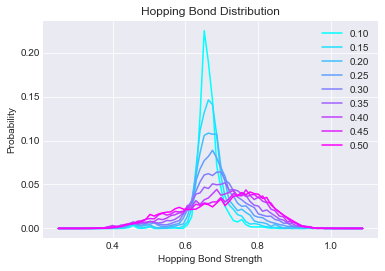

In [326]:
sns.set_style('darkgrid')
VF_FRACTION = np.array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]);
num = 75;
bin_edges = np.linspace(start=0.25, stop=1.1, num = num)

cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=np.min(VF_FRACTION), vmax=np.max(VF_FRACTION))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(VF_FRACTION)

for fraction in VF_FRACTION:
    hopping_dist = np.zeros([num-1]);
    colorVal = scalarMap.to_rgba(fraction);
    count = 0;
    for files in glob.iglob(direct + '/DisHB_disint_*.fits'):
        
        hdulist = pyfits.open(files);
        dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        
        if (fraction == dis_fraction):
            count += 1;
            susc = np.array(hdulist['DiamagneticSusceptibilityComp'].data);
            density_of_states = np.array(hdulist['DOS_1'].data)
            
            diagUp_real = np.array(susc['DiamagneticSusceptibilityXUp'] + susc['DiamagneticSusceptibilityYUp']);
            diagDn_real = np.array(susc['DiamagneticSusceptibilityXDn'] + susc['DiamagneticSusceptibilityYDn']);
            diag_real = diagUp_real + diagDn_real;
            #print diag_real.shape
            
            hist, bin_edges = np.histogram(diag_real, bins=bin_edges);
            
            hopping_dist += hist / 1568.0;
    plt.plot(bin_edges[:-1], hopping_dist / count, label='%0.2f' %fraction, color=colorVal);
    plt.xlabel('Hopping Bond Strength');
    plt.ylabel('Probability')
    plt.legend()
    plt.title('Hopping Bond Distribution');
            

./DisHB_disint_COND_28_0_0000.fits
./DisHB_disint_COND_28_0_0005.fits
./DisHB_disint_COND_28_0_0010.fits
./DisHB_disint_COND_28_0_0015.fits
./DisHB_disint_COND_28_0_0020.fits
./DisHB_disint_COND_28_0_0025.fits
./DisHB_disint_COND_28_0_0030.fits
./DisHB_disint_COND_28_0_0035.fits
./DisHB_disint_COND_28_0_0040.fits


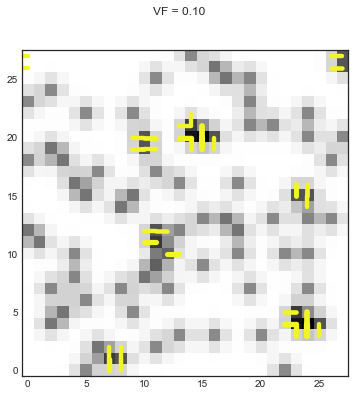

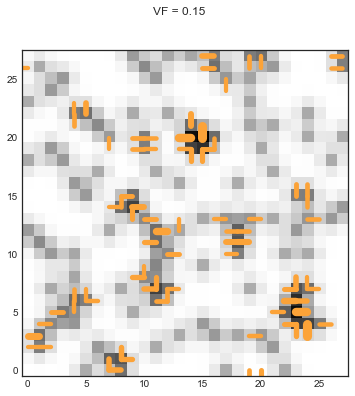

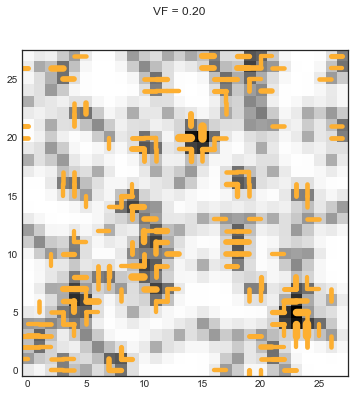

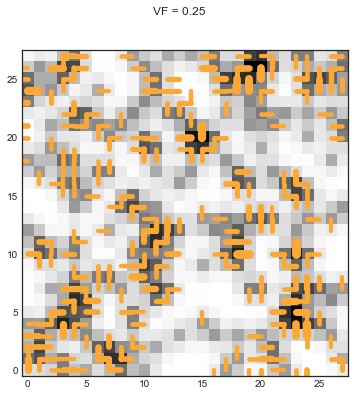

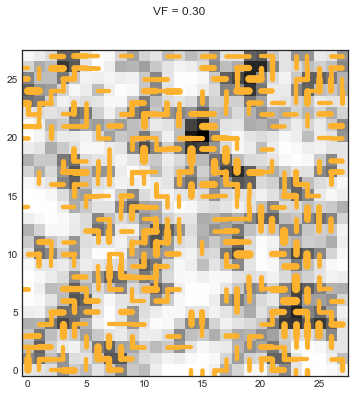

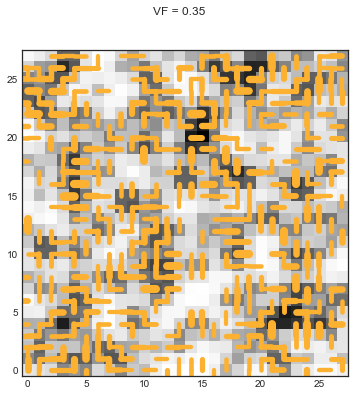

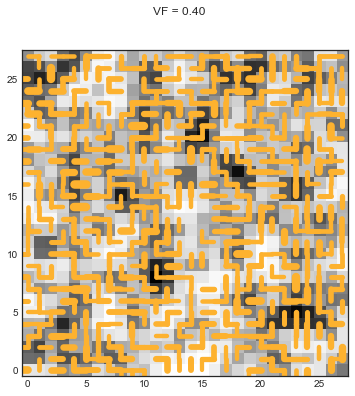

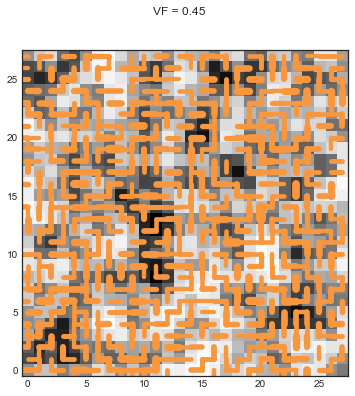

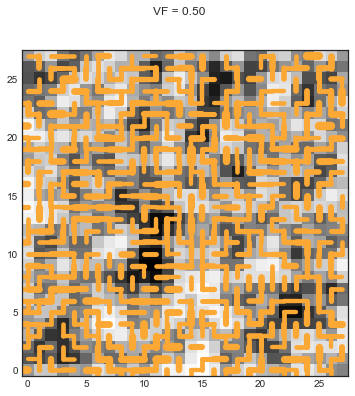

In [305]:
sns.set_style('white')
VF_FRACTION = np.array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]);
SEEDS = np.array([1984, 8135, 3659, 2894, 8787]);
num = 75;
bin_edges = np.linspace(start=0.25, stop=1.1, num = num)

cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=np.min(VF_FRACTION), vmax=np.max(VF_FRACTION))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(VF_FRACTION)

for fraction in VF_FRACTION:
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    hopping_dist = np.zeros([num-1]);
    colorVal = scalarMap.to_rgba(fraction);
    count = 0;
    for files in glob.iglob(direct + '/DisHB_disint_*.fits'):
        
        hdulist = pyfits.open(files);
        dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        seed = hdulist[0].header["HIERARCH HUBBARD MODEL V RANDOM SEED"];
        
        if (fraction == dis_fraction) & (seed == SEEDS[0]):
            print files
            susc = np.array(hdulist['DiamagneticSusceptibilityComp'].data);
            bonds = np.array(hdulist['HoppingBonds'].data);
            sites = np.array(hdulist['LatticeSiteOrdering'].data);
            density_of_states = np.array(hdulist['DOS_1'].data)
            dm = np.array(hdulist["OnSiteImpurityPotential"].data)
            
            diagUp_real = np.array(susc['DiamagneticSusceptibilityXUp'] + susc['DiamagneticSusceptibilityYUp']);
            diagDn_real = np.array(susc['DiamagneticSusceptibilityXDn'] + susc['DiamagneticSusceptibilityYDn']);
            diag_real = diagUp_real + diagDn_real;
            
            sigma_y = 0.7;
            sigma_x = 0.7;
            sigma = [sigma_y, sigma_x]
            dm_smooth = sp.ndimage.filters.gaussian_filter(dm, sigma, mode='constant')
            
            im = ax.imshow(dm_smooth, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], cmap='Greys')
            ax.set_xlim(-0.5, 27.5)
            ax.set_ylim(-0.5, 27.5)
            
            cmap = plt.cm.plasma   
            cNorm  = colors.Normalize(vmin=np.min(np.abs(diag_real)), vmax=np.max(np.abs(diag_real)))
            scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

            scalarMap.set_array(np.abs(diag_real))
            
            
            for b, chi in zip(bonds, diag_real):
                rowsite = b[0]-1
                colsite = b[1]-1
                vec = np.array([b[3], b[4]])
                rowsite_coord = np.array([sites[rowsite]['b1'], sites[rowsite]['b2']])
                colsite_coord = rowsite_coord + vec
        
                magnitude = np.abs(chi) / 1.0
        
                colorVal = scalarMap.to_rgba(0.85)
        
                if chi < 0:
                    rowsite_coord, colsite_coord = colsite_coord, rowsite_coord

                arrow_start = rowsite_coord * 0.1 + colsite_coord * 0.9
                arrow_direction = 0.8 * (colsite_coord - rowsite_coord)
        
                if magnitude < 0.75:
                    magnitude = 0;
        
                ax.plot([rowsite_coord[0], colsite_coord[0]], 
                    [rowsite_coord[1], colsite_coord[1]],
                    linewidth=10.*magnitude**3,
                    color=colorVal)
            
            fig.suptitle('VF = %0.2f' % fraction)
            fig.savefig('/Users/Sazbo/Desktop/V_shape_story/hopping_%1.0d_%1.0d.png' %(fraction*100, seed))
                
            break;

In [283]:
LDOS = hdulist['LDOS_1'].data

In [102]:
cd /Volumes/Balrog/Compression/DisInt_comp_4_45/

/Volumes/Balrog/Compression/DisInt_comp_4_45


In [3]:
cd ~/Desktop/DisHB_disint_Cond/resistivity/

/Users/Sazbo/Desktop/DisHB_disint_Cond/resistivity


In [4]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];
VF_FRACTION = [0.1, 0.15, 0.30, 0.35, 0.45, 0.5];
TEMPERATURES = [0.025, 0.05, 0.075, 0.10, 0.125, 0.150, 0.175, 0.20];
omega = np.array([0.025, 0.05, 0.075, 0.1, 0.015, 0.03, 0.045, 0.06]);

temp_dict = {};
direct = '.';

for temperature in TEMPERATURES:
    
    fraction_dict = {};

    for fraction in VF_FRACTION:
    
        dF = pd.DataFrame(columns=columns_name)
        para_xx = np.zeros([omega.size], dtype=complex);
        para_yy = np.zeros([omega.size], dtype=complex);
        para_xy = np.zeros([omega.size], dtype=complex);
        count = np.zeros([omega.size]);
    
        for files in glob.iglob(direct + '/DisHB_24_*.fits'):
            #print files
            hdulist = pyfits.open(files);
            dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
            temp = hdulist[0].header['HIERARCH HUBBARD MODEL K_BT'];
            bonds = np.array( hdulist['HoppingBonds'].data )
    
            str_idx = len(hdulist)-8;
    
            if (fraction == dis_fraction) & (temperature == temp):
        
                for w in range(omega.size):
        
                    para_susc = np.array(hdulist[str_idx+w].data)
        
                    if hdulist[str_idx+w].header['HIERARCH PIPELINE CGS OMEGA'] == omega[w]:
                        para_xx[w] += np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                        para_yy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))
                        para_xy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                        count[w] += 1;
                    
            hdulist.close();
    
        print count   
        for i in range(omega.size):
            dF.loc[len(dF)] = [omega[i], np.real(para_xx[i]) / count[i], np.imag(para_xx[i] / count[i]), 
                        np.real(para_yy[i]) / count[i], np.imag(para_yy[i]) / count[i], np.real(para_xy[i])/ count[i], np.imag(para_xy[i]) / count[i]]
        fraction_dict.update({fraction: dF})
    
    temp_dict.update({temperature: fraction_dict})
    

[ 3.  3.  3.  3.  3.  3.  3.  3.]
[ 2.  2.  2.  2.  2.  2.  2.  2.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  4.  4.  4.  4.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 0.  0.  0.  0.  0.  0.  0.  0.]


/Users/Sazbo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
/Users/Sazbo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in cdouble_scalars
/Users/Sazbo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


[ 3.  3.  3.  3.  3.  3.  3.  3.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  5.  5.]
[ 5.  5.  5.  5.  5.  5.  4.  4.]
[ 5.  5.  5.  5.  2.  2.  2.  2.]
[ 5.  5.  5.  5.  3.  3.  3.  4.]
[ 5.  5.  5.  5.  1.  1.  0.  0.]
[ 5.  5.  5.  

In [5]:
data_Frame_resist = pd.DataFrame.from_dict(temp_dict, orient='index');

In [6]:
data_Frame_resist.loc[0.025][0.1].sort_values(axis=0, by='OMEGA')

OMEGA  Para_Susc_XX_Real  Para_Susc_XX_Imag  Para_Susc_YY_Real  \
4  0.015           0.335035           0.000052           0.335572   
0  0.025           0.335095           0.000058           0.335634   
5  0.030           0.335112           0.000104           0.335651   
6  0.045           0.335241           0.000156           0.335783   
1  0.050           0.335311           0.000116           0.335853   
7  0.060           0.335423           0.000210           0.335968   
2  0.075           0.335673           0.000177           0.336224   
3  0.100           0.336190           0.000243           0.336753   

   Para_Susc_YY_Imag  Para_Susc_XY_Real  Para_Susc_XY_Imag  
4           0.000053      -4.139628e-07       4.824019e-07  
0           0.000059       1.830186e-07       4.868156e-07  
5           0.000106       3.773908e-07       9.394417e-07  
6           0.000159       1.594679e-06       1.343741e-06  
1           0.000119       2.150738e-06       9.474291e-07  
7           0.000214       3.148324e-06       1.556067e-06  
2           0.000181       4.480185e-06       8.522653e-07  
3           0.000250       5.660347e-06      -4.049886e-06

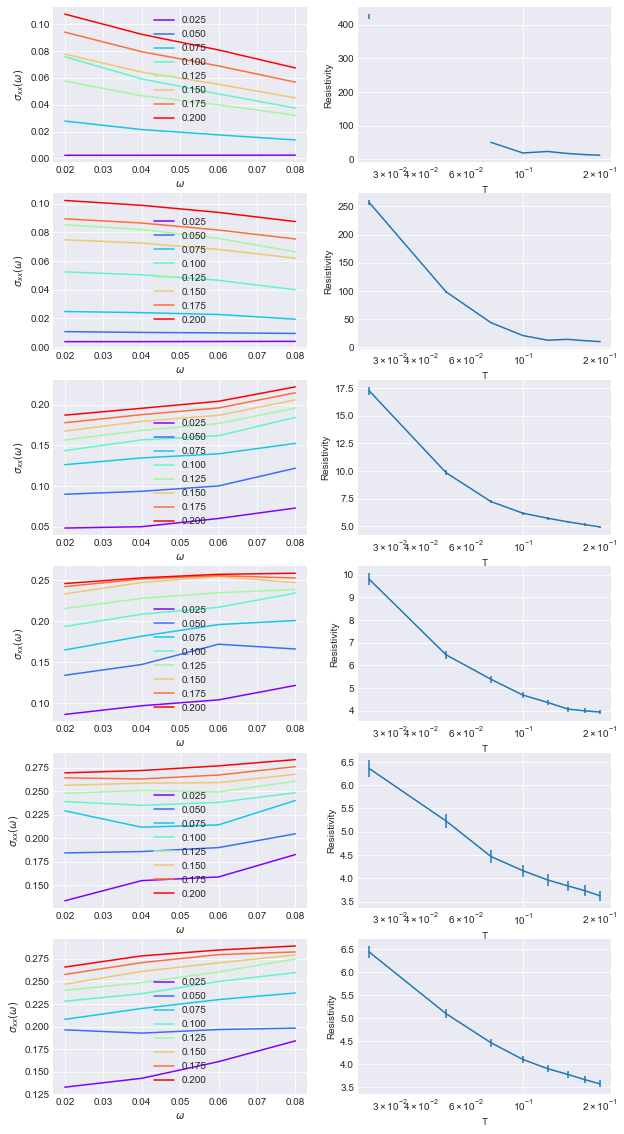

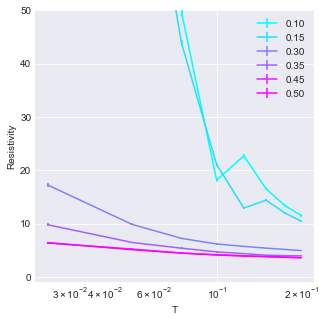

In [7]:
sns.set_style('darkgrid')

columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];


VF_FRACTION = np.array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]);
cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=np.min(VF_FRACTION), vmax=np.max(VF_FRACTION))
scalarMap2 = cmx.ScalarMappable(norm=cNorm,cmap=cmap)
scalarMap2.set_array(VF_FRACTION)



VF_FRACTION = np.array([0.10, 0.15, 0.30, 0.35, 0.45, 0.50]);
TEMPERATURES = np.array([0.025, 0.05, 0.075, 0.10, 0.125, 0.150, 0.175, 0.20]);
omega = np.array([0.020, 0.040, 0.060, 0.080]);

omega_size = omega.size;

para_xx_imag = np.zeros([omega_size]);
para_xy_imag = np.zeros([omega_size]);
resistivity = np.zeros(TEMPERATURES.size);
error = np.zeros(TEMPERATURES.size);

cmap = plt.cm.rainbow 
cNorm  = colors.Normalize(vmin=np.min(TEMPERATURES), vmax=np.max(TEMPERATURES))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(TEMPERATURES)


f, ax = plt.subplots(VF_FRACTION.size, 2, figsize=(10,20))

f2, ax2 = plt.subplots(1, 1, figsize=(5,5))

for j in range(VF_FRACTION.size):
    
    colorVal2 = scalarMap2.to_rgba(VF_FRACTION[j]);
    
    for k in range(TEMPERATURES.size):
        
        colorVal = scalarMap.to_rgba(TEMPERATURES[k])
        
        data_Frame_holder = data_Frame_resist.loc[TEMPERATURES[k]][VF_FRACTION[j]].sort_values(axis=0, by='OMEGA');
        
        for i in range(omega_size):
            para_xx_imag[i] = data_Frame_holder.loc[i][columns_name[2]] / data_Frame_holder.loc[i][columns_name[0]];
            para_xy_imag[i] = data_Frame_holder.loc[i][columns_name[6]] / data_Frame_holder.loc[i][columns_name[0]];
         
        resistivity[k] = 1.0 / (np.mean(para_xx_imag));
        error[k] = np.max(np.abs(para_xy_imag)) / np.mean(para_xx_imag)
        
        #print(np.max(np.abs(para_xy_imag)), np.min(np.abs(para_xy_imag)))
        
        ax[j][0].plot(omega, para_xx_imag, label = "%0.3f" % TEMPERATURES[k], color=colorVal);
    
    ax[j][0].set_xlabel('$\omega$');
    ax[j][0].set_ylabel('$\sigma_{xx}(\omega)$');
    ax[j][0].legend();
    ax[j][1].errorbar(TEMPERATURES, resistivity, error[k] * resistivity);
    ax[j][1].set_xlabel('T');
    ax[j][1].set_ylabel('Resistivity');
    #ax[j][1].set_yscale('log')
    ax[j][1].set_xscale('log')
    
    ax2.errorbar(TEMPERATURES, resistivity, error[k] * resistivity, color = colorVal2, label="%0.2f" % VF_FRACTION[j]);
    ax2.legend();
    ax2.set_xlabel('T');
    ax2.set_ylabel('Resistivity');
    ax2.set_ylim(-1.0, 50)
    #ax2.set_yscale('log')
    ax2.set_xscale('log')
    

In [2]:
cd /Volumes/Balrog/resist3U2/

/Volumes/Balrog/resist3U2


In [4]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];
VF_FRACTION = [0.10, 0.20, 0.30, 0.35, 0.45];
TEMPERATURES = [0.005, 0.01, 0.025, 0.05, 0.075, 0.10, 0.125, 0.150, 0.175, 0.20];
omega = np.array([0.020, 0.040, 0.060]);

temp_dict = {};
direct = '.';

for temperature in TEMPERATURES:
    
    fraction_dict = {};

    for fraction in VF_FRACTION:
    
        dF = pd.DataFrame(columns=columns_name)
        para_xx = np.zeros([omega.size], dtype=complex);
        para_yy = np.zeros([omega.size], dtype=complex);
        para_xy = np.zeros([omega.size], dtype=complex);
        var_xx = np.zeros([omega.size], dtype=complex);
        var_yy = np.zeros([omega.size], dtype=complex);
        var_xy = np.zeros([omega.size], dtype=complex);
        count = np.zeros([omega.size]);
    
        for files in glob.iglob(direct + '/DisHB_24_*.fits'):
            #print files
            hdulist = pyfits.open(files);
            dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
            temp = hdulist[0].header['HIERARCH HUBBARD MODEL K_BT'];
            bonds = np.array( hdulist['HoppingBonds'].data )
            
            if (temperature < 0.02):
                str_idx = len(hdulist)-3;
            else:
                str_idx = len(hdulist)-4;
    
            if (fraction == dis_fraction) & (temperature == temp):
        
                for w in range(omega.size):
        
                    para_susc = np.array(hdulist[str_idx+w].data)
        
                    if hdulist[str_idx+w].header['HIERARCH PIPELINE CGS OMEGA'] < 0.08:
                        para_xx[w] += np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                        para_yy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))
                        para_xy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                        var_xx[w] += (np.imag(np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))))**2.0
                        var_yy[w] += (np.imag(np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))))**2.0
                        var_xy[w] += (np.imag(np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))))**2.0
                        count[w] += 1;
                    
            hdulist.close();
    
        print(count)   
        for i in range(omega.size):
            dF.loc[len(dF)] = [omega[i], np.real(para_xx[i]) / count[i], np.imag(para_xx[i] / count[i]), 
                               np.real(para_yy[i]) / count[i], np.imag(para_yy[i]) / count[i], np.real(para_xy[i])/ count[i], np.imag(para_xy[i]) / count[i]]
        fraction_dict.update({fraction: dF})
    
    temp_dict.update({temperature: fraction_dict})
    

[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]
[8. 8. 8.]


In [39]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];
VF_FRACTION = [0.10, 0.20, 0.35, 0.45];
TEMPERATURES = [0.005];
omega = np.array([0.015, 0.030]);

#temp_dict = {};
direct = '.';

for temperature in TEMPERATURES:
    
    fraction_dict = {};

    for fraction in VF_FRACTION:
    
        dF = pd.DataFrame(columns=columns_name)
        para_xx = np.zeros([omega.size], dtype=complex);
        para_yy = np.zeros([omega.size], dtype=complex);
        para_xy = np.zeros([omega.size], dtype=complex);
        var_xx = np.zeros([omega.size], dtype=complex);
        var_yy = np.zeros([omega.size], dtype=complex);
        var_xy = np.zeros([omega.size], dtype=complex);
        count = np.zeros([omega.size]);
    
        for files in glob.iglob(direct + '/DisHB_COND_*.fits'):
            #print files
            hdulist = pyfits.open(files);
            dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
            temp = hdulist[0].header['HIERARCH HUBBARD MODEL K_BT'];
            bonds = np.array( hdulist['HoppingBonds'].data )
    
            str_idx = len(hdulist)-20;
    
            if (fraction == dis_fraction) & (temperature == temp):
                #print files
                for w in range(omega.size):
        
                    para_susc = np.array(hdulist[str_idx+w].data)
        
                    if hdulist[str_idx+w].header['HIERARCH PIPELINE CGS OMEGA'] == omega[w]:
                        para_xx[w] += np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                        para_yy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))
                        para_xy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                        var_xx[w] += (np.imag(np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))))**2.0
                        var_yy[w] += (np.imag(np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))))**2.0
                        var_xy[w] += (np.imag(np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))))**2.0
                        count[w] += 1;
                    
            hdulist.close();
    
        print count   
        for i in range(omega.size):
            dF.loc[len(dF)] = [omega[i], np.real(para_xx[i]) / count[i], np.imag(para_xx[i] / count[i]), 
                               np.real(para_yy[i]) / count[i], np.imag(para_yy[i]) / count[i], np.real(para_xy[i])/ count[i], np.imag(para_xy[i]) / count[i]]
        fraction_dict.update({fraction: dF})
    
    temp_dict.update({temperature: fraction_dict})

[ 10.  10.]
[ 10.  10.]
[ 6.  6.]
[ 10.  10.]


In [71]:
cd /Volumes/Balrog/resist3U2/

/Volumes/Balrog/resist3U2


In [73]:
hdulist = pyfits.open('DisHB_24_U=3_V=2.25_temp0.005_0_000.fits')
hdulist[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HIERARCH LATTICE BASIS1 X ANGS = 1.000000E+00 / X-component of first unit cell b
HIERARCH LATTICE BASIS1 Y ANGS = 0.000000E+00 / Y-component of first unit cell b
HIERARCH LATTICE BASIS2 X ANGS = 0.000000E+00 / X-component of second unit cell 
HIERARCH LATTICE BASIS2 Y ANGS = 1.000000E+00 / Y-component of second unit cell 
HIERARCH LATTICE NSITES B1 = 24 / Number of lattice sites along b1              
HIERARCH LATTICE NSITES B2 = 24 / Number of lattice sites along b2              
HIERARCH LATTICE NSITES TOTA

In [6]:
cd /Users/Sazbo/Desktop/

/Users/Sazbo/Desktop


In [7]:
data_Frame_resist2 = pd.DataFrame.from_dict(temp_dict, orient='index');

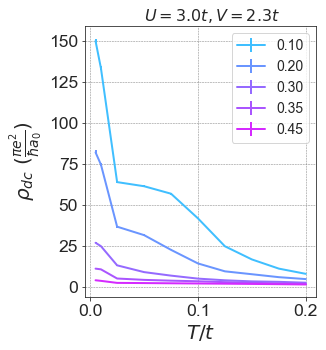

In [13]:
sns.set_style('ticks')

columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];


plt.rcParams.update({'font.size': 13})
sns.set_style('ticks')

scale = 0.5

SMALL_SIZE = scale * 35
MEDIUM_SIZE = scale * 48
BIGGER_SIZE = scale * 50

title_font = {'fontname':'sans-serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'sans-serif', 'size': scale * 32}
axis_font_y = {'fontname':'sans-serif', 'size': scale * 40}

plt.rcParams.update({'font.size': 40})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=scale * 30)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



VF_FRACTION = np.array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]);
cmap = plt.cm.cool 
cNorm  = colors.Normalize(-0.05, 0.55)
scalarMap2 = cmx.ScalarMappable(norm=cNorm,cmap=cmap)
scalarMap2.set_array(VF_FRACTION)



VF_FRACTION = np.array([0.10, 0.20, 0.30, 0.35, 0.45]);
TEMPERATURES = np.array([0.005, 0.01, 0.025, 0.05, 0.075, 0.10, 0.125, 0.150, 0.175, 0.20]);
omega = np.array([0.020, 0.040, 0.060]);

omega_size = omega.size;

para_xx_imag = np.zeros([omega_size]);
para_yy_imag = np.zeros([omega_size]);
para_xy_imag = np.zeros([omega_size]);
resistivity = np.zeros(TEMPERATURES.size);
error = np.zeros(TEMPERATURES.size);

cmap = plt.cm.rainbow 
cNorm  = colors.Normalize(vmin=np.min(TEMPERATURES), vmax=np.max(TEMPERATURES))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(TEMPERATURES)

columnwidth = scale * 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.75, hf=1.2))

for j in range(VF_FRACTION.size):
    
    colorVal2 = scalarMap2.to_rgba(VF_FRACTION[j]);
    
    for k in range(TEMPERATURES.size):
        
        colorVal = scalarMap.to_rgba(TEMPERATURES[k])
        
        data_Frame_holder = data_Frame_resist2.loc[TEMPERATURES[k]][VF_FRACTION[j]].sort_values(axis=0, by='OMEGA');
        
        for i in range(omega_size):
            para_xx_imag[i] = data_Frame_holder.loc[i][columns_name[2]] / data_Frame_holder.loc[i][columns_name[0]];
            para_yy_imag[i] = data_Frame_holder.loc[i][columns_name[4]] / data_Frame_holder.loc[i][columns_name[0]];
            para_xy_imag[i] = data_Frame_holder.loc[i][columns_name[6]] / data_Frame_holder.loc[i][columns_name[0]];
         
        resistivity[k] = 1.0 / (np.mean(para_xx_imag));
        error[k] = np.max(np.abs(para_xy_imag)) / np.mean(para_xx_imag)
        
        #print(np.max(np.abs(para_xy_imag)), np.min(np.abs(para_xy_imag)))
        
        #ax[j][0].plot(omega, para_xx_imag, label = "%0.3f" % TEMPERATURES[k], color=colorVal);
        #ax[j][1].plot(omega, para_xy_imag, label = "%0.3f" % TEMPERATURES[k], color=colorVal);
    
    #ax[j][0].set_xlabel('$\omega$');
    #ax[j][0].set_ylabel('$\sigma_{xx}(\omega)$');
    #ax[j][0].legend();
    #ax[j][1].set_xlabel('$\omega$');
    #ax[j][1].set_ylabel('$\sigma_{xy}(\omega)$');
    #ax[j][1].legend();
    #ax[j][2].errorbar(TEMPERATURES, resistivity, error[k] * resistivity);
    #ax[j][2].set_xlabel('T');
    #ax[j][2].set_ylabel('Resistivity');
    #ax[j][1].set_yscale('log')
    #ax[j][2].set_xscale('log')
    
    plt.errorbar(TEMPERATURES, resistivity, error[k] * resistivity, color = colorVal2, label="%0.2f" % VF_FRACTION[j], linewidth=2.0);
    plt.xlabel('$T/t$', **axis_font_y);
    plt.ylabel(r'$\rho_{dc} \ (\frac{\pi e^2}{\hbar a_0})$', **axis_font_y);
    #ax2.set_yscale('log')
    #ax2.set_xscale('log')

#plt.yscale('log')
plt.legend( prop={'size': scale * 28})
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.grid(color='grey', linestyle='--', linewidth=0.5); 
plt.text(0.05, 162, '$U = 3.0t, V = 2.3t$', **axis_font_x)
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/resist_weak.pdf', bbox_inches='tight')

In [43]:
hdulist.close(all)

In [119]:
cd /Volumes/Balrog/resist3U2/

/Volumes/Balrog/resist3U2


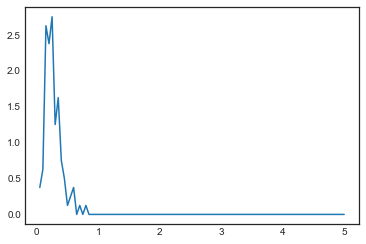

0.0240885416667


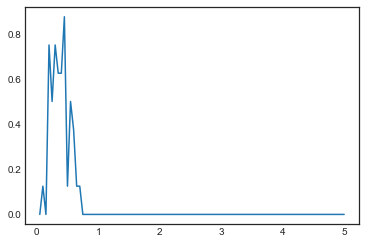

0.00954861111111


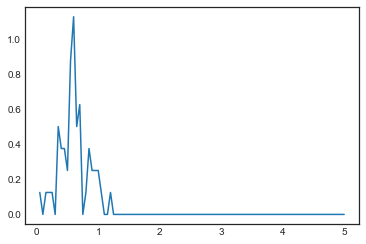

0.0115017361111


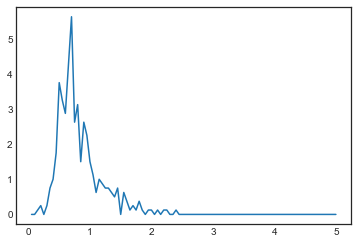

0.08203125


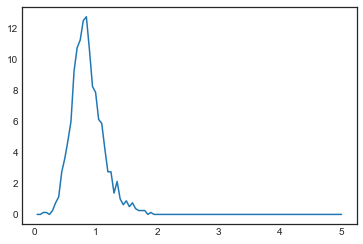

0.230902777778


In [269]:
VF_FRACTION = np.array([0.10, 0.20, 0.30, 0.35, 0.45]);
TEMPERATURES = [0.025, 0.075, 0.125, 0.175];
omega = np.array([0.020, 0.040, 0.060, 0.080]);

num_random = 8.0;
num_fraction = 5.0;
num_temps = 4.0;
size = omega.size;
num_omega = 4.0;

bins = np.linspace(0.0, 5.0, 101);

for fraction in range(int(num_fraction)):
    
    para_temps = np.zeros([int(num_temps), 1152]);
    hist_resist = np.zeros([100]);
    
    for random in range(int(num_random)):
        
        bonds_resist = np.zeros([1152]);
        
        for temps in range(int(num_temps)):
            hdulist = pyfits.open('DisHB_24_U=3_V=2.25_temp' + str(TEMPERATURES[temps]) + '_0_00%02.0d.fits' %(fraction*int(num_random) + random))
            bonds = np.array( hdulist['HoppingBonds'].data);
            str_idx = len(hdulist)-4;
            
            ### Average over all low frequency conductivities ###
            for i in range(int(num_omega)):
                para_susc = np.array(hdulist[str_idx + i].data);
                para_xx = bonds['DisplacementX'] * ((np.imag(para_susc['ParamagneticSusceptibilityXUp'])) + np.imag((para_susc['ParamagneticSusceptibilityXDn']))) / hdulist[str_idx+i].header['HIERARCH PIPELINE CGS OMEGA']
                para_temps[temps] += para_xx;
            
            para_temps[temps] = para_temps[temps] / num_omega;
            if temps > 0.0:
                bonds_resist += para_temps[temps] - para_temps[temps-1];
                
        hist, bins = np.histogram(np.abs(para_temps[0][np.where(bonds_resist<0.0)])*1152/2.0, bins=bins)
        hist_resist += hist;
    
    plt.plot((bins[1::]), hist_resist/8.0);
    plt.show();
    print ((np.sum(hist_resist)/8.0) / 576);
    

In [250]:
hdulist = pyfits.open('DisHB_24_const_temp0.175_0_0028.fits');
str_idx = len(hdulist)-8;
bonds = np.array( hdulist['HoppingBonds'].data);
para_susc = np.array(hdulist[str_idx].data);
para_xx = bonds['DisplacementX'] * ((np.imag(para_susc['ParamagneticSusceptibilityXUp'])) + np.imag((para_susc['ParamagneticSusceptibilityXDn']))) / hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA']


hdulist2 = pyfits.open('DisHB_24_const_temp0.20_0_0028.fits');
bonds = np.array( hdulist2['HoppingBonds'].data);
para_susc = np.array(hdulist2[str_idx].data);
para_xx2 = bonds['DisplacementX'] * ((np.imag(para_susc['ParamagneticSusceptibilityXUp'])) + np.imag((para_susc['ParamagneticSusceptibilityXDn']))) / hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA']



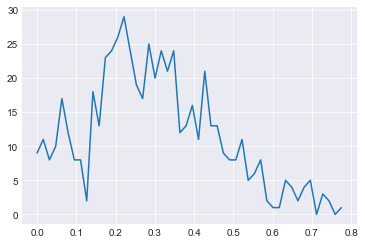

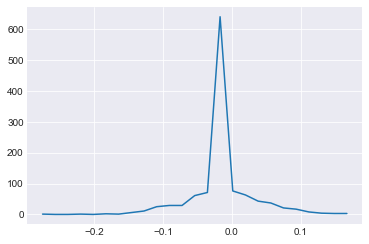

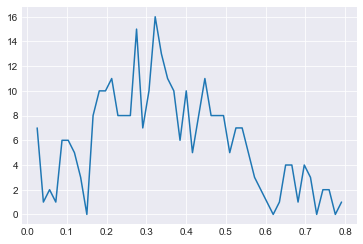

0.506944444444


In [251]:
hist, bins = np.histogram(np.abs(para_xx * 1152/2.), bins=50);
hist2, bins2 = np.histogram(np.abs(para_xx2 * 1152/2.), bins=50);

y_bonds = np.zeros_like(hist);
y_bonds[0] = -1152/2.0

diff = para_xx2*1152/2.0 - para_xx*1152/2.0

hist3, bins3 = np.histogram(diff, bins=25);

hist4, bins4 = np.histogram(np.abs(para_xx[np.where(diff<0.0)])*1152/2.0, bins=50)

plt.plot((bins[:-1]), (hist + y_bonds))
plt.show()
#plt.plot((bins2[1::]), hist2 / 1152.)
plt.plot((bins3[:-1]), hist3)
plt.show();
plt.plot((bins4[1::]), hist4)
plt.show();
print sum(hist4 * 2.0 / 1152)
#plt.semilogx();
#plt.ylim(-0.1, 0.1)

In [184]:
y_bonds[0] = 1.0/5

In [42]:
cd /Users/Sazbo/Desktop/DisHB_disint_Cond/resistivity/

/Users/Sazbo/Desktop/DisHB_disint_Cond/resistivity


0.00138888888889
0.00416666666667
0.146527777778
0.222569444444
0.297916666667


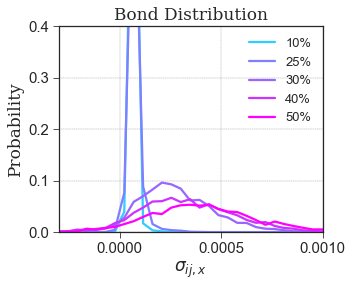

In [44]:
VF_FRACTION = np.array([0.10, 0.25, 0.30, 0.40, 0.50]);
TEMPERATURES = [0.075, 0.125, 0.175];
omega = np.array([0.020, 0.040, 0.060, 0.080]);

num_random = 5.0;
num_fraction = 5.0;
num_temps = 3.0;
size = omega.size;
num_omega = 4.0;

bins = np.linspace(-1.0, 3.0, 151);

plt.rcParams.update({'font.size': 12})
sns.set_style('ticks')

SMALL_SIZE = 15
MEDIUM_SIZE = 12
BIGGER_SIZE = 13

title_font = {'fontname':'sans-serif', 'size':'12', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'serif', 'size':'16'}
axis_font_y = {'fontname':'sans-serif', 'size':'15'}

plt.rcParams.update({'font.size': 15})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

columnwidth = 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.0, hf=0.8))

cmap = plt.cm.cool 
cNorm  = colors.Normalize(0.0, 0.5)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)


for fraction in range(int(num_fraction)):
    
    para_temps = np.zeros([int(num_temps), 1152]);
    hist_resist = np.zeros([150]);
    hist_resist2 = np.zeros([150]);
    colorVal = scalarMap.to_rgba(VF_FRACTION[fraction])
    
    for random in range(int(num_random)):
        
        bonds_resist = np.zeros([1152]);
        
        for temps in range(int(num_temps)):
            hdulist = pyfits.open('DisHB_24_const_temp' + str(TEMPERATURES[temps]) + '_0_00%02.0d.fits' %(fraction*int(num_random) + random))
            bonds = np.array( hdulist['HoppingBonds'].data);
            str_idx = len(hdulist)-8;
            
            ### Average over all low frequency conductivities ###
            for i in range(int(num_omega)):
                para_susc = np.array(hdulist[str_idx + i].data);
                para_xx = bonds['DisplacementX'] * ((np.imag(para_susc['ParamagneticSusceptibilityXUp'])) + np.imag((para_susc['ParamagneticSusceptibilityXDn']))) / hdulist[str_idx+i].header['HIERARCH PIPELINE CGS OMEGA']
                para_temps[temps] += para_xx;
            
            para_temps[temps] = para_temps[temps] / num_omega;
            if temps > 0.0:
                bonds_resist += para_temps[temps] - para_temps[temps-1];
                
        hist, bins = np.histogram(para_temps[0][np.where(bonds_resist>0.0)]*1152/2.0, bins=bins)
        hist2, bins = np.histogram(para_temps[0][np.where(bonds_resist<0.0)]*1152/2.0, bins=bins)
        hist_resist += hist;
        hist_resist2 += hist2;
    
    plt.plot((bins[1::]) / (1152/2.0), hist_resist/5.0 / 576, label = '%1.0d%%' %(VF_FRACTION[fraction]*100), color=colorVal, linewidth = 2.25);
    #plt.plot((bins[1::]), hist_resist2/5.0);
    #plt.plot((bins[1::]), hist_resist/5.0 + hist_resist2/5.0);
    print ((np.sum(hist_resist2)/5.0) / 576);
    
plt.xlim(-0.0003, 0.001)
plt.ylim(0.0, 0.45)
plt.legend();
plt.xlabel(r"$\sigma_{ij,x}$", **axis_font_x)
plt.ylabel('Probability', **axis_font_x)
plt.title('Longi', **axis_font_x)
plt.grid(color='grey', linestyle='--', linewidth=0.35);
plt.savefig('/Users/Sazbo/Desktop/mm19/sigma_dist.pdf', bbox_inches = 'tight')
plt.show();

In [59]:
cd /Volumes/Balrog/Resist_30/

/Volumes/Balrog/Resist_30


In [46]:
hdulist = pyfits.open('DisHB_disint_30_T=0.005_0_004.fits');

1.0
1.0
0.999555555556
0.999277777778


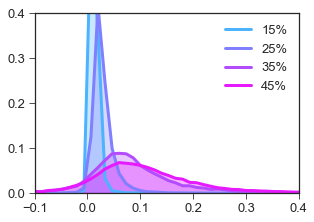

In [61]:
VF_FRACTION = np.array([0.15, 0.25, 0.35, 0.45]);

num_fraction = 5.0;
num_omega = 2.0;

direct = '.';

bins = np.linspace(-0.5, 1.5, 151);

plt.rcParams.update({'font.size': 12})
sns.set_style('ticks')

SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 13

title_font = {'fontname':'sans-serif', 'size':'12', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'serif', 'size':'20'}
axis_font_y = {'fontname':'sans-serif', 'size':'22'}

plt.rcParams.update({'font.size': 15})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

columnwidth = 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.0, hf=0.7))

cmap = plt.cm.cool 
cNorm  = colors.Normalize(0.0, 0.5)
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)


for fraction in VF_FRACTION:
    
    count = 0;
    para_temps = np.zeros([1800]);
    hist_resist = np.zeros([150]);
    colorVal = scalarMap.to_rgba(fraction)
            
    for files in glob.iglob(direct + '/DisHB_disint_30_T=0.005_0_*.fits'):
            hdulist = pyfits.open(files);
            file_frac = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
            if (file_frac == fraction):
                bonds = np.array( hdulist['HoppingBonds'].data);
                str_idx = len(hdulist)-2;
            
            ### Average over all low frequency conductivities ###
                for i in range(int(num_omega)):
                    para_susc = np.array(hdulist[str_idx + i].data);
                    para_xx = bonds['DisplacementX'] * ((np.imag(para_susc['ParamagneticSusceptibilityXUp'])) + np.imag((para_susc['ParamagneticSusceptibilityXDn']))) / hdulist[str_idx+i].header['HIERARCH PIPELINE CGS OMEGA']
                    para_yy = bonds['DisplacementY'] * ((np.imag(para_susc['ParamagneticSusceptibilityYUp'])) + np.imag((para_susc['ParamagneticSusceptibilityYDn']))) / hdulist[str_idx+i].header['HIERARCH PIPELINE CGS OMEGA']
                    para_temps += para_xx + para_yy;
            
                para_temps = para_temps / num_omega;
                
                hist, bins = np.histogram(para_temps*1000, bins=bins)
                #hist, bins = np.histogram(para_temps[np.where(np.abs(bonds['DisplacementX'])>0.0)]*1800, bins=bins)
                hist_resist += hist;
                count += 1;
    
    plt.plot((bins[1::]) / (1), hist_resist/count / 1800, label = '%1.0d%%' %(fraction*100), color=colorVal, linewidth = 3.0);
    plt.fill_between((bins[1::]), hist_resist/count / 1800, color=colorVal, alpha=0.3)
    #plt.plot((bins[1::]), hist_resist2/5.0);
    #plt.plot((bins[1::]), hist_resist/5.0 + hist_resist2/5.0);
    print ((np.sum(hist_resist)/count) / 1800);
    
plt.xlim(-0.10, 0.4)
plt.ylim(0.0, 0.4)
plt.legend();
#plt.xlabel(r"$\sigma^{\mu\mu}_{ij}$", **axis_font_y)
#plt.ylabel('Probability', **axis_font_x)
#plt.title('Local Cond.', **axis_font_x)
#plt.grid(color='grey', linestyle='--', linewidth=0.35);
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/mag_dist.pdf', bbox_inches = 'tight')
plt.show();

In [109]:
cd /Users/Sazbo/Desktop/Trivedi_Group/Data/

/Users/Sazbo/Desktop/Trivedi_Group/Data


./DisHB_dis_30_T=0.005_0__0_000.fits
0.03
2510 2490


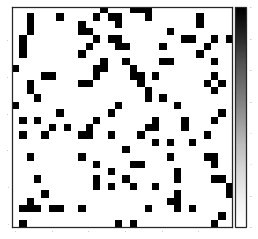

In [119]:
VF_FRACTION = np.array([0.15])
SEEDS = np.array([1256, 6886, 7543, 1029, 3985, 8567, 1065, 2567, 9727, 3232])
omega = 0.03;
sns.set_style('white');
cutoff = 0.0;

scale = 0.5;
direct = '.';

axis_font_x = {'fontname':'Times New Roman', 'size':'24'}
axis_font_y = {'fontname':'Times New Roman', 'size':'24'}


SMALL_SIZE = scale * 0
MEDIUM_SIZE = scale * 0
BIGGER_SIZE = scale * 50

title_font = {'fontname':'sans-serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

plt.rcParams.update({'font.size': 30})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

for fraction in VF_FRACTION:
    for files in glob.iglob(direct + '/DisHB_dis_30*.fits'):
        hdulist = pyfits.open(files);
        dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        
        seed = hdulist[0].header["HIERARCH HUBBARD MODEL V RANDOM SEED"];
        
        str_idx = len(hdulist)-2;
    
        if (fraction == dis_fraction) & (seed == SEEDS[1]):
            print files
            para_susc = np.array(hdulist[str_idx].data);
            density_of_states = np.array(hdulist['DOS_0'].data)
            idx_positive = np.argmin( np.abs( density_of_states['omega'] - omega ) );
            idx_negative = np.argmin( np.abs( density_of_states['omega'] + omega ) );
            bonds = np.array( hdulist['HoppingBonds'].data );
            print hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'];
            print idx_positive, idx_negative
            
            if hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'] == omega:
                f, ax1 = plt.subplots(1, 1, figsize=get_figsize(columnwidth, wf=1.0, hf=0.85));
                sites = np.array( hdulist['LatticeSiteOrdering'].data )
                para_xx = 1./omega * np.abs(bonds['DisplacementX']) * ((para_susc['ParamagneticSusceptibilityXUp']) + (para_susc['ParamagneticSusceptibilityXDn'])) / 2.
                para_yy = 1./omega * np.abs(bonds['DisplacementY']) * ((para_susc['ParamagneticSusceptibilityYUp']) + (para_susc['ParamagneticSusceptibilityYDn'])) / 2.
                
                #zg = hdulist['LDOS_0'].data[idx_positive,:,::-1] + hdulist['LDOS_0'].data[idx_negative,:,::-1] + hdulist['LDOS_1'].data[idx_positive + 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative + 1,:,::-1] + hdulist['LDOS_1'].data[idx_positive - 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative - 1,:,::-1];
                dm = np.array( hdulist["OnSiteImpurityPotential"].data )
                spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
                spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
                occupation = spin_up_map + spin_dn_map;
                
                magn = spin_up_map - spin_dn_map;
                anti_ferro = make_antiFerro(30);
                magn_m = np.multiply(magn, anti_ferro);
                
                sigma_y = 0.0;
                sigma_x = 0.0;
                sigma = [sigma_y, sigma_x]
                magn_smooth = sp.ndimage.filters.gaussian_filter(dm, sigma, mode='wrap')
                #mag = np.sqrt(mag_grad[0]**2 + mag_grad[1]**2)
                
                #mag_grad = np.gradient(magn_smooth)
                #xgrad = mag_grad[0]
                #x, y = range(0, 28), range(0,28)
                #xi, yi = np.meshgrid(x, y)
                
                #cmap_reversed = matplotlib.cm.get_cmap('autumn_r')
                #print np.max(magn_m)
                
                #im1 = ax1.imshow(magn_smooth, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5], norm=colors.Normalize(vmin=-0.7, vmax=0.7),  cmap='RdYlBu')
                im1 = ax1.imshow(magn_smooth, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5],  cmap='Greys')
                #im1 = ax1.imshow(occupation, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5], norm=colors.Normalize(vmin=0.2, vmax=1.8), cmap='terrain')
                divider = make_axes_locatable(ax1)
                cax = divider.append_axes('right', size='5%', pad=0.05)
                f.colorbar(im1, cax=cax, orientation='vertical')

                
                
                ax1.set_xlim(-0.5, 29.5);
                ax1.set_ylim(-0.5, 29.5);
                #ax1.set_title('%1.0f %%' % (fraction*100), **axis_font_y);
                #ax1.set_title(r'$\langle m_i^\dagger \rangle$ +  ' w/ ' + r'$\sigma^{\mu\mu}_{ij}$'', **axis_font_y);
                #ax1.set_title('15% Disorder: ' + r'$V_i$' +  ' w/ ' + r'$\sigma^{\mu\mu}_{ij}$', **axis_font_y);
                #ax1.set_ylabel(r'$U=0t$               ', rotation=0, **axis_font_y)
                #ax1.set_xlabel(r'$\langle m_i^\dagger \rangle$' +  '  w/  ' + r'$\sigma_{ij, x}$', **axis_font_y)
                #ax1.set_title(r'$\langle S_z^{-(x + y)} \rangle$', **axis_font_y);
                #ax2.set_xlim(-0.5, 27.5);
                #ax2.set_ylim(-0.5, 27.5);
                #ax2.set_title('$\sigma_{ij:y}$');
                f.tight_layout()
                f.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/dis_35.pdf', bbox_inches = 'tight')
                f.show()
                break;

./DisHB_dis_30_T=0.005_0__0_002.fits
0.01
2503 2497
(0.0024162717613304321, 1.3450863118063911e-07, 0.0016629731246528357, 6.0978229893880528e-08)


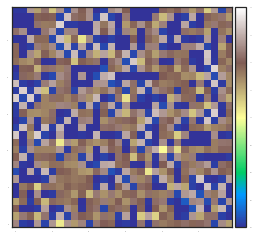

In [110]:
VF_FRACTION = np.array([0.35])
SEEDS = np.array([1256, 6886, 7543, 1029, 3985, 8567, 1065, 2567, 9727, 3232])
omega = 0.01;
sns.set_style('white');
cutoff = 0.0;

scale = 0.5;
direct = '.';

axis_font_x = {'fontname':'Times New Roman', 'size':'24'}
axis_font_y = {'fontname':'Times New Roman', 'size':'24'}


SMALL_SIZE = scale * 0
MEDIUM_SIZE = scale * 0
BIGGER_SIZE = scale * 50

title_font = {'fontname':'sans-serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

plt.rcParams.update({'font.size': 30})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

for fraction in VF_FRACTION:
    for files in glob.iglob(direct + '/DisHB_dis_30*.fits'):
        hdulist = pyfits.open(files);
        dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        
        seed = hdulist[0].header["HIERARCH HUBBARD MODEL V RANDOM SEED"];
        
        str_idx = len(hdulist)-2;
    
        if (fraction == dis_fraction) & (seed == SEEDS[1]):
            print files
            para_susc = np.array(hdulist[str_idx].data);
            density_of_states = np.array(hdulist['DOS_0'].data)
            idx_positive = np.argmin( np.abs( density_of_states['omega'] - omega ) );
            idx_negative = np.argmin( np.abs( density_of_states['omega'] + omega ) );
            bonds = np.array( hdulist['HoppingBonds'].data );
            print hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'];
            print idx_positive, idx_negative
            
            if hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'] == omega:
                f, ax1 = plt.subplots(1, 1, figsize=get_figsize(columnwidth, wf=1.0, hf=0.85));
                sites = np.array( hdulist['LatticeSiteOrdering'].data )
                para_xx = 1./omega * np.abs(bonds['DisplacementX']) * ((para_susc['ParamagneticSusceptibilityXUp']) + (para_susc['ParamagneticSusceptibilityXDn'])) / 2.
                para_yy = 1./omega * np.abs(bonds['DisplacementY']) * ((para_susc['ParamagneticSusceptibilityYUp']) + (para_susc['ParamagneticSusceptibilityYDn'])) / 2.
                
                #zg = hdulist['LDOS_0'].data[idx_positive,:,::-1] + hdulist['LDOS_0'].data[idx_negative,:,::-1] + hdulist['LDOS_1'].data[idx_positive + 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative + 1,:,::-1] + hdulist['LDOS_1'].data[idx_positive - 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative - 1,:,::-1];
                dm = np.array( hdulist["OnSiteImpurityPotential"].data )
                spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
                spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
                occupation = spin_up_map + spin_dn_map;
                
                magn = spin_up_map - spin_dn_map;
                anti_ferro = make_antiFerro(30);
                magn_m = np.multiply(magn, anti_ferro);
                
                sigma_y = 0.0;
                sigma_x = 0.0;
                sigma = [sigma_y, sigma_x]
                magn_smooth = sp.ndimage.filters.gaussian_filter(dm, sigma, mode='wrap')
                #mag = np.sqrt(mag_grad[0]**2 + mag_grad[1]**2)
                
                #mag_grad = np.gradient(magn_smooth)
                #xgrad = mag_grad[0]
                #x, y = range(0, 28), range(0,28)
                #xi, yi = np.meshgrid(x, y)
                
                #cmap_reversed = matplotlib.cm.get_cmap('autumn_r')
                #print np.max(magn_m)
                
                #im1 = ax1.imshow(magn_smooth, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5], norm=colors.Normalize(vmin=-0.7, vmax=0.7),  cmap='RdYlBu')
                #im1 = ax1.imshow(magn_smooth, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5],  cmap='Greys')
                im1 = ax1.imshow(occupation, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5], norm=colors.Normalize(vmin=0.2, vmax=1.8), cmap='terrain')
                divider = make_axes_locatable(ax1)
                cax = divider.append_axes('right', size='5%', pad=0.05)
                f.colorbar(im1, cax=cax, orientation='vertical')

                
                #im2 = ax2.imshow(occupation, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], norm=colors.Normalize(vmin=0.4, vmax=1.6), cmap='terrain')
                #divider = make_axes_locatable(ax2)
                #cax = divider.append_axes('right', size='5%', pad=0.05)
                #f.colorbar(im2, cax=cax, orientation='vertical')
                
                maxchi_x = np.max(np.abs(np.imag(para_xx)));
                maxchi_y = np.max(np.abs(np.imag(para_yy)));
                
                med_x = np.median(np.abs(np.imag(para_xx)));
                med_y = np.median(np.abs(np.imag(para_yy)));
                
                print(maxchi_x, med_x, maxchi_y, med_y)
                
                #maxchi_x = 0.010;
                #maxchi_y = 0.010;
                
                #print maxchi_x, maxchi_y;
                
                for b, chix, chiy in zip(bonds, para_xx, para_yy):
                    rowsite = b[0]-1
                    colsite = b[1]-1
                    vec = np.array([b[3], b[4]])
                    
                    #################################
                    rowsite_coord = np.array([sites[rowsite]['b1'], sites[rowsite]['b2']])
                    colsite_coord = rowsite_coord + vec

                    imag_chix = np.imag(chix)
                    magnitudex = np.abs(np.imag(chix)) / maxchi_x

                    if imag_chix < 0:
                        rowsite_coord, colsite_coord = colsite_coord, rowsite_coord

                    arrow_start = rowsite_coord * 0.1 + colsite_coord * 0.9
                    arrow_direction = 0.8 * (colsite_coord - rowsite_coord)
                    
                    if magnitudex < 0.2:
                        magnitudex = 0.0;
                    
                    if imag_chix < 0:
                        ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                            head_width=0,
                            head_length=0,
                            linewidth = (magnitudex * 0),
                            fc='r',
                            ec='r')
                    else:
                        ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                            head_width=0,
                            head_length=0,
                            linewidth = (magnitudex * 0),
                            fc='r',
                            ec='r')
                    #linewidth= 800 * magnitudex**1.25
                    #linewidth = 20000 * magnitudex**2.0
                    ################################
                    rowsite_coord = np.array([sites[rowsite]['b1'], sites[rowsite]['b2']])
                    colsite_coord = rowsite_coord + vec
            
                    imag_chiy = np.imag(chiy)
                    magnitudey = np.abs(np.imag(chiy)) / maxchi_y
                    
                    if imag_chiy * b[4] < 0:
                        rowsite_coord, colsite_coord = colsite_coord, rowsite_coord

                    arrow_start = rowsite_coord * 0.1 + colsite_coord * 0.9
                    arrow_direction = 0.8 * (colsite_coord - rowsite_coord)
                    
                    if magnitudey < 0.2:
                        magnitudey = 0.0;
                    
                    if imag_chiy < 0:
                        ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                            head_width=0,
                            head_length=0,
                            linewidth = (magnitudey * 0),
                            fc='r',
                            ec='r')
                    else:
                        ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                            head_width=0,
                            head_length=0,
                            linewidth = (magnitudey * 0),
                            fc='r',
                            ec='r')
                
                ax1.set_xlim(-0.5, 29.5);
                ax1.set_ylim(-0.5, 29.5);
                #ax1.set_title('%1.0f %%' % (fraction*100), **axis_font_y);
                #ax1.set_title(r'$\langle m_i^\dagger \rangle$ +  ' w/ ' + r'$\sigma^{\mu\mu}_{ij}$'', **axis_font_y);
                #ax1.set_title('15% Disorder: ' + r'$V_i$' +  ' w/ ' + r'$\sigma^{\mu\mu}_{ij}$', **axis_font_y);
                #ax1.set_ylabel(r'$U=0t$               ', rotation=0, **axis_font_y)
                #ax1.set_xlabel(r'$\langle m_i^\dagger \rangle$' +  '  w/  ' + r'$\sigma_{ij, x}$', **axis_font_y)
                #ax1.set_title(r'$\langle S_z^{-(x + y)} \rangle$', **axis_font_y);
                #ax2.set_xlim(-0.5, 27.5);
                #ax2.set_ylim(-0.5, 27.5);
                #ax2.set_title('$\sigma_{ij:y}$');
                f.tight_layout()
                f.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/dis_35.pdf', bbox_inches = 'tight')
                f.show()
                break;

In [120]:
cd /Volumes/Balrog/Resist_Vari/

/Volumes/Balrog/Resist_Vari


./DisHB_disint_30_T=0.005_0_023.fits
0.01
2503 2497
0.643132764489


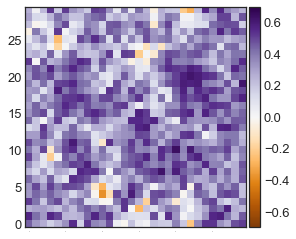

In [126]:
VF_FRACTION = np.array([0.35])
SEEDS = np.array([1256, 6886, 7543, 1029, 3985, 8567, 1065, 2567, 9727, 3232])
omega = 0.01;
sns.set_style('white');
cutoff = 0.0;

scale = 0.5
direct = '.'

axis_font_x = {'fontname':'Times New Roman', 'size':'22'}
axis_font_y = {'fontname':'Times New Roman', 'size':'22'}


SMALL_SIZE = scale * 0
MEDIUM_SIZE = scale * 26
BIGGER_SIZE = scale * 50

title_font = {'fontname':'sans-serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

plt.rcParams.update({'font.size': 30})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

for fraction in VF_FRACTION:
    for files in glob.iglob(direct + '/DisHB_disint_30_T=0.005_0_*.fits'):
        hdulist = pyfits.open(files);
        dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        
        seed = hdulist[0].header["HIERARCH HUBBARD MODEL V RANDOM SEED"];
        
        str_idx = len(hdulist)-2;
    
        if (fraction == dis_fraction) & (seed == SEEDS[1]):
            print files
            para_susc = np.array(hdulist[str_idx].data);
            density_of_states = np.array(hdulist['DOS_0'].data)
            idx_positive = np.argmin( np.abs( density_of_states['omega'] - omega ) );
            idx_negative = np.argmin( np.abs( density_of_states['omega'] + omega ) );
            bonds = np.array( hdulist['HoppingBonds'].data );
            print hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'];
            print idx_positive, idx_negative
            
            if hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'] == omega:
                f, ax1 = plt.subplots(1, 1, figsize=get_figsize(columnwidth, wf=1.0, hf=0.85));
                sites = np.array( hdulist['LatticeSiteOrdering'].data )
                para_xx = 100 * np.abs(bonds['DisplacementX']) * ((para_susc['ParamagneticSusceptibilityXUp']) + (para_susc['ParamagneticSusceptibilityXDn'])) / 2.
                para_yy = 100 * np.abs(bonds['DisplacementY']) * ((para_susc['ParamagneticSusceptibilityYUp']) + (para_susc['ParamagneticSusceptibilityYDn'])) / 2.
                
                #zg = hdulist['LDOS_0'].data[idx_positive,:,::-1] + hdulist['LDOS_0'].data[idx_negative,:,::-1] + hdulist['LDOS_1'].data[idx_positive + 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative + 1,:,::-1] + hdulist['LDOS_1'].data[idx_positive - 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative - 1,:,::-1];
                dm = np.array( hdulist["OnSiteImpurityPotential"].data )
                spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
                spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
                occupation = spin_up_map + spin_dn_map;
                
                magn = spin_up_map - spin_dn_map;
                anti_ferro = make_antiFerro(30);
                magn_m = np.multiply(magn, anti_ferro);
                
                sigma_y = 0.0;
                sigma_x = 0.0;
                sigma = [sigma_y, sigma_x]
                magn_smooth = sp.ndimage.filters.gaussian_filter(magn_m, sigma, mode='wrap')
                #mag = np.sqrt(mag_grad[0]**2 + mag_grad[1]**2)
                
                #mag_grad = np.gradient(magn_smooth)
                #xgrad = mag_grad[0]
                #x, y = range(0, 28), range(0,28)
                #xi, yi = np.meshgrid(x, y)
                
                #cmap_reversed = matplotlib.cm.get_cmap('autumn_r')
                print np.max(magn_m)
                
                im1 = ax1.imshow(magn_m, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5], norm=colors.Normalize(vmin=-0.7, vmax=0.7),  cmap='PuOr')
                #im1 = ax1.imshow(dm, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5],  cmap='Greys')
                #im1 = ax1.imshow(occupation, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5], norm=colors.Normalize(vmin=0.2, vmax=1.8), cmap='terrain')
                divider = make_axes_locatable(ax1)
                cax = divider.append_axes('right', size='5%', pad=0.05)
                f.colorbar(im1, cax=cax, orientation='vertical')

                                #divider = make_axes_locatable(ax2)
                #cax = divider.append_axes('right', size='5%', pad=0.05)
                #f.colorbar(im2, cax=cax, orientation='vertical')
                
                ax1.set_xlim(-0.5, 29.5);
                ax1.set_ylim(-0.5, 29.5);
                #ax1.set_title('%1.0f %%' % (fraction*100), **axis_font_y);
                #ax1.set_title(r'$\langle m_i^\dagger \rangle$', **axis_font_y);
                #ax1.set_title('35% Disorder: ' + r'$\langle m_i^\dagger \rangle$' +  ' w/ ' + r'$\sigma^{\mu\mu}_{ij}$', **axis_font_y);
                #ax1.set_ylabel(r'$U=4t$               ', rotation=0, **axis_font_y)
                #ax1.set_xlabel(r'$\langle m_i^\dagger \rangle$' +  '  w/  ' + r'$\sigma_{ij, x}$', **axis_font_y)
                #ax1.set_title(r'$\langle S_z^{-(x + y)} \rangle$', **axis_font_y);
                #ax2.set_xlim(-0.5, 27.5);
                #ax2.set_ylim(-0.5, 27.5);
                #ax2.set_title('$\sigma_{ij:y}$');
                f.tight_layout()
                f.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/mag_35.pdf', bbox_inches = 'tight')
                f.show()
                break;

./DisHB_disint_30_T=0.005_0_003.fits
0.01
2503 2497
0.689019791427
9.93703382758e-05 0.000105436474101


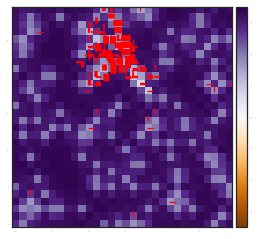

In [107]:
VF_FRACTION = np.array([0.15])
SEEDS = np.array([1256, 6886, 7543, 1029, 3985, 8567, 1065, 2567, 9727, 3232])
omega = 0.01;
sns.set_style('white');
cutoff = 0.0;

scale = 0.5
direct = '.'

axis_font_x = {'fontname':'Times New Roman', 'size':'22'}
axis_font_y = {'fontname':'Times New Roman', 'size':'22'}


SMALL_SIZE = scale * 0
MEDIUM_SIZE = scale * 0
BIGGER_SIZE = scale * 50

title_font = {'fontname':'sans-serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

plt.rcParams.update({'font.size': 30})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

for fraction in VF_FRACTION:
    for files in glob.iglob(direct + '/DisHB_disint_30_T=0.005_0_*.fits'):
        hdulist = pyfits.open(files);
        dis_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        
        seed = hdulist[0].header["HIERARCH HUBBARD MODEL V RANDOM SEED"];
        
        str_idx = len(hdulist)-2;
    
        if (fraction == dis_fraction) & (seed == SEEDS[1]):
            print files
            para_susc = np.array(hdulist[str_idx].data);
            density_of_states = np.array(hdulist['DOS_0'].data)
            idx_positive = np.argmin( np.abs( density_of_states['omega'] - omega ) );
            idx_negative = np.argmin( np.abs( density_of_states['omega'] + omega ) );
            bonds = np.array( hdulist['HoppingBonds'].data );
            print hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'];
            print idx_positive, idx_negative
            
            if hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA'] == omega:
                f, ax1 = plt.subplots(1, 1, figsize=get_figsize(columnwidth, wf=1.0, hf=0.85));
                sites = np.array( hdulist['LatticeSiteOrdering'].data )
                para_xx = 100 * np.abs(bonds['DisplacementX']) * ((para_susc['ParamagneticSusceptibilityXUp']) + (para_susc['ParamagneticSusceptibilityXDn'])) / 2.
                para_yy = 100 * np.abs(bonds['DisplacementY']) * ((para_susc['ParamagneticSusceptibilityYUp']) + (para_susc['ParamagneticSusceptibilityYDn'])) / 2.
                
                #zg = hdulist['LDOS_0'].data[idx_positive,:,::-1] + hdulist['LDOS_0'].data[idx_negative,:,::-1] + hdulist['LDOS_1'].data[idx_positive + 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative + 1,:,::-1] + hdulist['LDOS_1'].data[idx_positive - 1,:,::-1] + hdulist['LDOS_1'].data[idx_negative - 1,:,::-1];
                dm = np.array( hdulist["OnSiteImpurityPotential"].data )
                spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
                spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
                occupation = spin_up_map + spin_dn_map;
                
                magn = spin_up_map - spin_dn_map;
                anti_ferro = make_antiFerro(30);
                magn_m = np.multiply(magn, anti_ferro);
                
                sigma_y = 0.0;
                sigma_x = 0.0;
                sigma = [sigma_y, sigma_x]
                magn_smooth = sp.ndimage.filters.gaussian_filter(magn_m, sigma, mode='wrap')
                #mag = np.sqrt(mag_grad[0]**2 + mag_grad[1]**2)
                
                #mag_grad = np.gradient(magn_smooth)
                #xgrad = mag_grad[0]
                #x, y = range(0, 28), range(0,28)
                #xi, yi = np.meshgrid(x, y)
                
                #cmap_reversed = matplotlib.cm.get_cmap('autumn_r')
                print np.max(magn_m)
                
                im1 = ax1.imshow(magn_m, origin='lower', extent=[-0.5, 29.5, -0.5, 29.5], norm=colors.Normalize(vmin=-0.7, vmax=0.7),  cmap='PuOr')
                #im1 = ax1.imshow(dm, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5],  cmap='Greys')
                divider = make_axes_locatable(ax1)
                cax = divider.append_axes('right', size='5%', pad=0.05)
                f.colorbar(im1, cax=cax, orientation='vertical')

                
                #im2 = ax2.imshow(occupation, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], norm=colors.Normalize(vmin=0.4, vmax=1.6), cmap='terrain')
                #divider = make_axes_locatable(ax2)
                #cax = divider.append_axes('right', size='5%', pad=0.05)
                #f.colorbar(im2, cax=cax, orientation='vertical')
                
                maxchi_x = np.max(np.abs(np.imag(para_xx)));
                maxchi_y = np.max(np.abs(np.imag(para_yy)));
                
                #maxchi_x = 0.0001;
                #maxchi_y = 0.0001;
                
                print maxchi_x, maxchi_y;
                
                for b, chix, chiy in zip(bonds, para_xx, para_yy):
                    rowsite = b[0]-1
                    colsite = b[1]-1
                    vec = np.array([b[3], b[4]])
                    
                    #################################
                    rowsite_coord = np.array([sites[rowsite]['b1'], sites[rowsite]['b2']])
                    colsite_coord = rowsite_coord + vec

                    imag_chix = np.imag(chix)
                    magnitudex = np.abs(np.imag(chix)) / maxchi_x

                    if imag_chix < 0:
                        rowsite_coord, colsite_coord = colsite_coord, rowsite_coord

                    arrow_start = rowsite_coord * 0.1 + colsite_coord * 0.9
                    arrow_direction = 0.8 * (colsite_coord - rowsite_coord)
                    
                    if magnitudex < 0.1:
                        magnitudex = 0.0;
                    
                    if imag_chix * b[3] < 0:
                        ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                            head_width=0,
                            head_length=0,
                            linewidth = (magnitudex * 12),
                            fc='r',
                            ec='r')
                    else:
                        ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                            head_width=0,
                            head_length=0,
                            linewidth = (magnitudex * 12),
                            fc='r',
                            ec='r')
                    #linewidth= 800 * magnitudex**1.25
                    #linewidth = 20000 * magnitudex**2.0
                    ################################
                    rowsite_coord = np.array([sites[rowsite]['b1'], sites[rowsite]['b2']])
                    colsite_coord = rowsite_coord + vec
            
                    imag_chiy = np.imag(chiy)
                    magnitudey = np.abs(np.imag(chiy)) / maxchi_y
                    
                    if imag_chiy * b[4] < 0:
                        rowsite_coord, colsite_coord = colsite_coord, rowsite_coord

                    arrow_start = rowsite_coord * 0.1 + colsite_coord * 0.9
                    arrow_direction = 0.8 * (colsite_coord - rowsite_coord)
                    
                    if magnitudey < 0.1:
                        magnitudey = 0.0;
                    
                    if imag_chiy < 0:
                        ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                            head_width=0,
                            head_length=0,
                            linewidth = (magnitudey * 12),
                            fc='r',
                            ec='r')
                    else:
                        ax1.arrow(arrow_start[0], arrow_start[1], arrow_direction[0], arrow_direction[1],
                            head_width=0,
                            head_length=0,
                            linewidth = (magnitudey * 12),
                            fc='r',
                            ec='r')
                
                ax1.set_xlim(-0.5, 29.5);
                ax1.set_ylim(-0.5, 29.5);
                #ax1.set_title('%1.0f %%' % (fraction*100), **axis_font_y);
                #ax1.set_title(r'$\langle m_i^\dagger \rangle$', **axis_font_y);
                #ax1.set_title('35% Disorder: ' + r'$\langle m_i^\dagger \rangle$' +  ' w/ ' + r'$\sigma^{\mu\mu}_{ij}$', **axis_font_y);
                #ax1.set_ylabel(r'$U=4t$               ', rotation=0, **axis_font_y)
                #ax1.set_xlabel(r'$\langle m_i^\dagger \rangle$' +  '  w/  ' + r'$\sigma_{ij, x}$', **axis_font_y)
                #ax1.set_title(r'$\langle S_z^{-(x + y)} \rangle$', **axis_font_y);
                #ax2.set_xlim(-0.5, 27.5);
                #ax2.set_ylim(-0.5, 27.5);
                #ax2.set_title('$\sigma_{ij:y}$');
                f.tight_layout()
                f.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/mag_35.pdf', bbox_inches = 'tight')
                f.show()
                break;

4.54860727063e-05
6.07983315428e-05
6.49641529439e-05
6.1632243816e-05
6.22734713939e-05


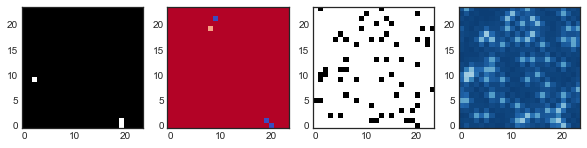

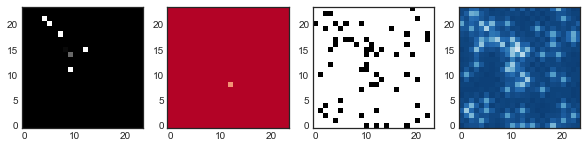

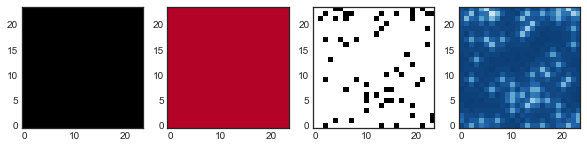

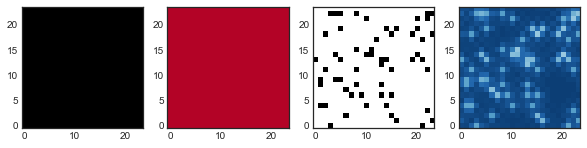

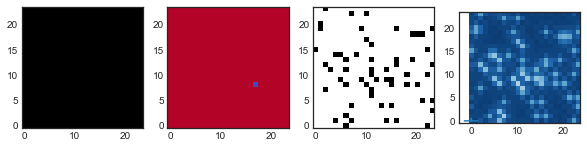

0.00138888888889
4.95540180757e-05
7.02657065103e-05
7.01715777621e-05
6.97941353542e-05
6.78392478534e-05


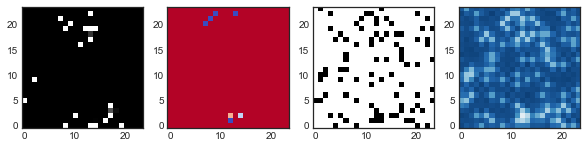

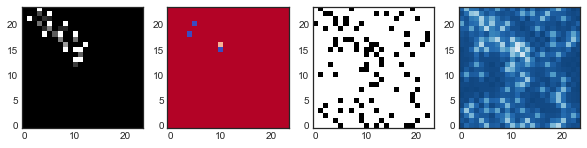

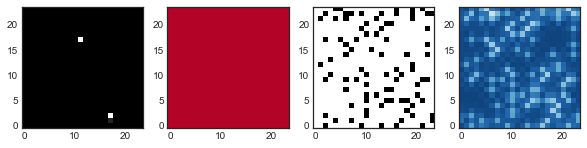

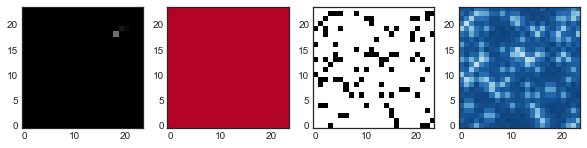

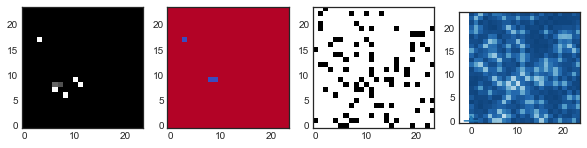

0.00416666666667
1.92876492416e-05
6.42586661178e-05
7.17524404072e-05
7.17094132567e-05
7.22778747924e-05


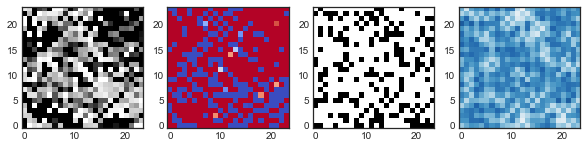

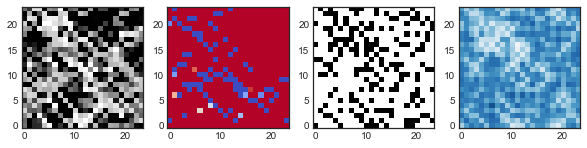

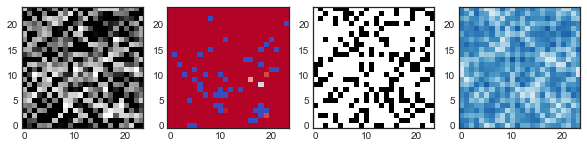

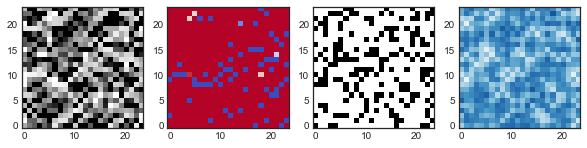

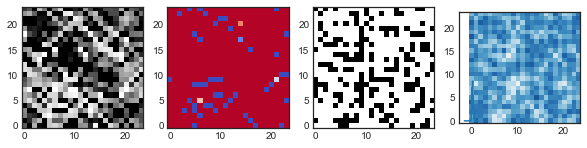

0.146527777778
5.80648036744e-05
9.01858638034e-05
8.38200384932e-05
8.23010188781e-05
4.4757345809e-05


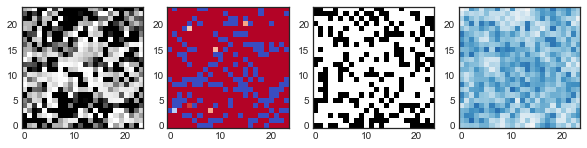

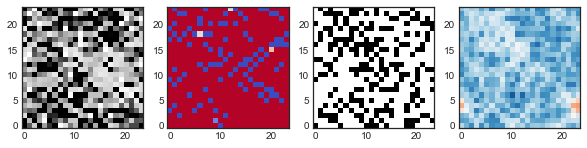

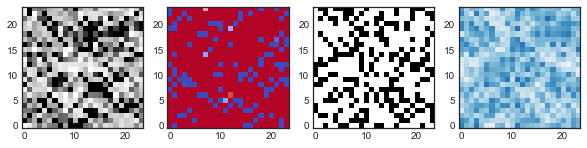

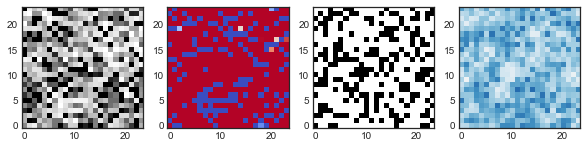

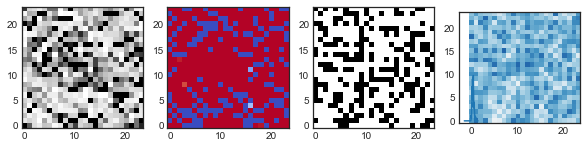

0.222569444444
2.59573805252e-05
5.24246311877e-05
6.04909286547e-05
5.56355746522e-05
4.47794936755e-05


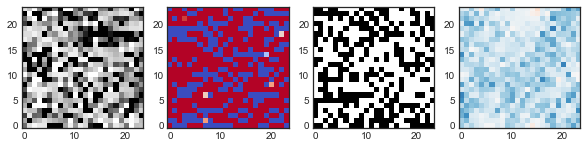

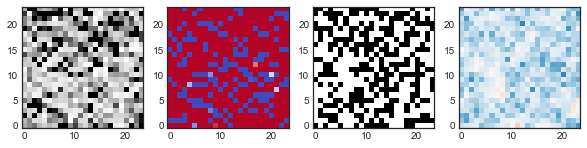

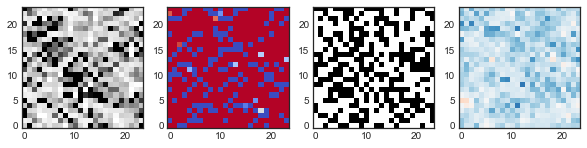

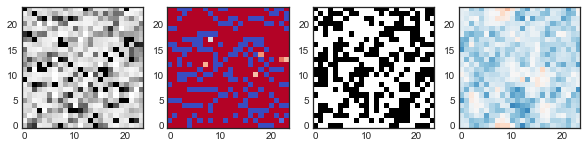

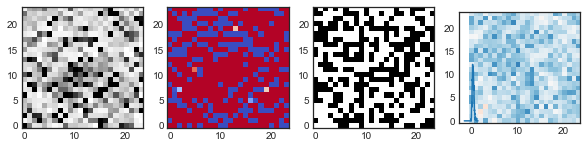

0.297916666667
3.55128983385e-05
4.51059803672e-05
8.06802838601e-05
5.77692168444e-05
4.77277622577e-05


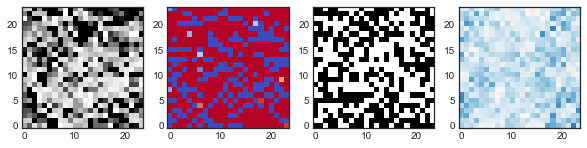

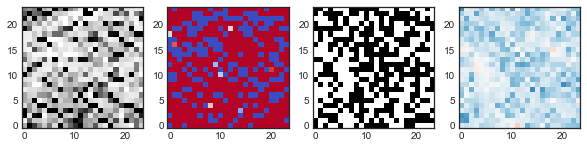

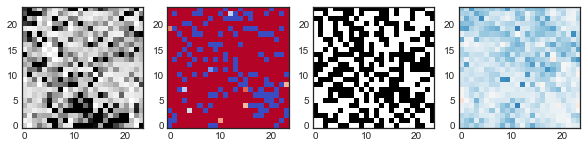

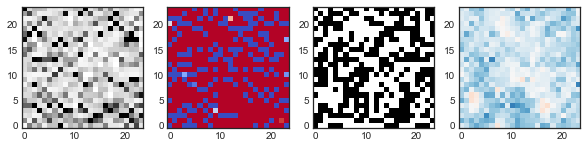

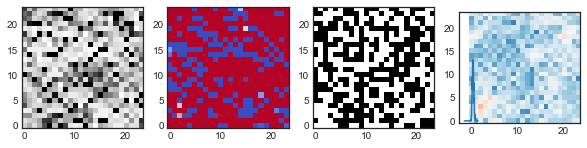

0.290277777778


In [314]:
sns.set_style('white')

VF_FRACTION = np.array([0.10, 0.15, 0.30, 0.35, 0.45, 0.50]);
TEMPERATURES = [0.075, 0.125, 0.175];
omega = np.array([0.020, 0.040, 0.060, 0.080]);

num_random = 5.0;
num_fraction = 6.0;
num_temps = 3.0;
size = omega.size;
num_omega = 4.0;

bins = np.linspace(-1.5, 1.5, 101);
anti_ferro = make_antiFerro(24)

for fraction in range(int(num_fraction)):
    
    para_temps = np.zeros([int(num_temps), 1152]);
    hist_resist = np.zeros([100]);
    
    for random in range(int(num_random)):
        
        bonds_resist = np.zeros([1152]);
        
        for temps in range(int(num_temps)):
            hdulist = pyfits.open('DisHB_24_const_temp' + str(TEMPERATURES[temps]) + '_0_00%02.0d.fits' %(fraction*int(num_random) + random))
            bonds = np.array( hdulist['HoppingBonds'].data);
            xbonds = np.array(np.where(np.abs(bonds['DisplacementX'])>0.0));
            str_idx = len(hdulist)-8;
            
            ### Average over all low frequency conductivities ###
            for i in range(int(num_omega)):
                para_susc = np.array(hdulist[str_idx + i].data);
                para_xx = bonds['DisplacementX'] * ((np.imag(para_susc['ParamagneticSusceptibilityXUp'])) + np.imag((para_susc['ParamagneticSusceptibilityXDn']))) / hdulist[str_idx+i].header['HIERARCH PIPELINE CGS OMEGA']
                para_temps[temps] += para_xx;
            
            para_temps[temps] = para_temps[temps] / num_omega;
            if temps > 0.0:
                bonds_resist += para_temps[temps] - para_temps[temps-1];
                
        hist, bins = np.histogram(para_temps[0][np.where(bonds_resist<0.0)]*1152/2.0, bins=bins)
        #hist, bins = np.histogram(bonds_resist[np.where(np.abs(bonds['DisplacementX'])>0.0)]/1152., bins=bins)
        hist_resist += hist;
        print np.sum(bonds_resist[np.where(np.abs(bonds['DisplacementX'])>0.0)]/1152.)
        
        f, ax = plt.subplots(1, 4, figsize=(10,20));
        xbonds = np.array(np.where(np.abs(bonds['DisplacementX'])>0.0));
        
        bonds_resize = np.zeros([24,24]);
        bonds_para = np.zeros([24,24]);
        bonds_resist = bonds_resist[xbonds];
        para_xx = para_temps[0][xbonds];
        bonds_x = bonds[xbonds]
        #print "BOND COND:"
        #print (np.max(bonds_resist) * 1152/2.0, np.min(bonds_resist) * 1152/2.0)
        #print "PARA SUSC:"
        #print (np.max(para_xx), np.min(para_xx))
        for i in range(bonds_resist.size):
            b1 = bonds_x['RowSite'][0][i] - 1;
            b2 = bonds_x['ColSite'][0][i] - 1;
            
            if (np.abs(b2 - b1) == 1.0):
                site_row, site_col = np.divmod(b1,24);
            else:
                site_row, site_col = np.divmod(b2,24);
                
            bonds_resize[site_row][site_col] = bonds_resist[0][i]
            bonds_para[site_row][site_col] = para_xx[0][i]
            
        #bonds_resize = bonds_resist.reshape([24,24]);
        dm = np.array(hdulist["OnSiteImpurityPotential"].data)
        spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
        spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
        magn = spin_up_map - spin_dn_map;
            
        magn_m = np.multiply(magn, anti_ferro);
            
        im = ax[0].imshow(1. / (bonds_para * 1000), origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], norm=colors.Normalize(vmin=0.5, vmax=5), cmap='Greys');
        im = ax[1].imshow(bonds_resize * 1152, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], norm=colors.Normalize(vmin=-0.005, vmax=0.005), cmap='coolwarm');
        ds = ax[2].imshow(dm, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], cmap='Greys');
        mg = ax[3].imshow(magn_m, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], 
            norm=colors.Normalize(vmin=-0.7, vmax=0.7), cmap='RdBu');
        f.show()
        
    plt.plot((bins[1::]), hist_resist/5.0);
    plt.show()
    print ((np.sum(hist_resist)/5.0) / 576);
plt.close('all')

In [349]:
hdulist = pyfits.open('DisHB_24_const_temp0.025_0_0025.fits');
str_idx = len(hdulist)-8;
bonds = np.array( hdulist['HoppingBonds'].data);
spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
magn = spin_up_map - spin_dn_map;
magn_m = np.multiply(magn, anti_ferro);

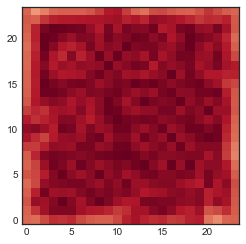

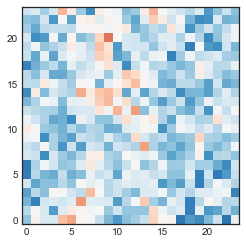

In [350]:
from mpl_toolkits.mplot3d import Axes3D

sigma_y = 0.7;
sigma_x = 0.7;
sigma = [sigma_y, sigma_x]
magn_smooth = sp.ndimage.filters.gaussian_filter(magn_m, sigma, mode='constant')
mag = np.sqrt(mag_grad[0]**2 + mag_grad[1]**2)

mag_grad = np.gradient(magn_smooth)
xgrad = mag_grad[0]
x, y = range(0, 24), range(0,24)
xi, yi = np.meshgrid(x, y)

plt.imshow(mag, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], 
            norm=colors.Normalize(vmin=0.0, vmax=0.7), cmap='RdBu')
plt.show()
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#surf = ax.plot_surface(xi, yi, magn_smooth)
plt.imshow(magn_m, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], 
            norm=colors.Normalize(vmin=-0.7, vmax=0.7), cmap='RdBu')
plt.show()

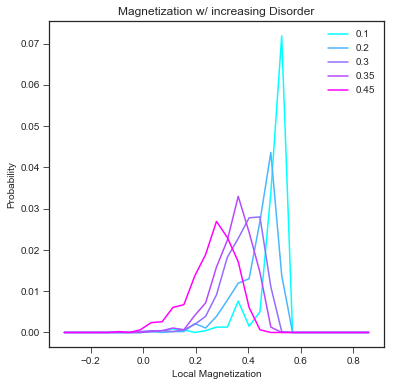

In [13]:
sns.set_style('ticks')

VF_FRACTION = np.array([0.10, 0.20, 0.30, 0.35, 0.45]);

direct = '.';
bin_edges = np.linspace(start=-0.3, stop=0.90, num = 30)
#hist, bin_edges = np.histogram(magn_m, bins=bin_edges)
#print(hist)
#print(bin_edges)
#plt.plot(bin_edges[:-1], hist)


f, ax1 = plt.subplots(1, 1, figsize=(6,6))

cmap = plt.cm.cool 
cNorm  = colors.Normalize(vmin=np.min(VF_FRACTION), vmax=np.max(VF_FRACTION))
scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

scalarMap.set_array(VF_FRACTION)


anti_ferro = make_antiFerro(24);

for fraction in VF_FRACTION:
    
    count = 0;
    colorVal = scalarMap.to_rgba(fraction)
    
    for files in glob.iglob(direct + '/DisHB_24_U=3_V=2.25_temp0.025*.fits'):
        
        hdulist = pyfits.open(files);
        disorder_fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
        repulsive = hdulist[0].header['HIERARCH HUBBARD MODEL U'];
        
        if disorder_fraction == fraction:
            
            count = count + 1;
            spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
            spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
            magn = spin_up_map - spin_dn_map;
            
            magn_m = np.multiply(magn, anti_ferro);
            
            hist, bin_edges = np.histogram(magn_m, bins=bin_edges);
        
        hdulist.close()
    if count==0:
        count = 1;
    ax1.plot(bin_edges[:-1], hist / (count * 24.*24.), label=fraction, color=colorVal)
    
    #plt.figure(figsize=(6,6))
    #plt.imshow(magn_m, origin='lower', extent=[-0.5, 27.5, -0.5, 27.5], cmap='RdBu')
    #plt.title('Local Magnetization')
    #plt.colorbar()
    #plt.show()
    #plt.close()
    
plt.legend()
plt.xlabel('Local Magnetization')
plt.ylabel('Probability')
plt.title('Magnetization w/ increasing Disorder')

In [81]:
bonds['DisplacementX']

array([ 1., -1.,  0., ...,  1.,  1.,  1.])

In [82]:
xbonds = np.array(np.where(np.abs(bonds['DisplacementX'])>0.0))

In [83]:
xbonds.size

576

In [80]:
bonds['RowSite']

array([  1,   1,   1, ..., 573, 574, 575], dtype=int32)

In [85]:
bonds_resist = bonds[xbonds]

In [95]:
bonds_resist['RowSite'][0][1]

1

In [107]:
np.divmod(2,24)

(0, 2)

(0.48478854650196168, -0.1084471210112027)
(0.7305669343304334, -0.061897467212756199)
(0.33873691435019476, 0.013707213260553346)
(0.31699958049685656, 0.019791013085002983)
(0.39710363288050443, -0.047953075384537767)


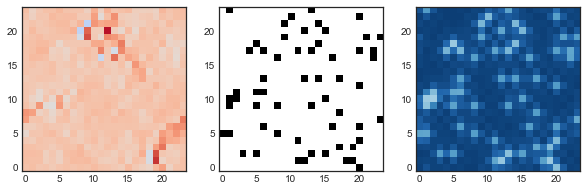

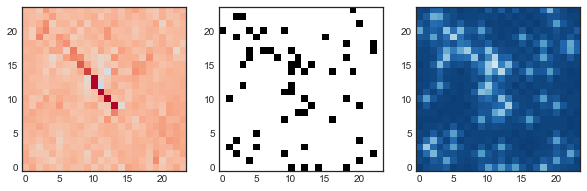

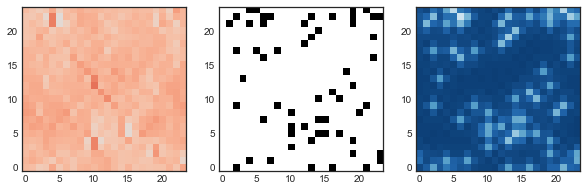

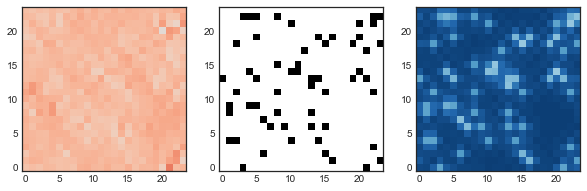

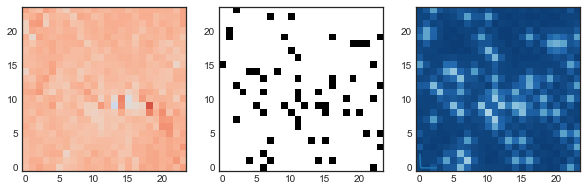

0.00381944444444
(0.64383481714983382, -0.31601185765853301)
(0.62555734748645075, -0.10651164077312369)
(0.51707631313451186, -0.052535050574995995)
(0.32493264081852447, 0.016078031360071417)
(0.47802862832486331, -0.013761394996722619)


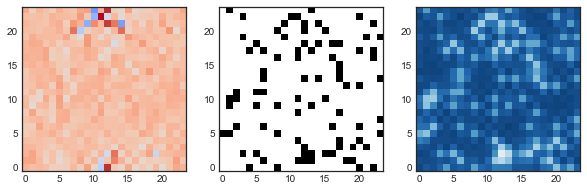

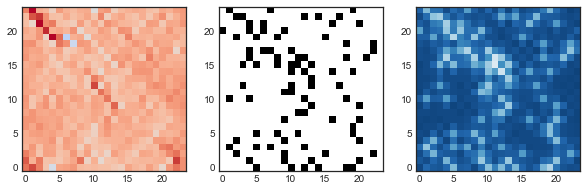

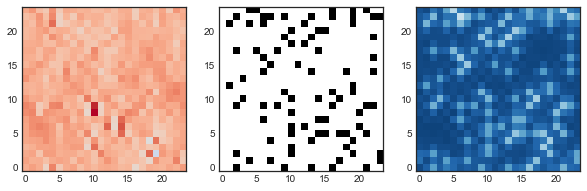

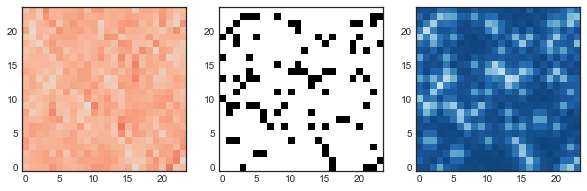

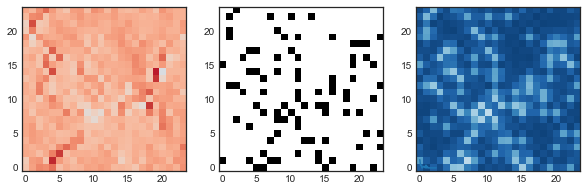

0.00555555555556
(1.1788500810844917, -1.2679747754395145)
(0.99779979560669763, -1.1002358851008451)
(2.2014965171585454, -1.4882865487035633)
(0.89068344034245561, -0.58708983833488015)
(1.1370866037008411, -0.63033631284341973)


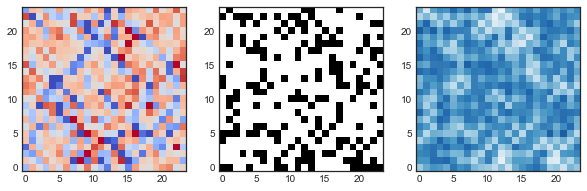

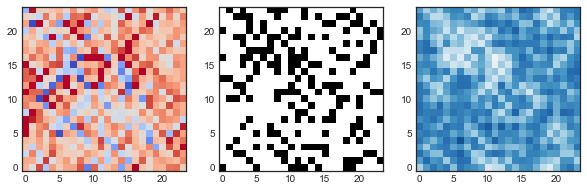

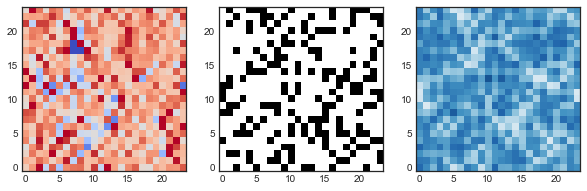

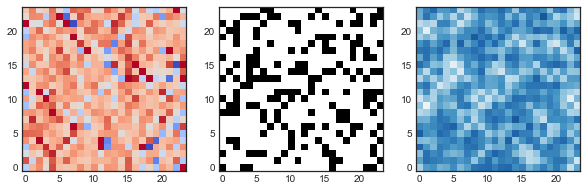

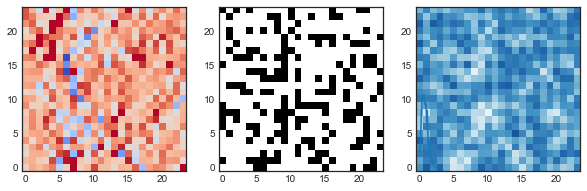

0.202430555556
(1.3965210865082771, -1.1142486735704924)
(1.416687388129293, -1.1564777429339119)
(1.6078434027311623, -1.3924159008210049)
(1.6947870205037461, -1.6881706304916799)
(1.5185265742577256, -1.420329520281419)


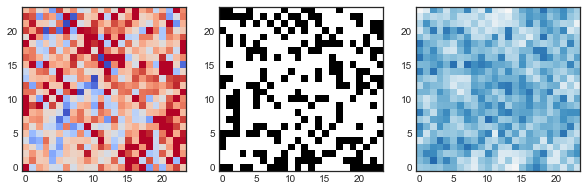

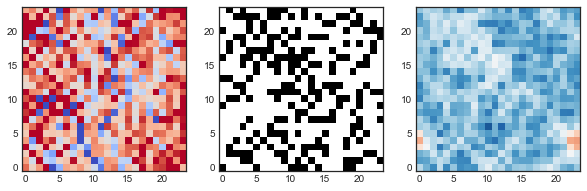

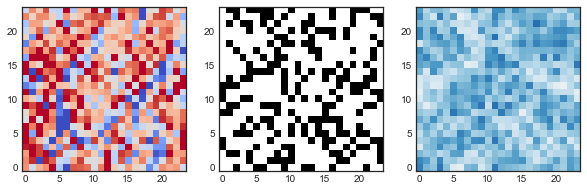

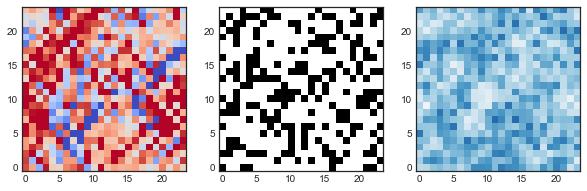

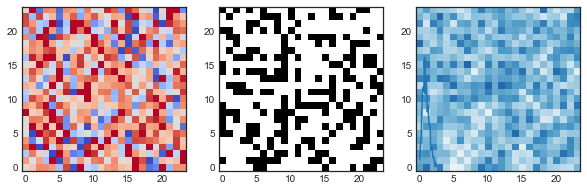

0.269097222222
(1.1351568797340312, -0.95899991876191715)
(1.3419507749552073, -1.3964791521449018)
(1.0835984232142952, -1.2027081046571235)
(1.5177900403005589, -1.2101788782627505)
(0.97536653206854484, -1.3390064032534779)


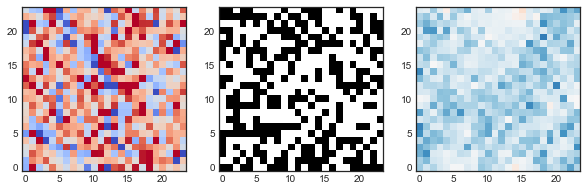

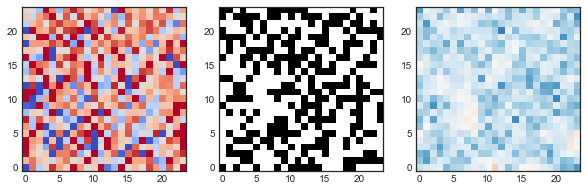

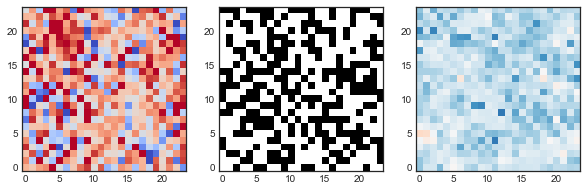

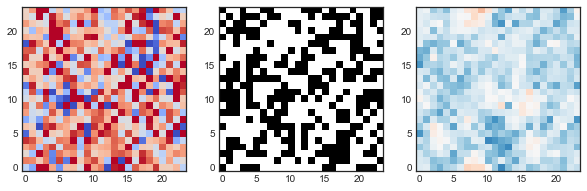

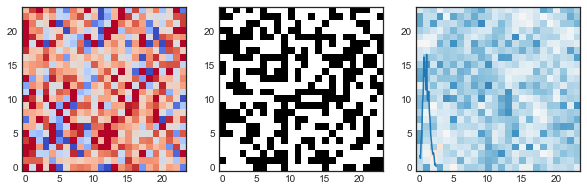

0.294097222222
(1.1850411603286193, -1.1828674183019368)
(0.93126386510419346, -1.3356702471463784)
(1.6755815570602874, -1.6791544296605623)
(1.9390939122242516, -1.6715905633368378)
(1.1493293130063784, -1.5726887400188103)


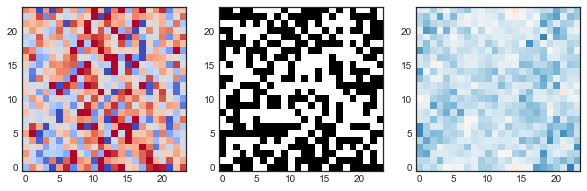

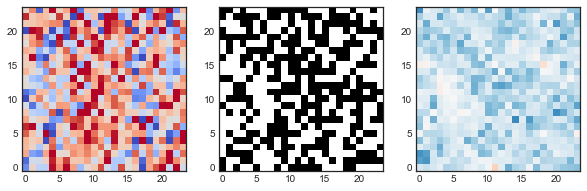

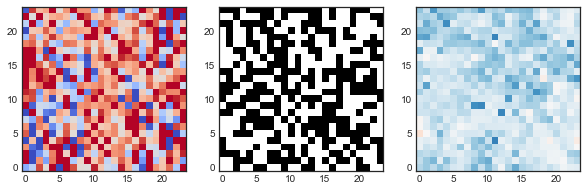

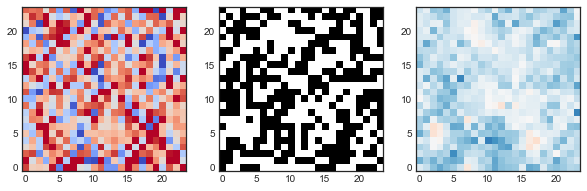

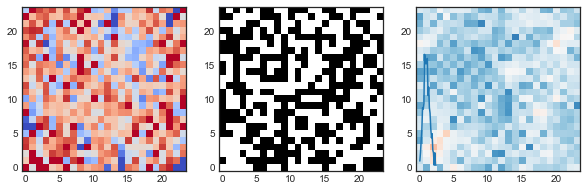

0.315625


In [157]:
sns.set_style('white')

VF_FRACTION = np.array([0.10, 0.15, 0.30, 0.35, 0.45, 0.50]);
TEMPERATURES = [0.075, 0.125, 0.175];
omega = np.array([0.020, 0.040, 0.060, 0.080]);

num_random = 5.0;
num_fraction = 6.0;
num_temps = 3.0;
size = omega.size;
num_omega = 4.0;

bins = np.linspace(0.0, 2.5, 26);
anti_ferro = make_antiFerro(24)

for fraction in range(int(num_fraction)):
    
    para_temps = np.zeros([int(num_temps), 1152]);
    hist_resist = np.zeros([25]);
    
    for random in range(int(num_random)):
        
        bonds_resist = np.zeros([1152]);
        
        for temps in range(int(num_temps)):
            hdulist = pyfits.open('DisHB_24_const_temp' + str(TEMPERATURES[temps]) + '_0_00%02.0d.fits' %(fraction*int(num_random) + random))
            bonds = np.array( hdulist['HoppingBonds'].data);
            xbonds = np.array(np.where(np.abs(bonds['DisplacementX'])>0.0));
            str_idx = len(hdulist)-8;
            
            ### Average over all low frequency conductivities ###
            for i in range(int(num_omega)):
                para_susc = np.array(hdulist[str_idx + i].data);
                para_xx = bonds['DisplacementY'] * ((np.imag(para_susc['ParamagneticSusceptibilityYUp'])) + np.imag((para_susc['ParamagneticSusceptibilityYDn']))) / hdulist[str_idx].header['HIERARCH PIPELINE CGS OMEGA']
                para_temps[temps] += para_xx;
            
            para_temps[temps] = para_temps[temps] / num_omega;
            if temps > 0.0:
                bonds_resist += para_temps[temps] - para_temps[temps-1];
                
        hist, bins = np.histogram(np.abs(para_temps[0][np.where(bonds_resist<0.0)])*1152/2.0, bins=bins)
        hist_resist += hist;
        
        f, ax = plt.subplots(1, 3, figsize=(10,20));
        ybonds = np.array(np.where(np.abs(bonds['DisplacementY'])>0.0));
        
        bonds_resize = np.zeros([24,24]);
        bonds_resist = bonds_resist[ybonds];
        bonds_y = bonds[ybonds]
        print (np.max(bonds_resist) * 1152/2.0, np.min(bonds_resist) * 1152/2.0)
        for i in range(bonds_resist.size):
            b1 = bonds_y['RowSite'][0][i] - 1;
            b2 = bonds_y['ColSite'][0][i] - 1;
            
            if (np.abs(b2 - b1) == 24.0):
                site_row, site_col = np.divmod(b1,24);
            else:
                site_row, site_col = np.divmod(b2,24);
                
            bonds_resize[site_row][site_col] = bonds_resist[0][i]
            
        #bonds_resize = bonds_resist.reshape([24,24]);
        dm = np.array(hdulist["OnSiteImpurityPotential"].data)
        spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
        spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
        magn = spin_up_map - spin_dn_map;
            
        magn_m = np.multiply(magn, anti_ferro);
            
        im = ax[0].imshow(bonds_resize * 1152, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], norm=colors.Normalize(vmin=-1.00, vmax=1.00), cmap='coolwarm');
        ds = ax[1].imshow(dm, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], cmap='Greys');
        mg = ax[2].imshow(magn_m, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], 
            norm=colors.Normalize(vmin=-0.7, vmax=0.7), cmap='RdBu');
        f.show()
        
    plt.plot((bins[1::]), hist_resist/5.0);
    plt.show()
    print ((np.sum(hist_resist)/5.0) / 576);
plt.close('all')

In [3]:
cd /Volumes/Balrog/resist3U2/

/Volumes/Balrog/resist3U2


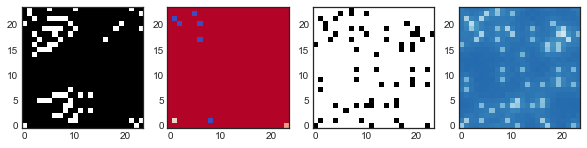

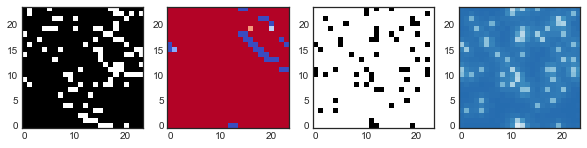

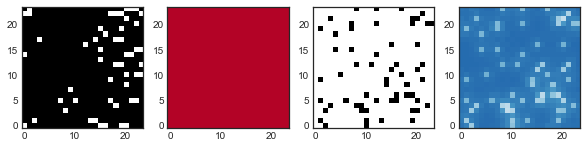

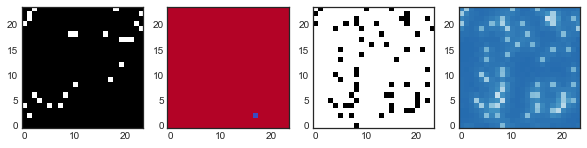

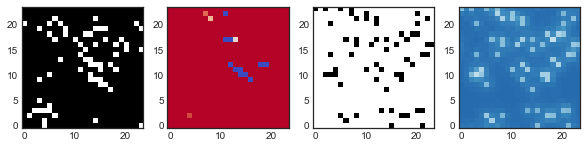

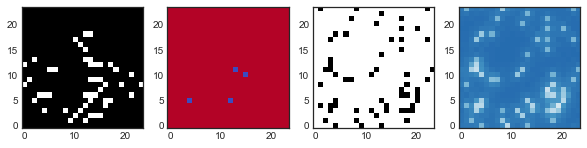

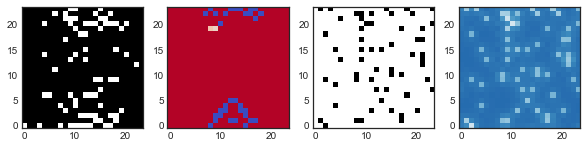

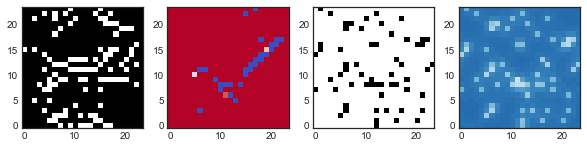

0.0240885416667


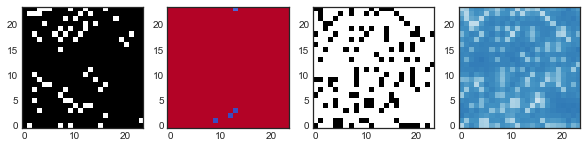

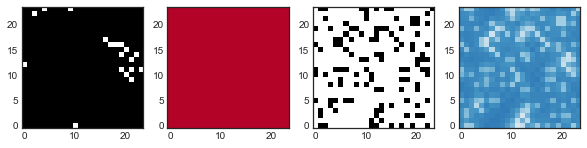

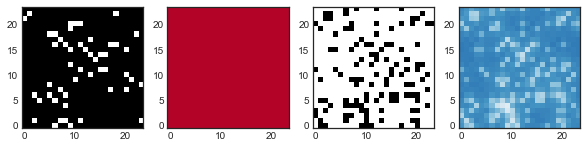

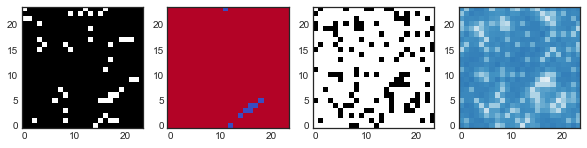

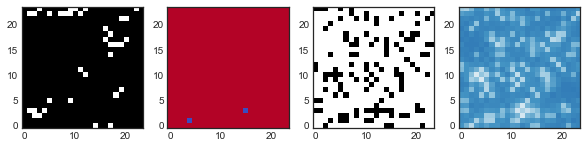

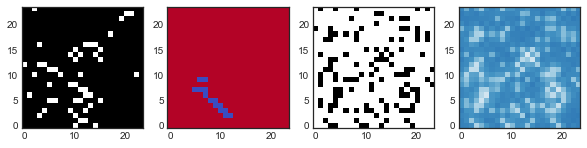

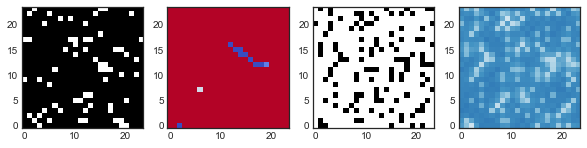

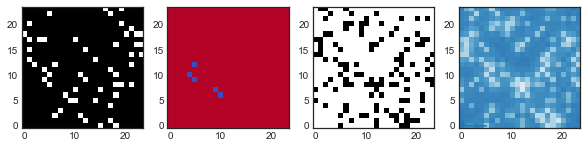

0.00954861111111


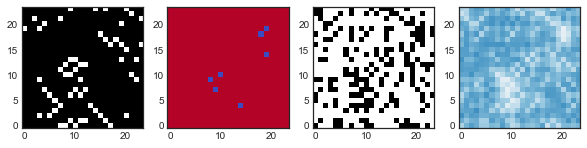

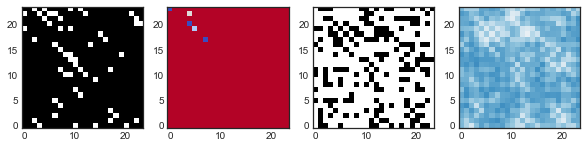

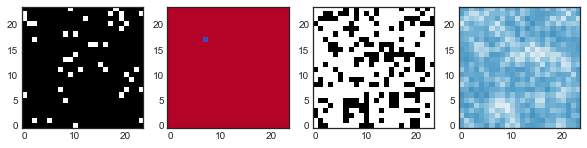

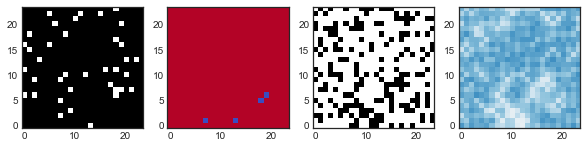

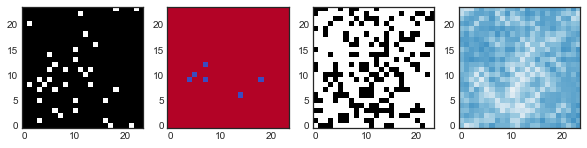

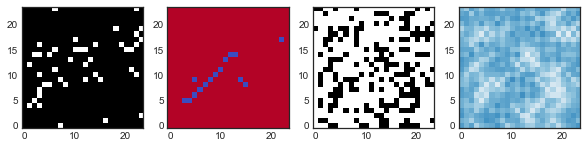

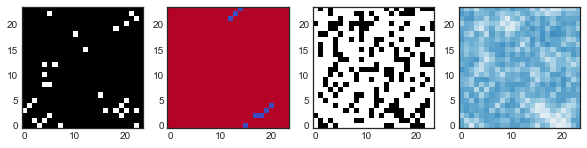

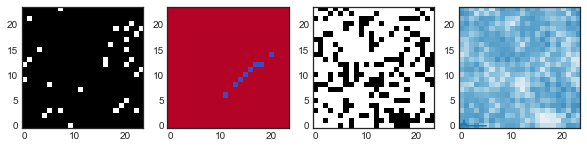

0.0115017361111


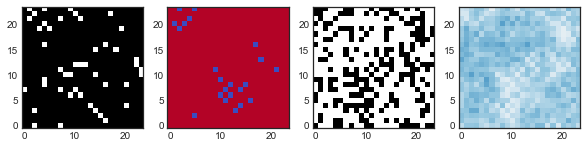

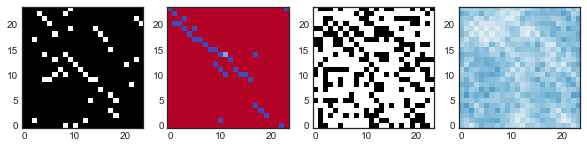

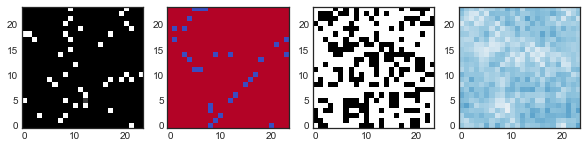

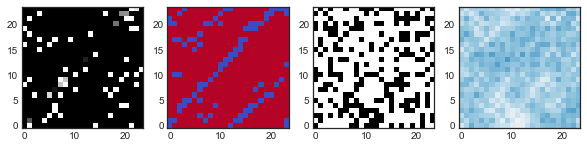

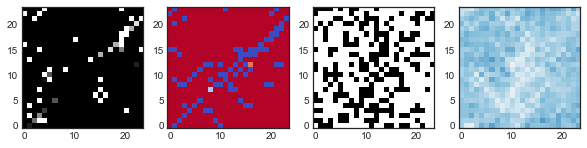

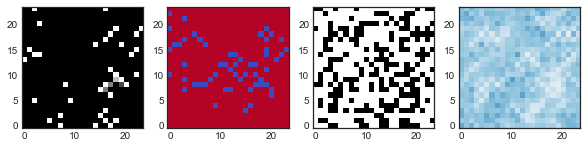

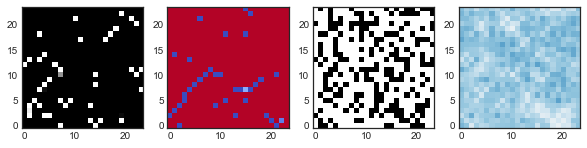

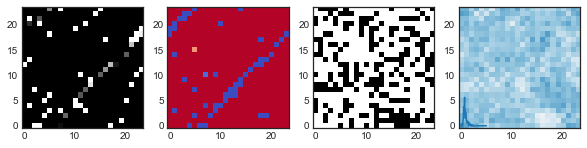

0.08203125


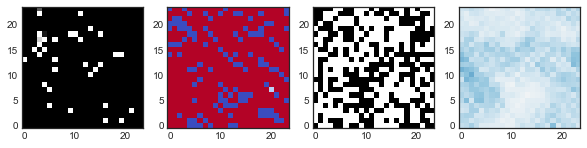

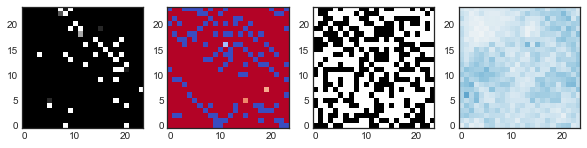

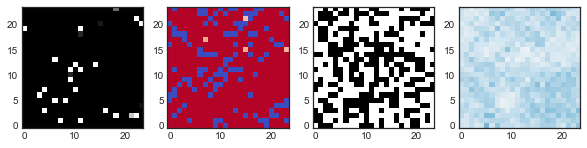

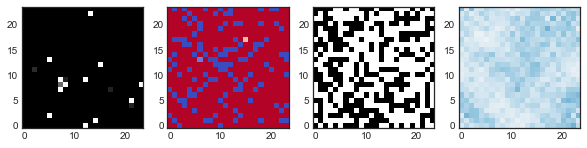

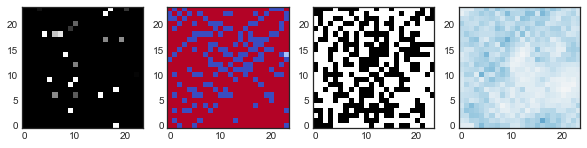

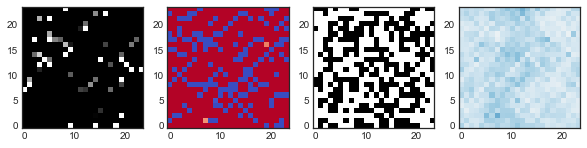

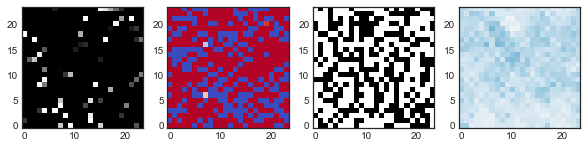

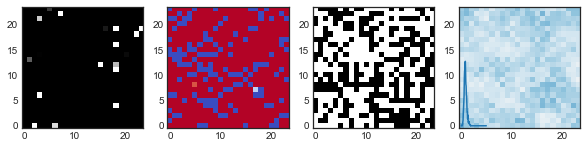

0.230902777778


In [427]:


VF_FRACTION = np.array([0.10, 0.20, 0.30, 0.35, 0.45]);
TEMPERATURES = np.array(['0.025', '0.175']);
omega = np.array([0.020, 0.040, 0.060, 0.080]);

num_random = 8.0;
num_fraction = 5.0;
num_temps = 2.0;
size = omega.size;
num_omega = 4.0;

bins = np.linspace(0.0, 5.0, 101);
anti_ferro = make_antiFerro(24);

for fraction in range(int(num_fraction)):
    
    para_temps = np.zeros([int(num_temps), 1152]);
    hist_resist = np.zeros([100]);
    
    for random in range(int(num_random)):
        
        bonds_resist = np.zeros([1152]);
        
        for temps in range(int(num_temps)):
            hdulist = pyfits.open('DisHB_24_U=3_V=2.25_temp' + TEMPERATURES[temps] + '_0_00%02.0d.fits' %(fraction*int(num_random) + random))
            bonds = np.array( hdulist['HoppingBonds'].data);
            str_idx = len(hdulist)-4;
            
            ### Average over all low frequency conductivities ###
            for i in range(int(num_omega)):
                para_susc = np.array(hdulist[str_idx + i].data);
                para_xx = bonds['DisplacementX'] * ((np.imag(para_susc['ParamagneticSusceptibilityXUp'])) + np.imag((para_susc['ParamagneticSusceptibilityXDn']))) / hdulist[str_idx+i].header['HIERARCH PIPELINE CGS OMEGA']
                para_temps[temps] += para_xx;
            
            para_temps[temps] = para_temps[temps] / num_omega;
            if temps > 0.0:
                bonds_resist += para_temps[temps] - para_temps[temps-1];
                
        hist, bins = np.histogram(np.abs(para_temps[0][np.where(bonds_resist<0.0)])*1152/2.0, bins=bins)
        hist_resist += hist;
        
        f, ax = plt.subplots(1, 4, figsize=(10,20));
        xbonds = np.array(np.where(np.abs(bonds['DisplacementX'])>0.0));
        
        bonds_resize = np.zeros([24,24]);
        bonds_para = np.zeros([24,24]);
        bonds_resist = bonds_resist[xbonds];
        para_xx = para_temps[0][xbonds];
        bonds_x = bonds[xbonds]
        #print "BOND COND:"
        #print (np.max(bonds_resist) * 1152/2.0, np.min(bonds_resist) * 1152/2.0)
        #print "PARA SUSC:"
        #print (np.max(para_xx), np.min(para_xx))
        for i in range(bonds_resist.size):
            b1 = bonds_x['RowSite'][0][i] - 1;
            b2 = bonds_x['ColSite'][0][i] - 1;
            
            if (np.abs(b2 - b1) == 1.0):
                site_row, site_col = np.divmod(b1,24);
            else:
                site_row, site_col = np.divmod(b2,24);
                
            bonds_resize[site_row][site_col] = bonds_resist[0][i]
            bonds_para[site_row][site_col] = para_xx[0][i]
            
        #bonds_resize = bonds_resist.reshape([24,24]);
        dm = np.array(hdulist["OnSiteImpurityPotential"].data)
        spin_up_map = np.array(hdulist["FinalSpinUpMeanOccupancyMap"].data);
        spin_dn_map = np.array(hdulist["FinalSpinDownMeanOccupancyMap"].data);
        magn = spin_up_map - spin_dn_map;
            
        magn_m = np.multiply(magn, anti_ferro);
            
        im = ax[0].imshow(1. / (bonds_para * 1000), origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], norm=colors.Normalize(vmin=0.3, vmax=0.5), cmap='Greys');
        im = ax[1].imshow(bonds_resize * 1152, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], norm=colors.Normalize(vmin=-0.005, vmax=0.005), cmap='coolwarm');
        ds = ax[2].imshow(dm, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], cmap='Greys');
        mg = ax[3].imshow(magn_m, origin='lower', extent=[-0.5, 23.5, -0.5, 23.5], 
            norm=colors.Normalize(vmin=-0.7, vmax=0.7), cmap='RdBu');
        f.show()
    
    plt.plot((bins[1::]), hist_resist/8.0);
    plt.show();
    print ((np.sum(hist_resist)/8.0) / 576);
    

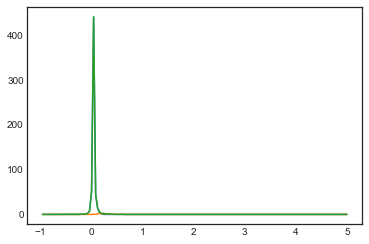

0.0240885416667


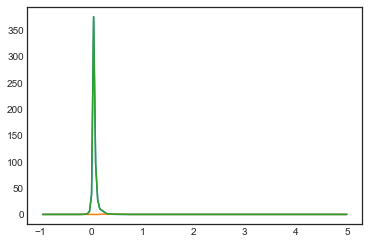

0.00954861111111


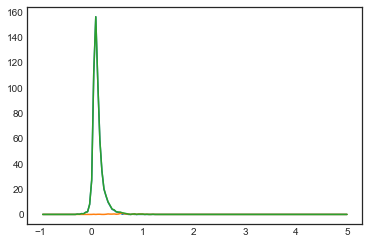

0.0115017361111


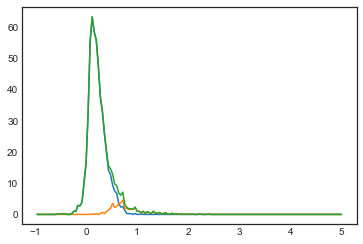

0.08203125


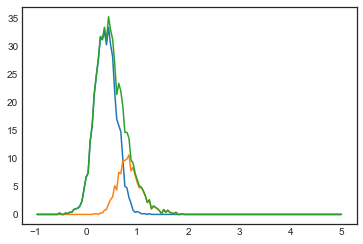

0.230902777778


In [428]:
VF_FRACTION = np.array([0.10, 0.20, 0.30, 0.35, 0.45]);
TEMPERATURES = np.array(['0.025', '0.175']);
omega = np.array([0.020, 0.040, 0.060, 0.080]);

num_random = 8.0;
num_fraction = 5.0;
num_temps = 2.0;
size = omega.size;
num_omega = 4.0;

bins = np.linspace(-1.0, 5.0, 151);

for fraction in range(int(num_fraction)):
    
    para_temps = np.zeros([int(num_temps), 1152]);
    hist_resist = np.zeros([150]);
    hist_resist2 = np.zeros([150]);
    
    for random in range(int(num_random)):
        
        bonds_resist = np.zeros([1152]);
        
        for temps in range(int(num_temps)):
            hdulist = pyfits.open('DisHB_24_U=3_V=2.25_temp' + TEMPERATURES[temps] + '_0_00%02.0d.fits' %(fraction*int(num_random) + random))
            bonds = np.array( hdulist['HoppingBonds'].data);
            str_idx = len(hdulist)-4;
            
            ### Average over all low frequency conductivities ###
            for i in range(int(num_omega)):
                para_susc = np.array(hdulist[str_idx + i].data);
                para_xx = bonds['DisplacementX'] * ((np.imag(para_susc['ParamagneticSusceptibilityXUp'])) + np.imag((para_susc['ParamagneticSusceptibilityXDn']))) / hdulist[str_idx+i].header['HIERARCH PIPELINE CGS OMEGA']
                para_temps[temps] += para_xx;
            
            para_temps[temps] = para_temps[temps] / num_omega;
            if temps > 0.0:
                bonds_resist += para_temps[temps] - para_temps[temps-1];
                
        hist, bins = np.histogram(para_temps[0][np.where(bonds_resist>0.0)]*1152/2.0, bins=bins)
        hist2, bins = np.histogram(para_temps[0][np.where(bonds_resist<0.0)]*1152/2.0, bins=bins)
        hist_resist += hist;
        hist_resist2 += hist2;
    
    plt.plot((bins[1::]), hist_resist/8.0);
    plt.plot((bins[1::]), hist_resist2/8.0);
    plt.plot((bins[1::]), hist_resist/8.0 + hist_resist2/8.0);
    #plt.xlim(-0.1, 0.1)
    plt.show();
    print ((np.sum(hist_resist2)/8.0) / 576);

In [71]:
cd /Users/Sazbo/

/Users/Sazbo


In [115]:
cd /Volumes/Balrog/resist3U/

/Volumes/Balrog/resist3U


In [72]:
hdulist.close(all)

In [73]:
cd /Volumes/Balrog/Nirav_Cond/

/Volumes/Balrog/Nirav_Cond


In [109]:
hdulist = pyfits.open('Nirav_.001_0_001.fits')
hdulist[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HIERARCH LATTICE BASIS1 X ANGS = 1.000000E+00 / X-component of first unit cell b
HIERARCH LATTICE BASIS1 Y ANGS = 0.000000E+00 / Y-component of first unit cell b
HIERARCH LATTICE BASIS2 X ANGS = 0.000000E+00 / X-component of second unit cell 
HIERARCH LATTICE BASIS2 Y ANGS = 1.000000E+00 / Y-component of second unit cell 
HIERARCH LATTICE NSITES B1 = 24 / Number of lattice sites along b1              
HIERARCH LATTICE NSITES B2 = 24 / Number of lattice sites along b2              
HIERARCH LATTICE NSITES TOTA

In [82]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];
TEMPERATURES = ['.001', '.005', '.010', '.050', '.100', '.200', '.500', '1.000'];
omega = np.array([0.015, 0.030, 0.045]);

temp_dict = {};
direct = '.';

for temperature in TEMPERATURES:
    
    dF = pd.DataFrame(columns=columns_name)
    para_xx = np.zeros([omega.size], dtype=complex);
    para_yy = np.zeros([omega.size], dtype=complex);
    para_xy = np.zeros([omega.size], dtype=complex);
    var_xx = np.zeros([omega.size], dtype=complex);
    var_yy = np.zeros([omega.size], dtype=complex);
    var_xy = np.zeros([omega.size], dtype=complex);
    count = np.zeros([omega.size]);
    
    for files in glob.iglob(direct + '/Nirav_' + temperature + '*.fits'):
        #print files
        hdulist = pyfits.open(files);
        bonds = np.array( hdulist['HoppingBonds'].data )
    
        str_idx = len(hdulist)-3;
    
        for w in range(omega.size):
        
            para_susc = np.array(hdulist[str_idx+w].data)
        
            if hdulist[str_idx+w].header['HIERARCH PIPELINE CGS OMEGA'] == omega[w]:
                para_xx[w] += np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                para_yy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))
                para_xy[w] += np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
                var_xx[w] += (np.imag(np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))))**2.0
                var_yy[w] += (np.imag(np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))))**2.0
                var_xy[w] += (np.imag(np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))))**2.0
                count[w] += 1;
                    
        hdulist.close();
    
    print count   
    for i in range(omega.size):
        dF.loc[len(dF)] = [omega[i], np.real(para_xx[i]) / count[i], np.imag(para_xx[i] / count[i]), 
                           np.real(para_yy[i]) / count[i], np.imag(para_yy[i]) / count[i], np.real(para_xy[i])/ count[i], np.imag(para_xy[i]) / count[i]]
    
    temp_dict.update({temperature: dF})
    

[ 9.  9.  9.]
[ 10.  10.  10.]
[ 10.  10.  10.]
[ 10.  10.  10.]
[ 10.  10.  10.]
[ 10.  10.  10.]
[ 10.  10.  10.]
[ 10.  10.  10.]


In [83]:
data_Frame_Nirav = pd.DataFrame.from_dict(temp_dict, orient='index');

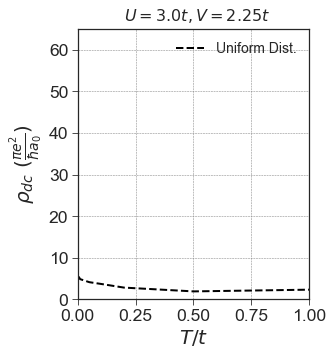

In [122]:
sns.set_style('ticks')

columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];
TEMPERATURES = ['.001', '.005', '.010', '.050', '.100', '.200', '.500', '1.000'];
TEMPERATURES_array = np.array([.001, .005, .010, .050, .100, .200, .500, 1.000])

plt.rcParams.update({'font.size': 13})
sns.set_style('ticks')

scale = 0.5

SMALL_SIZE = scale * 35
MEDIUM_SIZE = scale * 48
BIGGER_SIZE = scale * 50

title_font = {'fontname':'sans-serif', 'size':scale * 24, 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

axis_font_x = {'fontname':'sans-serif', 'size': scale * 32}
axis_font_y = {'fontname':'sans-serif', 'size': scale * 40}

plt.rcParams.update({'font.size': 40})
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=scale * 30)     # fontsize of the axes title
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

omega = np.array([0.020, 0.040, 0.060]);

omega_size = omega.size;

para_xx_imag = np.zeros([omega_size]);
para_yy_imag = np.zeros([omega_size]);
para_xy_imag = np.zeros([omega_size]);
resistivity = np.zeros(TEMPERATURES_array.size);
error = np.zeros(TEMPERATURES_array.size);

columnwidth = scale * 342.2953 # value given by Latex
fig = plt.figure(figsize=get_figsize(columnwidth, wf=1.75, hf=1.2))
    
for k in range(TEMPERATURES_array.size):
        
    data_Frame_holder = data_Frame_Nirav.loc[TEMPERATURES[k]][0].sort_values(axis=0, by='OMEGA');
        
    for i in range(omega_size):
        para_xx_imag[i] = data_Frame_holder.loc[i][columns_name[2]] / data_Frame_holder.loc[i][columns_name[0]];
        para_yy_imag[i] = data_Frame_holder.loc[i][columns_name[4]] / data_Frame_holder.loc[i][columns_name[0]];
        para_xy_imag[i] = data_Frame_holder.loc[i][columns_name[6]] / data_Frame_holder.loc[i][columns_name[0]];
         
        resistivity[k] = 1.0 / (np.mean(para_xx_imag));
        error[k] = np.max(np.abs(para_xy_imag)) / np.mean(para_xx_imag)
        
    
plt.plot(TEMPERATURES_array, resistivity, 'k--', label = 'Uniform Dist.', linewidth=2.0);
plt.xlabel('$T/t$', **axis_font_y);
plt.ylabel(r'$\rho_{dc} \ (\frac{\pi e^2}{\hbar a_0})$', **axis_font_y);
plt.ylim(0.0, 65.0);
plt.xlim(0.0, 1.0);

plt.legend( prop={'size': scale * 28})
props = dict(boxstyle='round', facecolor='white', alpha=0.5);
plt.grid(color='grey', linestyle='--', linewidth=0.5);
plt.text(0.20, 67.0, '$U = 3.0t, V = 2.25t$', **axis_font_x);
plt.savefig('/Users/Sazbo/Desktop/Trivedi_Group/mm19/resist_Nirav.pdf', bbox_inches='tight')

In [102]:
data_Frame_Nirav.loc['.010'][0].sort_values(axis=0, by='OMEGA')

OMEGA  Para_Susc_XX_Real  Para_Susc_XX_Imag  Para_Susc_YY_Real  \
0  0.015           0.363161           0.002981           0.364142   
1  0.030           0.363622           0.006258           0.364837   
2  0.045           0.364142           0.009509           0.366178   

   Para_Susc_YY_Imag  Para_Susc_XY_Real  Para_Susc_XY_Imag  
0           0.002935           0.000446           0.000067  
1           0.005924           0.000490           0.000197  
2           0.009574           0.000562           0.000402

In [127]:
cd /Users/Sazbo/

/Users/Sazbo


In [128]:
hdulist.close(all)